# Credit EDA Case Study

## <font color = blue> Business Understanding </font>
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.


## <font color = blue> Problem Statement </font>

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

## <font color = blue> Business Objectives </font>
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Importing the libraries

In [189]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 155)

## Read in the Application Data set & Structure check of Data set

In [190]:
# Read the data set of "application_data" in df.
df = pd.read_csv('application_data.csv')

In [191]:
# Print the head of the data frame
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [192]:
# Rows and Columns in the dataframe
df.shape

(307511, 122)

In [193]:
# column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [194]:
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [195]:
# Checking null values
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

## Data Quality Check and Missing values

### A. Percentage of missing values for all column

In [196]:
# Mean value of Null / Missing values
df.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [197]:
# Percentage value of Null / Missing values
df.isnull().mean().round(6)*100
# Alternate Way: df.isnull().sum()*100 / len(df)

SK_ID_CURR                       0.0000
TARGET                           0.0000
NAME_CONTRACT_TYPE               0.0000
CODE_GENDER                      0.0000
FLAG_OWN_CAR                     0.0000
FLAG_OWN_REALTY                  0.0000
CNT_CHILDREN                     0.0000
AMT_INCOME_TOTAL                 0.0000
AMT_CREDIT                       0.0000
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
NAME_INCOME_TYPE                 0.0000
NAME_EDUCATION_TYPE              0.0000
NAME_FAMILY_STATUS               0.0000
NAME_HOUSING_TYPE                0.0000
REGION_POPULATION_RELATIVE       0.0000
DAYS_BIRTH                       0.0000
DAYS_EMPLOYED                    0.0000
DAYS_REGISTRATION                0.0000
DAYS_ID_PUBLISH                  0.0000
OWN_CAR_AGE                     65.9908
FLAG_MOBIL                       0.0000
FLAG_EMP_PHONE                   0.0000
FLAG_WORK_PHONE                  0.0000


### B. Column removal with high missing values / percentage

In [201]:
# Dropping column with more the 50% null values
df = df.loc[:, df.isnull().mean() < 0.50]

# df_test = df.isnull().mean()
# df_test = df_test[df_test > 0.50].index
# df.drop(df_test, axis=1, inplace=True)

# alternate option df.apply(lambda x: x.isnull().mean() > 0.50)

In [204]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
# validation to check, if all columns are drop with more then 50% missing values
df.isnull().mean()>0.50

SK_ID_CURR                      False
TARGET                          False
NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                     False
AMT_GOODS_PRICE                 False
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE                      False
FLAG_EMAIL  

### C. Observation: Impute of missing value (Less percentage). Total 5 Column

In [205]:
# Checking Null percentage in column for impute of missing values
df.isnull().mean().round(6)*100

SK_ID_CURR                       0.0000
TARGET                           0.0000
NAME_CONTRACT_TYPE               0.0000
CODE_GENDER                      0.0000
FLAG_OWN_CAR                     0.0000
FLAG_OWN_REALTY                  0.0000
CNT_CHILDREN                     0.0000
AMT_INCOME_TOTAL                 0.0000
AMT_CREDIT                       0.0000
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
NAME_INCOME_TYPE                 0.0000
NAME_EDUCATION_TYPE              0.0000
NAME_FAMILY_STATUS               0.0000
NAME_HOUSING_TYPE                0.0000
REGION_POPULATION_RELATIVE       0.0000
DAYS_BIRTH                       0.0000
DAYS_EMPLOYED                    0.0000
DAYS_REGISTRATION                0.0000
DAYS_ID_PUBLISH                  0.0000
FLAG_MOBIL                       0.0000
FLAG_EMP_PHONE                   0.0000
FLAG_WORK_PHONE                  0.0000
FLAG_CONT_MOBILE                 0.0000


In [14]:
# Verifing the unique count of value in each column
df.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

### <font color = blue> 1. Observation: Numerical Column </font>
We have 6 Below Column with same Null percentage: 13.50% for all 6 column:
* AMT_REQ_CREDIT_BUREAU_HOUR
* AMT_REQ_CREDIT_BUREAU_DAY
* AMT_REQ_CREDIT_BUREAU_WEEK
* AMT_REQ_CREDIT_BUREAU_MON
* AMT_REQ_CREDIT_BUREAU_QRT
* AMT_REQ_CREDIT_BUREAU_YEAR

### <font color = blue> Analysis</font>
* Missing values are common for all rows in above column. If one row has missing value, all 6 rows have the same.
* Seems like, Missing At Random. The reason behind missing value may be associated with some other features.
* We can impute these values with another values like  the mean/median/mode, because they are not missing at random and can be usefull for further analysis. 

### <font color = blue>Steps Taken</font>
* Verified value_counts(), Describe(), Mean(), Mode(), median(), Quantile() for all above columns to come for better obersvation.
* There seems to be outlier: example- 

### <font color = blue> Recommendation</font>

option 1. 
* We can replace the missing value with 0.0 
* 99% of value in all 6 column is 0.0
* 99th percentile for all 6 column is 0.0
* Mode and Median for all 6 column is 0.0

Option 2.
* We continue to look for relevance of  missing data in these 6 column and can also take a call to update them as NaN.

In [209]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [210]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [211]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].median()

0.0

In [212]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()

0    0.0
dtype: float64

In [19]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].quantile([.99])

0.99    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [213]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [214]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [22]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].median()

0.0

In [215]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].mode()

0    0.0
dtype: float64

In [216]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].quantile([.99])

0.99    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

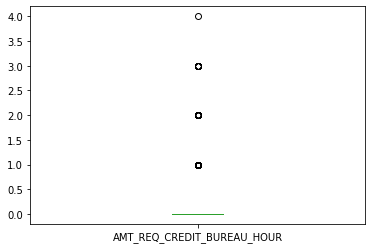

In [207]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].plot(kind='box')
plt.show()

### <font color = blue>2. Observation: Catagorical Column</font>
NAME_TYPE_SUITE<br>
Who was accompanying client when he was applying for the loan


### <font color = blue>Analysis & Step Taken</font>
Total 8 catagory for this column: 
Unaccompanied
Family            
Spouse, partner    
Children           
Other_B            
Other_A            
Group of people    
Null / Blank

Null value percentage is 0.42% and sum is 1292

### <font color = blue>Recommendation</font>
* We should replace these null value with unknown or NAN.
* This will add more information into the dataset which will result in the change of variance. 
* These are categorical, we need to find one hot encoding to convert it to a numeric form for the algorithm to understand it.


In [25]:
df['NAME_TYPE_SUITE'].isnull().mean()*100

0.42014757195677555

In [26]:
df['NAME_TYPE_SUITE'].isnull().sum()

1292

In [27]:
df['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

### <font color = blue>3.Observation: Numerical Column</font>
AMT_GOODS_PRICE<br>
For consumer loans, it is the price of the goods for which the loan is given


### <font color = blue>Analysis & Steps Taken</font>
* Checked the null values sum (278) and percentage (0.09).
* Checked Mean, Median & Mode
* Cheked quantile([.25, .50, .75, .80, .90, .95, .99, 1])
* Box plot for outliers


### <font color = blue>Recommendation</font>

Option 1. 
* Replace the missing value with Median value (450000), which is also 50th Percentile
* In this case, mean value is > Median value.
* we have outliers also and if we change the null values with mean value, the graph will become righ skewed
* During quantile, we observed high variation from .90 to 1

Futher option 2.
* As next step, we can also perform trimmed mean to find the value and to avoid the influence of outliers

In [28]:
df['AMT_GOODS_PRICE'].value_counts(normalize=True)

450000.0    0.084698
225000.0    0.082289
675000.0    0.081248
900000.0    0.050177
270000.0    0.037197
              ...   
705892.5    0.000003
442062.0    0.000003
353641.5    0.000003
353749.5    0.000003
738945.0    0.000003
Name: AMT_GOODS_PRICE, Length: 1002, dtype: float64

In [29]:
df['AMT_GOODS_PRICE'].isnull().sum()

278

In [30]:
df['AMT_GOODS_PRICE'].isnull().mean()*100

0.09040327012692229

In [31]:
df['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [32]:
df['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [33]:
df['AMT_GOODS_PRICE'].median()

450000.0

In [34]:
df['AMT_GOODS_PRICE'].mode()

0    450000.0
dtype: float64

In [35]:
df['AMT_GOODS_PRICE'].quantile([.25, .50, .75, .80, .90, .95, .99, 1])

0.25     238500.0
0.50     450000.0
0.75     679500.0
0.80     814500.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

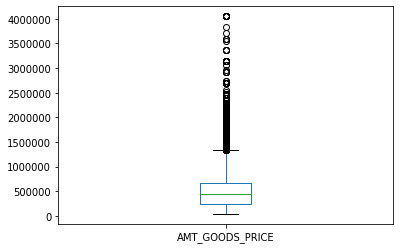

In [36]:
df['AMT_GOODS_PRICE'].plot(kind='box')
plt.show

### D. Check Datatype for all Columns and change the data type like negative age and date

In [208]:
# checkig Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [38]:
# Checking unique type values
df.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

#### <font color = blue> Action 1: Column DAYS_BIRTH has negetive value. Changed value to positive.</font>
* Client's age in days at the time of application
* DAYS_BIRTH  307511 non-null  int64  


In [217]:
df['DAYS_BIRTH'].value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [218]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH'].value_counts()

13749    43
13481    42
10020    41
18248    41
15771    40
         ..
7861      1
25017     1
25135     1
7856      1
24328     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

#### <font color = blue> Action 2: Column DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH has negetive value. Changed value to positive</font>
* DAYS_EMPLOYED	How many days before the application the person started current employment
* DAYS_REGISTRATION	How many days before the application did client change his registration
* DAYS_ID_PUBLISH	How many days before the application did client change the identity document with which he applied for the loan


In [219]:
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])
df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])


In [220]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### <font color = blue> Action 3: DAYS_REGISTRATION Column show as Float64. Changing to Int.</font>
DAYS_REGISTRATION   307511 non-null  float64


In [221]:
df['DAYS_REGISTRATION'].value_counts()

1.0        113
7.0         98
6.0         96
2.0         92
4.0         92
          ... 
12446.0      1
17298.0      1
14676.0      1
15817.0      1
13267.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [222]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].astype('int64')

In [223]:
df['DAYS_REGISTRATION'].dtype

dtype('int64')

#### <font color = blue> Action 4: Column DAYS_LAST_PHONE_CHANGE has negetive value. Changed value to positive. </font>
* How many days before application did client change phone


In [224]:
df['DAYS_LAST_PHONE_CHANGE'] = abs(df['DAYS_LAST_PHONE_CHANGE'])
df['DAYS_LAST_PHONE_CHANGE'].value_counts()

0.0       37672
1.0        2812
2.0        2318
3.0        1763
4.0        1285
          ...  
3558.0        1
3978.0        1
3701.0        1
3809.0        1
3731.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

### E. For Numerical columns, check for Outlier and report for 5 variable with observation and reasoning

#### <font color = blue> 1. CNT_CHILDREN (Number of children the client has)</font>

### <font color = blue>Observation & reasoning:</font>
* Max value is 19 childrens for applicant. This seesm to be un-realaistic in current modern world.
* Till 99th percentile, children count is 3.
* Anything above 5 childeren seems to be outlier

In [225]:
df['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [226]:
df['CNT_CHILDREN'].quantile([.25, .50, .75, .80, .90, .95, .99, 1])

0.25     0.0
0.50     0.0
0.75     1.0
0.80     1.0
0.90     2.0
0.95     2.0
0.99     3.0
1.00    19.0
Name: CNT_CHILDREN, dtype: float64

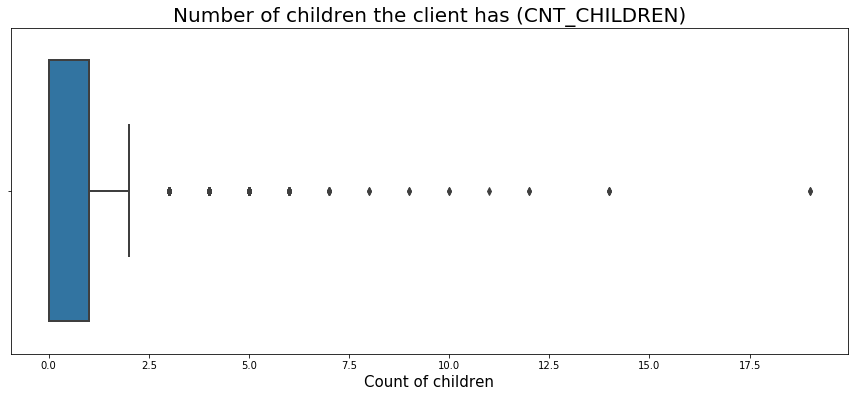

In [227]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='CNT_CHILDREN', linewidth=2)
plt.title('Number of children the client has (CNT_CHILDREN)', fontsize = 20) 
plt.xlabel('Count of children', fontsize = 15) 
plt.show()

#### <font color = blue> 2. AMT_INCOME_TOTAL (Income of the client)</fomt>

<font color = blue> Observation & reasoning:</font>
* Max income is 117000000. Which is definetly outlier. Seems to be incorrect data.
* With income of 117000000, client has cash loancredit of 562491. This doesn't match well. 
* There are more income outlier like : 18000090, 13500000. This can bee seen in below code, when sorted AMT_INCOME_TOTAL.
* Till 99th percentile, Client income count 472500.


In [228]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [229]:
df['AMT_INCOME_TOTAL'].quantile([.25, .50, .75, .80, .90, .95, .99, 1])

0.25       112500.0
0.50       147150.0
0.75       202500.0
0.80       225000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [230]:
df.sort_values(by='AMT_INCOME_TOTAL', ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,12615,922,6762,3643,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.9791,0.1667,0.9791,0.1667,0.9791,0.1667,0.0715,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,15704,4961,3338,4728,1,1,0,1,0,0,NaN,4.0,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.788606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1133.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,13551,280,3953,4972,1,1,1,1,0,0,NaN,2.0,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.713507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,1377000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.010147,16425,8476,7276,1656,1,1,0,1,0,0,Managers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Business Entity Type 1,0.504086,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.009549,19341,443,7414,2886,1,1,1,1,1,0,Laborers,2.0,2,2,TUESDAY,14,0,1,1,0,1,1,Transport: type 4,0.552838,0.495666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,695.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240137,378118,0,Cash loans,F,N,N,0,26100.0,90000.0,4329.0,90000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.022800,21003,365243,4469,4497,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,11,0,0,0,0

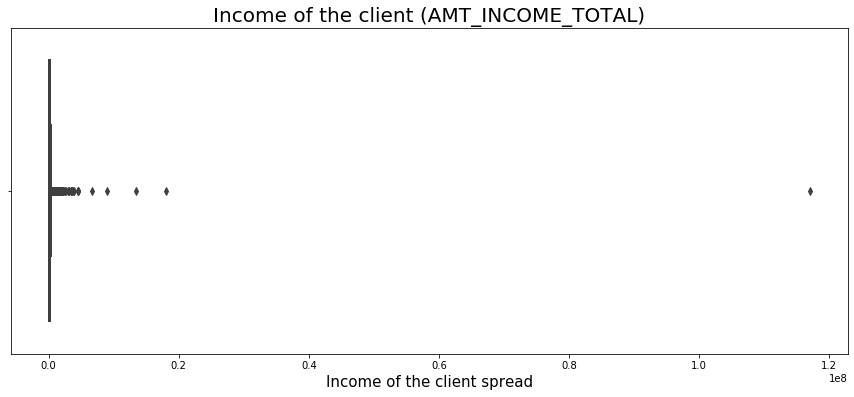

In [231]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='AMT_INCOME_TOTAL', linewidth=2)
plt.title('Income of the client (AMT_INCOME_TOTAL)', fontsize = 20) 
plt.xlabel('Income of the client spread', fontsize = 15) 
plt.show()

####  <font color = blue> 3. AMT_CREDIT (Credit amount of the loan)</font>

<font color = blue> Observation & reasoning: </font>
* There are multiple loan credited, which is equal to 4050000. 
* This is way above 99th percentile, mean, median.
* Below Loan id, there are cash loan credited of 4050000, where as client income is very low and definetly outlier and risky loans.
 - Loan ID: 14852, 120757, 288455
 - income: 760846.5, 587250.0, 450000.0
 - loan Credit: 4050000, 4050000, 4050000

In [232]:
df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [233]:
df['AMT_CREDIT'].median()

513531.0

In [234]:
df['AMT_CREDIT'].quantile([.25, .50, .75, .80, .90, .95, .99, 1])

0.25     270000.0
0.50     513531.0
0.75     808650.0
0.80     900000.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [235]:
df.sort_values(by='AMT_CREDIT', ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
133766,255139,0,Cash loans,F,Y,N,1,1307587.5,4050000.0,100197.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,15450,251,2730,1334,1,1,1,1,0,0,Managers,3.0,1,1,SATURDAY,16,0,0,0,0,0,0,Trade: type 2,0.628098,0.538863,0.9955,0.6667,0.9955,0.6667,0.9955,0.6667,0.1260,No,1.0,0.0,1.0,0.0,231.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,Office apartment,0.072508,12796,1372,3556,4646,1,1,1,1,1,0,Managers,3.0,1,1,WEDNESDAY,14,0,0,0,0,0,0,Trade: type 7,0.639547,0.805020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,858.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
119681,238782,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,12536,681,1859,4601,1,1,1,1,1,0,Managers,3.0,2,2,MONDAY,14,0,0,0,0,1,1,Transport: type 4,0.571261,0.652897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
120757,240007,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,19893,421,10025,3307,1,1,1,1,1,0,NaN,2.0,1,1,THURSDAY,20,0,1,1,0,1,1,Industry: type 1,0.663432,NaN,0.9861,0.4583,0.9861,0.4583,0.9861,0.4583,0.2446,No,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
288455,434170,0,Cash loans,F,Y,N,1,450000.0,4050000.0,106839.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.035792,16609,3044,126,134,1,1,1,1,0,0,Managers,3.0,2,2,TUESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.685893,0.758393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75227,187243,0,Cash loans,F,Y,Y,0,315000.0,45000.0,2749.5,45000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,23555,365243,20560,4599,1,0,0,1,1,0,NaN,2.0,2

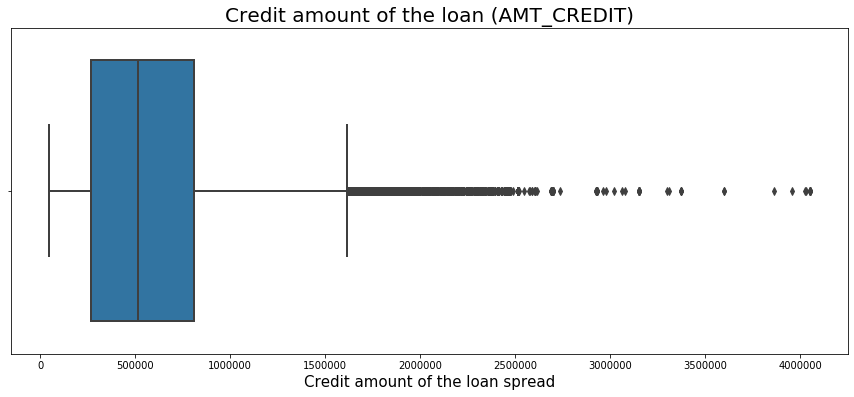

In [236]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='AMT_CREDIT', linewidth=2)
plt.title('Credit amount of the loan (AMT_CREDIT)', fontsize = 20) 
plt.xlabel('Credit amount of the loan spread', fontsize = 15) 
plt.show()

### <font color = blue> 4. Scatter plot between AMT_INCOME_TOTAL and AMT_CREDIT to check above outlier and observation. </font>

### <font color = blue> Observation:</font>
* Income outlier
* high value loan issues to low income clients

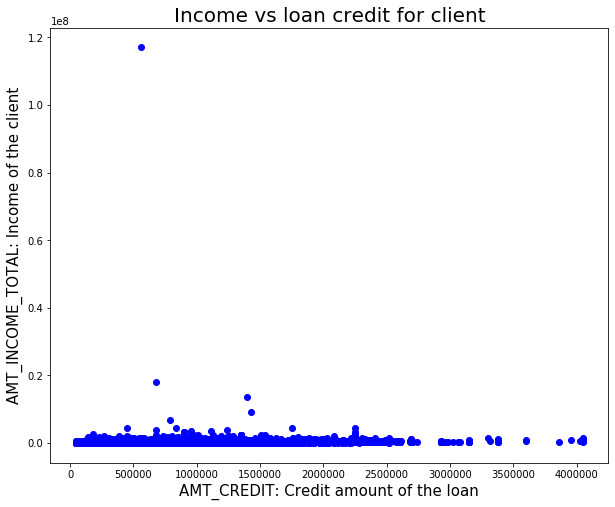

In [237]:
plt.figure(figsize=(10,8))
plt.scatter(df['AMT_CREDIT'], df['AMT_INCOME_TOTAL'], color='blue')
plt.title("Income vs loan credit for client", fontsize=20)
plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
plt.ylabel("AMT_INCOME_TOTAL: Income of the client", fontsize=15)
plt.show()

#### <font color = blue> 5. DAYS_EMPLOYED (How many days before the application the person started current employment)</font>


### <font color = blue> Observation & reasoning:</font>
* There are multiple values in outlier with 365243
* All outlier are above 90th percentile and same till 100th.
* It is technical not possible for human mankind to have this number: 365243 Days of current employment


In [238]:
df['DAYS_EMPLOYED'].quantile([.25, .50, .75, .80, .90, .95, .99, 1])

0.25       933.0
0.50      2219.0
0.75      5707.0
0.80      9188.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64

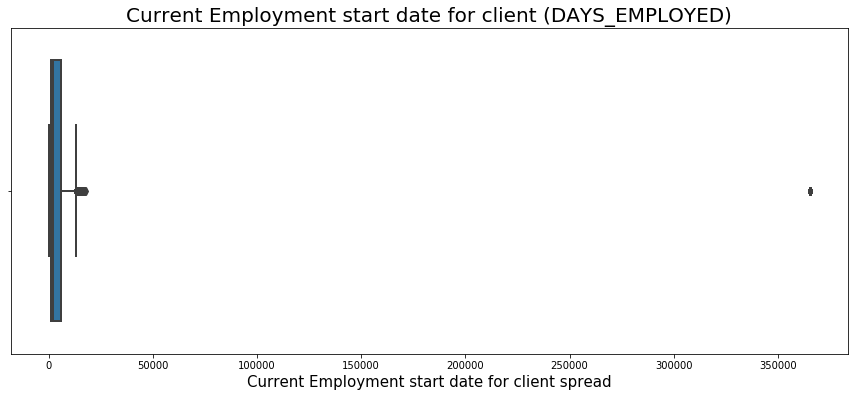

In [239]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='DAYS_EMPLOYED', linewidth=2)
plt.title('Current Employment start date for client (DAYS_EMPLOYED)', fontsize = 20) 
plt.xlabel('Current Employment start date for client spread', fontsize = 15) 
plt.show()

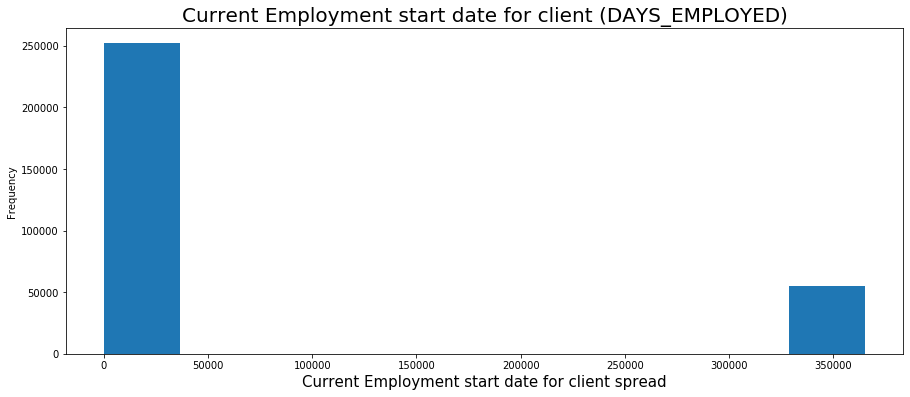

In [240]:
plt.figure(figsize=(15,6))
df['DAYS_EMPLOYED'].plot(kind='hist')
plt.title('Current Employment start date for client (DAYS_EMPLOYED)', fontsize = 20) 
plt.xlabel('Current Employment start date for client spread', fontsize = 15) 
plt.show()

### Binning of continous variable

#### <font color = blue> 1. Binning of AMT_INCOME_TOTAL (Income of the client)</font>
* Income Bin: 25000, 75000, 125000, 175000, 225000, 325000, 120000000
* labels: 'Low', 'Below Average', 'Average', 'Above Average', 'High', 'Very High'

In [241]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [242]:
df['AMT_INCOME_TOTAL'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

0.1        81000.0
0.2        99000.0
0.3       112500.0
0.4       135000.0
0.5       147150.0
0.6       162000.0
0.7       180000.0
0.8       225000.0
0.9       270000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [243]:
# Perfroming the binning and new column: Bin_AMT_INCOME
df['Bin_AMT_INCOME'] = pd.cut(df['AMT_INCOME_TOTAL'], [25000, 75000, 125000, 175000, 225000, 325000, 120000000 ], labels=['Low', 'Below Average', 'Average', 'Above Average', 'High', 'Very High'])

In [245]:
# validation
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Bin_AMT_INCOME
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Above Average
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Below Average


In [246]:
# Validation
df['Bin_AMT_INCOME'].value_counts()

Below Average    83507
Average          82553
Above Average    70441
High             31131
Low              23892
Very High        15987
Name: Bin_AMT_INCOME, dtype: int64

#### <font color = blue> 2. Binning of AMT_CREDIT (Credit amount of the loan)</font>
* Credit Bin: 40000, 250000, 500000, 750000, 1000000, 1250000, 4500000
* labels: 'Low Credit', 'Below Average Credit', 'Average Credit', 'Above Average Credit', 'High Credit', 'Very High Credit'

In [248]:
df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [249]:
# Performing the binning in new column: Bin_AMT_CREDIT
df['Bin_AMT_CREDIT'] = pd.cut(df['AMT_CREDIT'], [40000, 250000, 500000, 750000, 1000000, 1250000, 4500000
 ], labels=['Low Credit', 'Below Average Credit', 'Average Credit', 'Above Average Credit', 'High Credit', 'Very High Credit'])

In [250]:
# validating the bin
df['Bin_AMT_CREDIT'].value_counts()

Below Average Credit    90135
Average Credit          65094
Low Credit              59198
Above Average Credit    43099
High Credit             25075
Very High Credit        24910
Name: Bin_AMT_CREDIT, dtype: int64

In [252]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Bin_AMT_INCOME,Bin_AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Above Average,Below Average Credit
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,Very High Credit
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Credit
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Average,Below Average Credit
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Below Average,Average Credit


# Analysis

#### <font color = blue>Updating DF with limited set of columns for analysis</font>

In [253]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Bin_AMT_INCOME,Bin_AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Above Average,Below Average Credit
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,Very High Credit
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Credit
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Average,Below Average Credit
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Below Average,Average Credit


In [254]:
# Droping non required columns for analysis from Application df
df.drop(['REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 
'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 
'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',  'AMT_REQ_CREDIT_BUREAU_YEAR'], axis = 1, inplace=True) 

In [255]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Bin_AMT_INCOME,Bin_AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648,2120,Laborers,1.0,2,0,0,Business Entity Type 3,0.262949,2.0,2.0,1134.0,0.0,0.0,Above Average,Below Average Credit
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,291,Core staff,2.0,1,0,0,School,0.622246,0.0,0.0,828.0,0.0,0.0,High,Very High Credit
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260,2531,Laborers,1.0,2,0,0,Government,0.555912,0.0,0.0,815.0,0.0,0.0,Low,Low Credit
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833,2437,Laborers,2.0,2,0,0,Business Entity Type 3,0.650442,0.0,0.0,617.0,NaN,NaN,Average,Below Average Credit
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311,3458,Core staff,1.0,2,0,0,Religion,0.322738,0.0,0.0,1106.0,0.0,0.0,Below Average,Average Credit


In [256]:
df.shape

(307511, 34)

### <font color = blue>Check the inbalance percentage</font>

In [262]:
# Checking percentage
df['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

#### <font color = blue> Observation:</Font>
1. It is Inbalance data.
2. 91.93% data is for Target = 0 (Client without payment difficulties)
3. 8.07% data is for Target = 1 (Client with payment difficulties)

Text(0.5, 1.0, 'Target: Inbalance Data View')

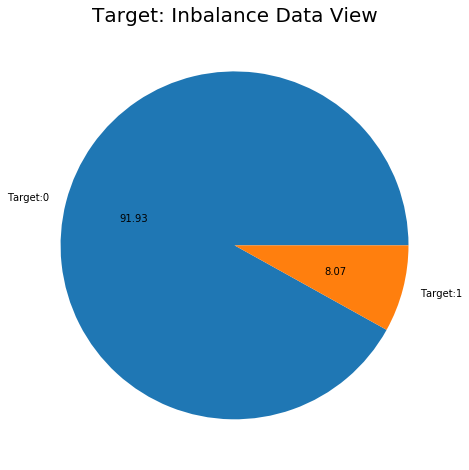

In [261]:
plt.figure(figsize=(10,8))
plt.pie(df['TARGET'].value_counts(normalize=True), labels=['Target:0', 'Target:1'], autopct='%.2f')
plt.title("Target: Inbalance Data View", fontsize=20)

### <font color = blue> Dividing the dataset based on Target value</font>

In [282]:
df0 = df[df['TARGET'] == 0]
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Bin_AMT_INCOME,Bin_AMT_CREDIT
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186,291,Core staff,2.0,1,0,0,School,0.622246,0.0,0.0,828.0,0.0,0.0,High,Very High Credit
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260,2531,Laborers,1.0,2,0,0,Government,0.555912,0.0,0.0,815.0,0.0,0.0,Low,Low Credit
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833,2437,Laborers,2.0,2,0,0,Business Entity Type 3,0.650442,0.0,0.0,617.0,NaN,NaN,Average,Below Average Credit
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311,3458,Core staff,1.0,2,0,0,Religion,0.322738,0.0,0.0,1106.0,0.0,0.0,Below Average,Average Credit
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,16941,1588,4970,477,Laborers,2.0,2,0,0,Other,0.354225,0.0,0.0,2536.0,0.0,1.0,Below Average,Below Average Credit


In [281]:
df1 = df[df['TARGET'] == 1]
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Bin_AMT_INCOME,Bin_AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648,2120,Laborers,1.0,2,0,0,Business Entity Type 3,0.262949,2.0,2.0,1134.0,0.0,0.0,Above Average,Below Average Credit
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,18724,2628,6573,1827,Cooking staff,1.0,3,0,0,Business Entity Type 3,0.548477,1.0,0.0,161.0,0.0,2.0,Below Average,Above Average Credit
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,17482,1262,1182,1029,Laborers,2.0,2,0,0,Business Entity Type 3,0.306841,0.0,0.0,1075.0,2.0,0.0,Above Average,High Credit
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,13384,3597,45,4409,Sales staff,2.0,3,0,0,Self-employed,0.674203,0.0,0.0,1480.0,0.0,0.0,Average,Below Average Credit
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,24794,365243,5391,4199,NaN,2.0,2,0,0,XNA,0.023952,1.0,1.0,0.0,0.0,0.0,Below Average,Below Average Credit


In [80]:
# df0: target=0
df0.shape

(282686, 34)

In [265]:
# df2: target=1
df1.shape

(24825, 34)

## <font color = blue>Correlation Analysis  for both case (0 & 1) </font>

In [269]:
# Basic correlation
df0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.001346,0.001744,0.001475,0.000077,-0.002790,-0.000519,0.000104,-0.002885,0.001589,0.000556,0.002382,0.000998,0.000054,0.001148
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.336966,-0.245174,-0.185792,0.028751,0.878571,0.022842,-0.012342,0.021587,-0.015455,-0.002246,-0.002172,0.008501,-0.010455,-0.007087
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,-0.062609,-0.140392,-0.064937,-0.022896,0.034256,-0.186573,0.068510,0.010567,0.139598,-0.027621,-0.027593,0.041338,0.061470,0.013128
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.047378,-0.070104,-0.013477,0.001464,0.064536,-0.103337,0.024617,-0.025036,0.129140,-0.019851,-0.022225,0.069540,0.054071,0.017767
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,-0.012263,-0.104978,-0.039436,-0.014113,0.075787,-0.132128,0.041992,-0.005675,0.126615,-0.022535,-0.023385,0.062013,0.038181,0.011248
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.044565,-0.068609,-0.015916,0.003649,0.062814,-0.104382,0.026731,-0.024878,0.135694,-0.021025,-0.023171,0.071373,0.055850,0.018163
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,-0.012263,0.044565,1.000000,0.626114,0.333151,0.271314,-0.285825,-0.002332,-0.066252,-0.179772,0.078158,0.003057,0.000990,0.076510,-0.002855,0.011335
DAYS_EMPLOYED,0.001744,NaN,-0.245174,-0.140392,-0.070104,-0.104978,-0.068609,0.626114,1.000000,0.214511,0.276663,-0.238301,0.038328,-0.037502,-0.092842,-0.028530,0.019379,0.016383,-0.023379,-0.034890,0.015116
DAYS_REGISTRATION,0.001475,NaN,-0.185792,-0.064937,-0.013477,-0.039436,-0.015916,0.333151,0.214511,1.000000,0.100236,-0.175630,-0.075846,-0.028700,-0.064216,0.052503,-0.001213,-0.002652,0.053533,0.011857,0.000527


In [267]:
df0.corr().unstack().reset_index()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,1.000000
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,-0.000716
3,SK_ID_CURR,AMT_INCOME_TOTAL,0.001739
4,SK_ID_CURR,AMT_CREDIT,-0.000342
...,...,...,...
436,AMT_REQ_CREDIT_BUREAU_QRT,DEF_30_CNT_SOCIAL_CIRCLE,-0.000960
437,AMT_REQ_CREDIT_BUREAU_QRT,DEF_60_CNT_SOCIAL_CIRCLE,-0.000274
438,AMT_REQ_CREDIT_BUREAU_QRT,DAYS_LAST_PHONE_CHANGE,0.002259
439,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,-0.008160


#### <font color = blue>Top 10 correlation for df0 (Target:0)</font>

In [275]:
# Top 10 correlation for df0 (target:0)
corr0 = df0.corr()
df0_corr0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool)).unstack().reset_index()
df0_corr0.columns = ['Variable 1', 'variable 2', 'Correlation']
df0_corr0.dropna(subset=['Correlation'], inplace=True)
df0_corr0['Abs_Correlation'] = df0_corr0['Correlation'].abs()
df0_corr0.sort_values(by='Abs_Correlation', ascending=False, inplace=True)
df0_corr0.head(10)

,Variable 1,variable 2,Correlation,Abs_Correlation
130,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
233,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
373,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332,0.859332
131,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
109,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
175,DAYS_EMPLOYED,DAYS_BIRTH,0.626114,0.626114
108,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
129,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
87,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
307,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,0.341571,0.341571


#### <font color = blue>Top 10 correlation for df1 (Target:1)

In [278]:
# Top 10 correlation for df1 (target:1)
corr1 = df1.corr()
df1_corr1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool)).unstack().reset_index()
df1_corr1.columns = ['Variable_1', 'variable_2', 'Correlation']
df1_corr1.dropna(subset=['Correlation'], inplace=True)
df1_corr1['Abs_Correlation'] = df1_corr1['Correlation'].abs()
df1_corr1.sort_values(by='Abs_Correlation', ascending=False, inplace=True)
df1_corr1.head(10)

,Variable_1,variable_2,Correlation,Abs_Correlation
130,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
233,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
373,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994,0.868994
131,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
109,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
175,DAYS_EMPLOYED,DAYS_BIRTH,0.582185,0.582185
307,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,0.322628,0.322628
196,DAYS_REGISTRATION,DAYS_BIRTH,0.289114,0.289114
149,DAYS_BIRTH,CNT_CHILDREN,-0.259109,0.259109
217,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863,0.252863


### <font color = blue> Observation
1. Top 6 variable with highest correlation is same in both Dataset (df0 & df1)

In df1, it is interesting to see how:
* REG_CITY_NOT_LIVE_CITY & REG_REGION_NOT_LIVE_REGION has high correlation
* DAYS_REGISTRATION, DAYS_ID_PUBLISH & DAYS_BIRTH high correlated. Change in identity related with payment difficulties

    
We will check these correlation in futher analysis to find recommendation

### <font color = blue> Self effort to plot heatmap to check correlation

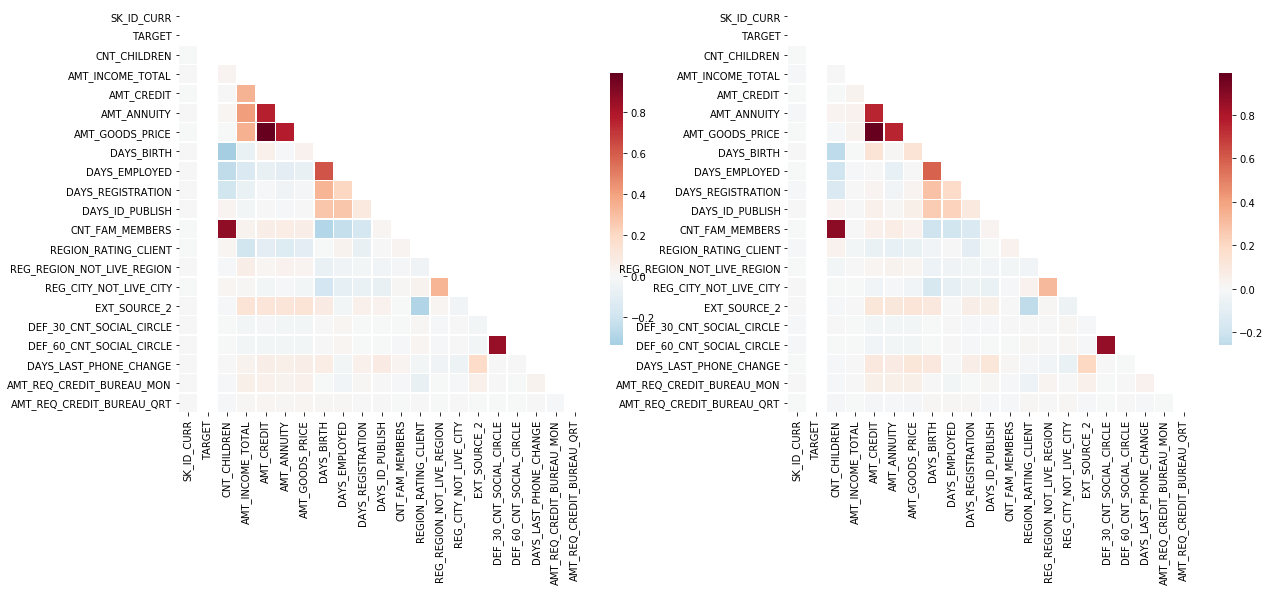

In [86]:

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
corr0_HeatMap = df0.corr()
df0_corr0_HeatMap = np.triu(np.ones_like(corr0_HeatMap, dtype=np.bool))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr0_HeatMap, mask=df0_corr0_HeatMap, cmap='RdBu_r', vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.subplot(1,2,2)
corr1_HeatMap = df1.corr()
df1_corr1_HeatMap = np.triu(np.ones_like(corr1_HeatMap, dtype=np.bool))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1_HeatMap, mask=df1_corr1_HeatMap, cmap='RdBu_r', vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


# Univariate Analysis

## <font color = blue>Categorical Variable

#### 1. FLAG_OWN_CAR (Flag if the client owns a car)

#### <font color = blue> Observation: Clients in Target 0 has more % of cars then clients in Target 1 (Difficulties in Payment). Own car could be factor for safer loan.

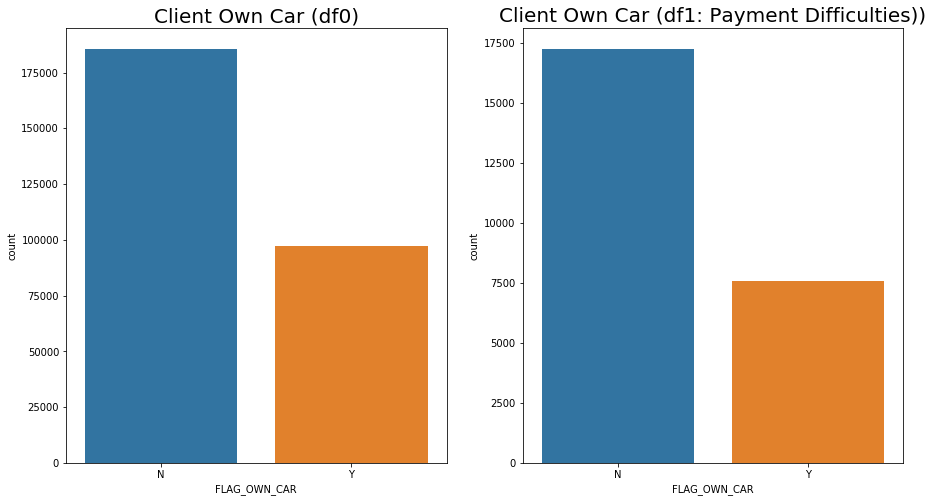

In [87]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df0['FLAG_OWN_CAR'])
plt.title("Client Own Car (df0)", fontsize=20)

plt.subplot(1,2,2)
sns.countplot(df1['FLAG_OWN_CAR'])
plt.title("Client Own Car (df1: Payment Difficulties))", fontsize=20)
plt.show()


In [88]:
df0['FLAG_OWN_CAR'].value_counts(normalize=True)

N    0.656824
Y    0.343176
Name: FLAG_OWN_CAR, dtype: float64

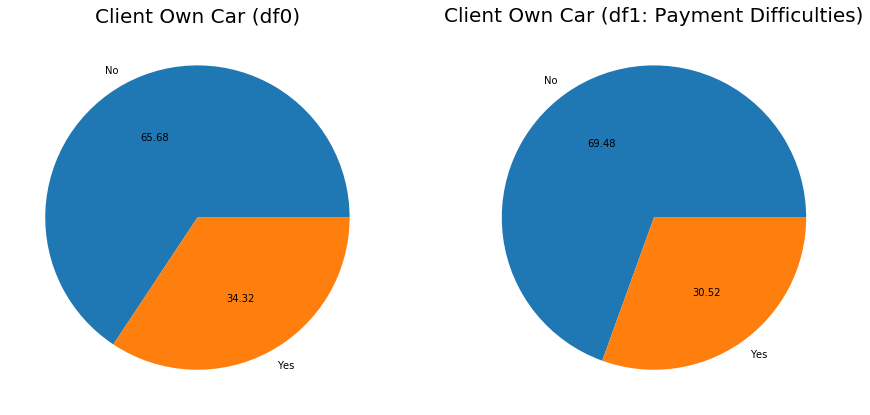

In [89]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(df0['FLAG_OWN_CAR'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title("Client Own Car (df0)", fontsize=20)

plt.subplot(1,2,2)
plt.pie(df1['FLAG_OWN_CAR'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%.2f')
plt.title("Client Own Car (df1: Payment Difficulties)", fontsize=20)
plt.show()

#### 2. FLAG_OWN_REALTY (Flag if client owns a house or flat)

#### <font color = blue> Observation: Clients in Target 0 has more % of own house or flat then clients in Target 1 (Difficulties in Payment). Own realty could be factor for safer loan. 
Clients count with own realty: 
    * Target 0: 196329
    * Target 1 (Difficulties in payment): 16983

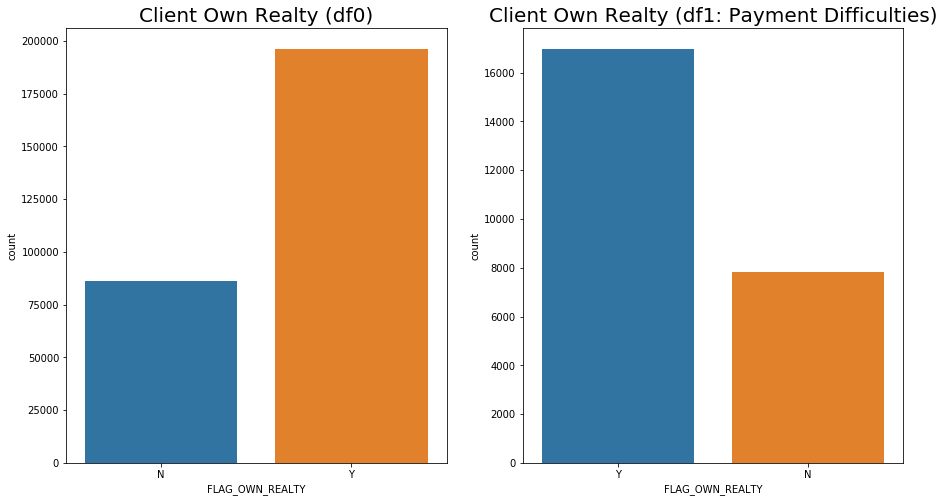

In [90]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df0['FLAG_OWN_REALTY'])
plt.title("Client Own Realty (df0)", fontsize=20)

plt.subplot(1,2,2)
sns.countplot(df1['FLAG_OWN_REALTY'])
plt.title("Client Own Realty (df1: Payment Difficulties)", fontsize=20)
plt.show()

In [285]:
df0['FLAG_OWN_REALTY'].value_counts()

Y    196329
N     86357
Name: FLAG_OWN_REALTY, dtype: int64

In [284]:
df1['FLAG_OWN_REALTY'].value_counts()

Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype: int64

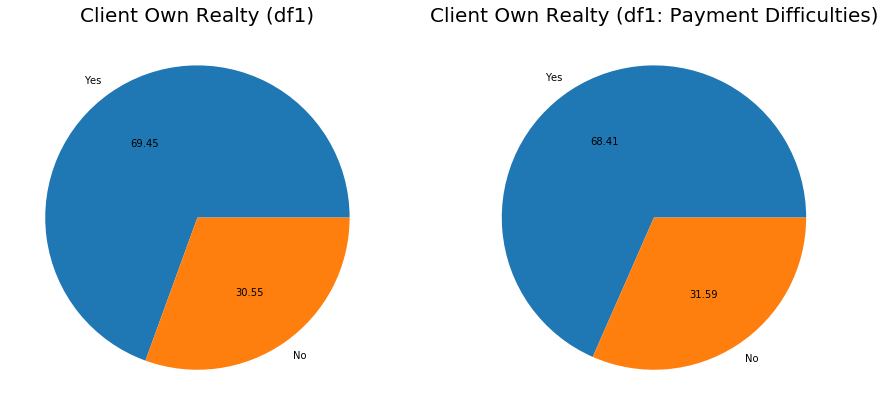

In [92]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(df0['FLAG_OWN_REALTY'].value_counts(normalize=True), labels=['Yes', 'No'], autopct='%.2f')
plt.title("Client Own Realty (df1)", fontsize=20)


plt.subplot(1,2,2)
plt.pie(df1['FLAG_OWN_REALTY'].value_counts(normalize=True), labels=['Yes', 'No'], autopct='%.2f')
plt.title("Client Own Realty (df1: Payment Difficulties)", fontsize=20)
plt.show()

#### 3. NAME_INCOME_TYPE (Clients income type (businessman, working, maternity leave,…)

#### <font color = blue> Observation: Income type- 'Working'contributes to most of the loans but equally contributes to most count & percentage with clients having difficulties in payment.


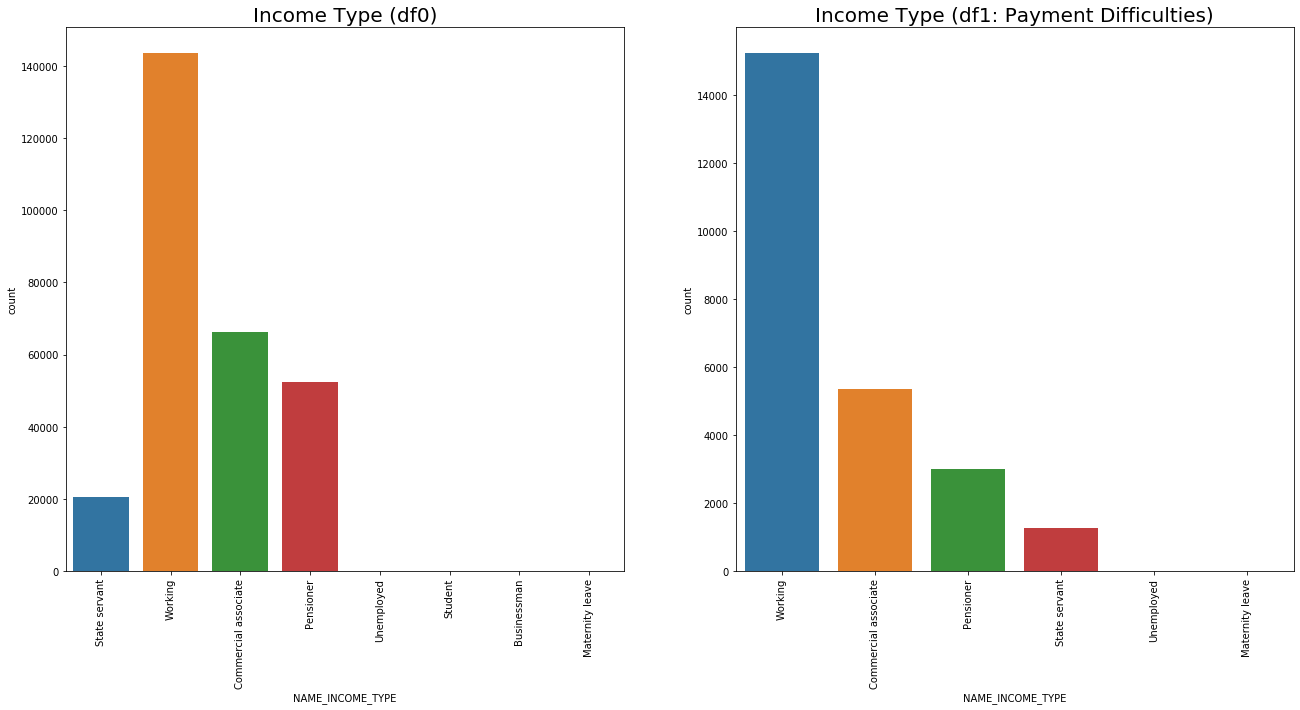

In [288]:
plt.figure(figsize=(22,10))
plt.subplot(1,2,1)
sns.countplot(df0['NAME_INCOME_TYPE'], )
plt.title("Income Type (df0)", fontsize=20)
plt.xlabel
plt.xticks(rotation=90, )

plt.subplot(1,2,2)
sns.countplot(df1['NAME_INCOME_TYPE'])
plt.xticks(rotation=90)
plt.title("Income Type (df1: Payment Difficulties)", fontsize=20)
plt.show()

In [290]:
df0['NAME_INCOME_TYPE'].value_counts()

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

In [289]:
df1['NAME_INCOME_TYPE'].value_counts()

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

#### 4. NAME_EDUCATION_TYPE (Level of highest education the client achieved)

#### <font color = blue> Observation: NAME_EDUCATION_TYPE
* 'Secondary / secondary special'contributes to most of the loans but equally contributes to most count & percentage with clients having difficulties in payment.
* 'Lower secondary' loan count is less but percentage clients with having difficultes in paymnet is highest.
* Clients with 'Higher education' are safe area for loan.

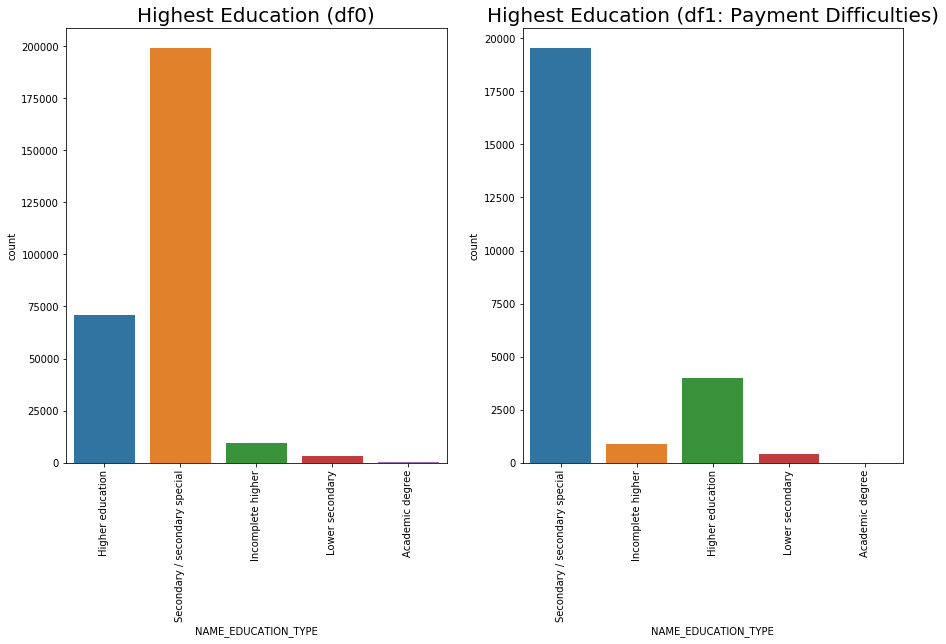

In [295]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df0['NAME_EDUCATION_TYPE'])
plt.title("Highest Education (df0)", fontsize=20)
plt.xticks(rotation=90)



plt.subplot(1,2,2)
sns.countplot(df1['NAME_EDUCATION_TYPE'])
plt.title("Highest Education (df1: Payment Difficulties)", fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [291]:
df0['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64

In [293]:
df1['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

#### 6. NAME_FAMILY_STATUS (Family status of the client)

#### <font color = blue> Observation: NAME_FAMILY_STATUS
* Clients with 'Married' & 'Separated' status are safe area for loan as they have high volume of loan count vs clients having difficulties with payment.
* Clients with 'Single / not married' status are having highest percentage of having difficulties with payment.

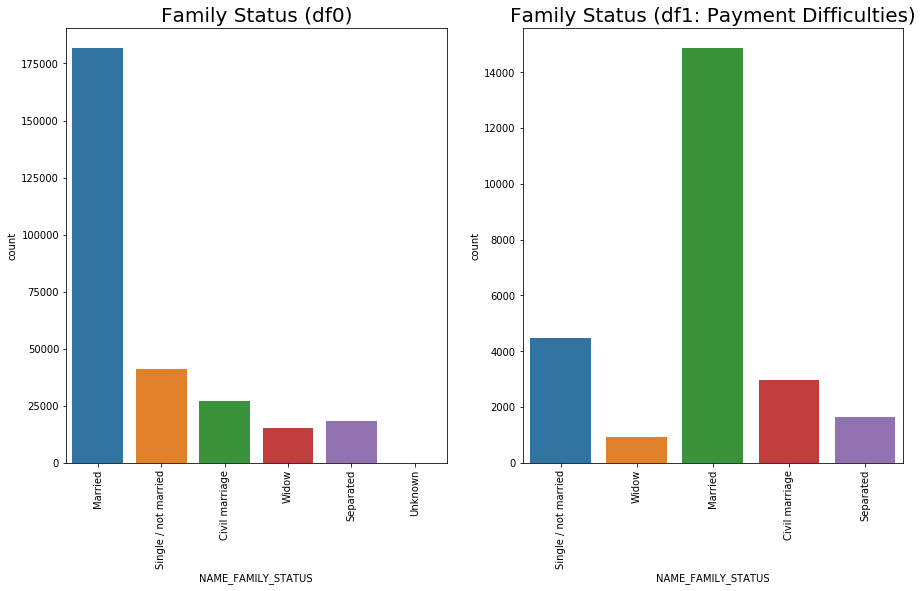

In [299]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df0['NAME_FAMILY_STATUS'])
plt.title("Family Status (df0)", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(df1['NAME_FAMILY_STATUS'])
plt.title("Family Status (df1: Payment Difficulties)", fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### 7. NAME_HOUSING_TYPE (What is the housing situation of the client (renting, living with parents, ...))

#### <font color = blue> Observation: NAME_HOUSING_TYPE
* Clients with 'House / apartment' status are safe area for loan as they have high volume of loan count vs clients having difficulties with payment.
* Clients with 'With parents' status are having highest percentage of having difficulties with payment.

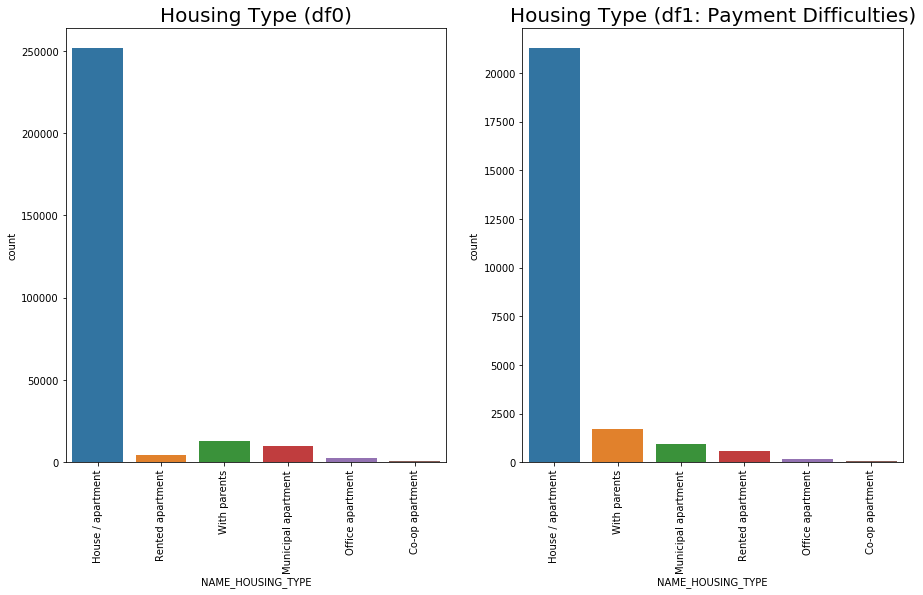

In [304]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df0['NAME_HOUSING_TYPE'])
plt.title("Housing Type (df0)", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(df1['NAME_HOUSING_TYPE'])
plt.title("Housing Type (df1: Payment Difficulties)", fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [300]:
df1['NAME_HOUSING_TYPE'].value_counts()

House / apartment      21272
With parents            1736
Municipal apartment      955
Rented apartment         601
Office apartment         172
Co-op apartment           89
Name: NAME_HOUSING_TYPE, dtype: int64

#### 8. OCCUPATION_TYPE (What kind of occupation does the client have)

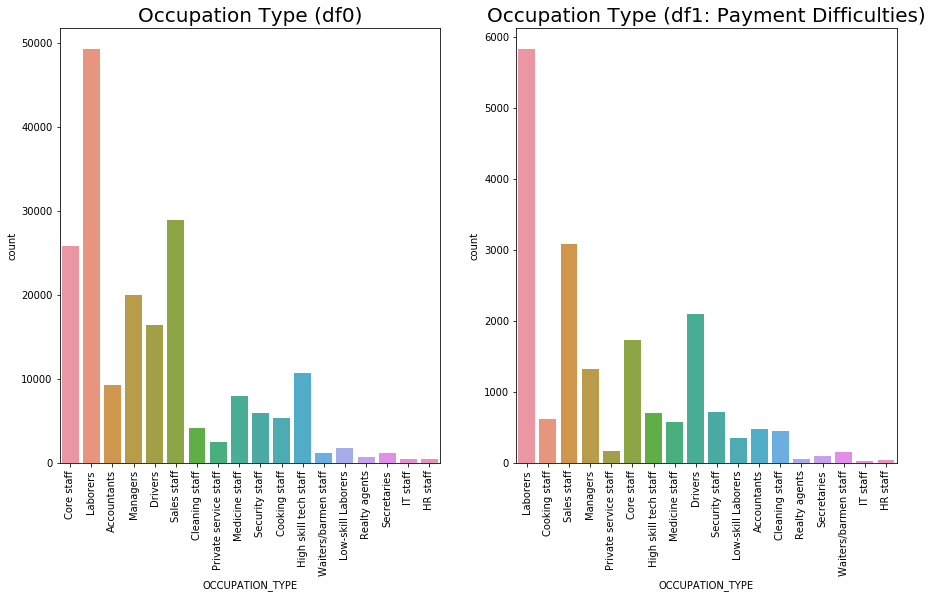

In [308]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df0['OCCUPATION_TYPE'])
plt.title("Occupation Type (df0)", fontsize=20)
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.countplot(df1['OCCUPATION_TYPE'])
plt.title("Occupation Type (df1: Payment Difficulties)", fontsize=20)
plt.xticks(rotation=90)
plt.show()

## <font color = blue>Continous Variable

#### 1. AMT_INCOME_TOTAL (Income of the client)

#### <font color = blue> Observation: AMT_INCOME_TOTAL
* There are outliers in client income. Some of them are ir-realistic.

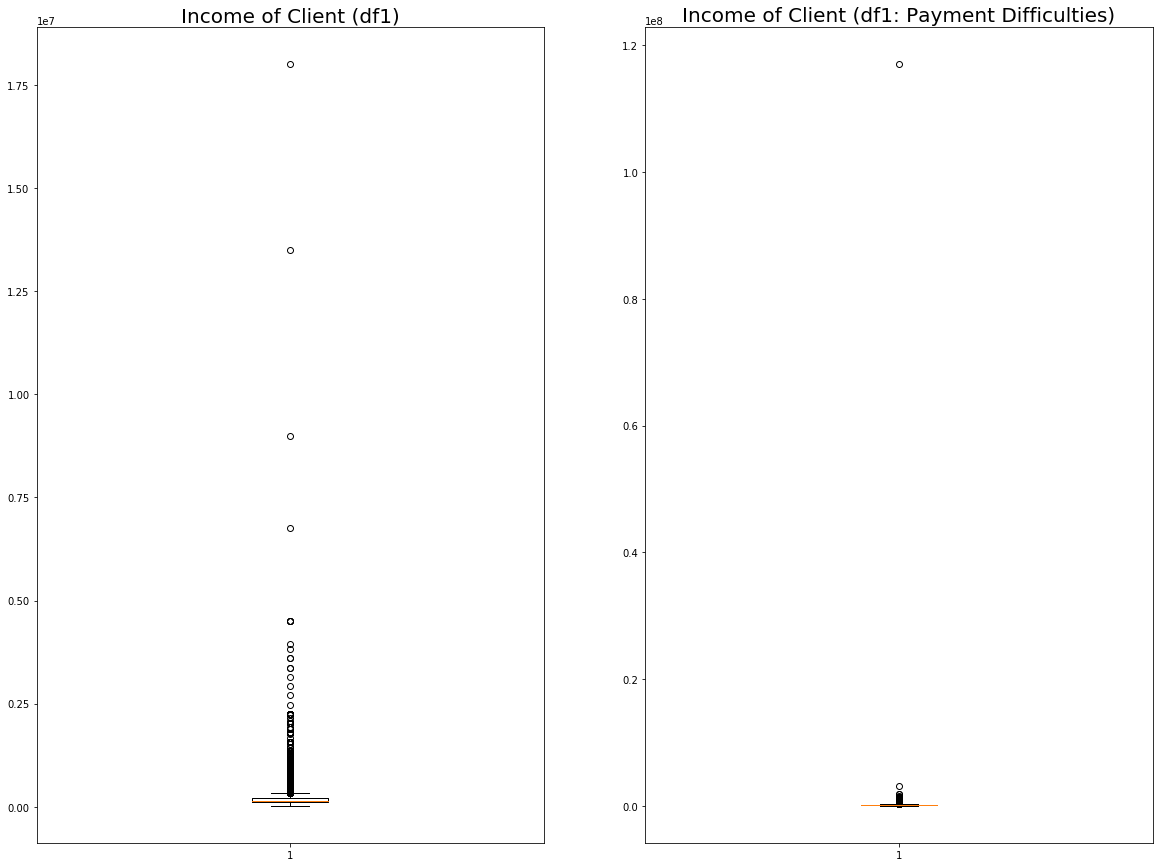

In [98]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.boxplot(data=df0, x='AMT_INCOME_TOTAL')
plt.title('Income of Client (df1)', fontsize = 20) 


plt.subplot(1,2,2)
plt.boxplot(data=df1, x='AMT_INCOME_TOTAL')
plt.title('Income of Client (df1: Payment Difficulties)', fontsize = 20) 

plt.show()

### 2. AMT_CREDIT (Credit amount of the loan)

#### <font color = blue> Observation: AMT_CREDIT
* The probability of loan amount around 500000 is high with clients having difficulites in payment.

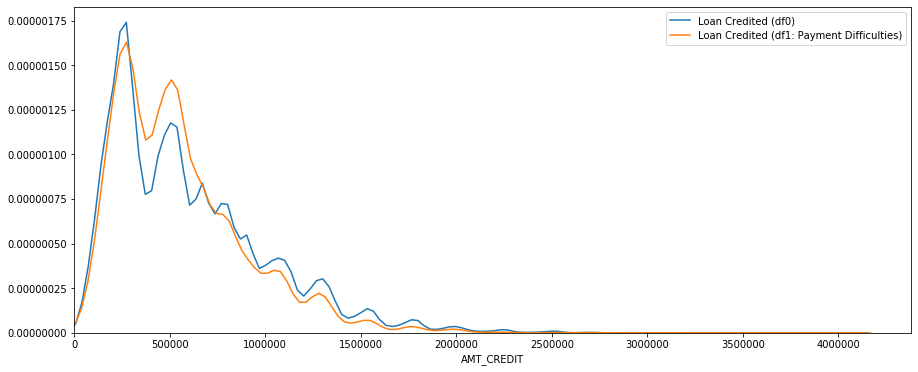

In [313]:
plt.figure(figsize=(15,6))
sns.distplot(df0['AMT_CREDIT'], hist=False, label= 'Loan Credited (df0)')
sns.distplot(df1['AMT_CREDIT'], hist=False, label= 'Loan Credited (df1: Payment Difficulties)')
plt.xlim(0, None)
plt.show()

#### 3. AMT_GOODS_PRICE (For consumer loans it is the price of the goods for which the loan is given)

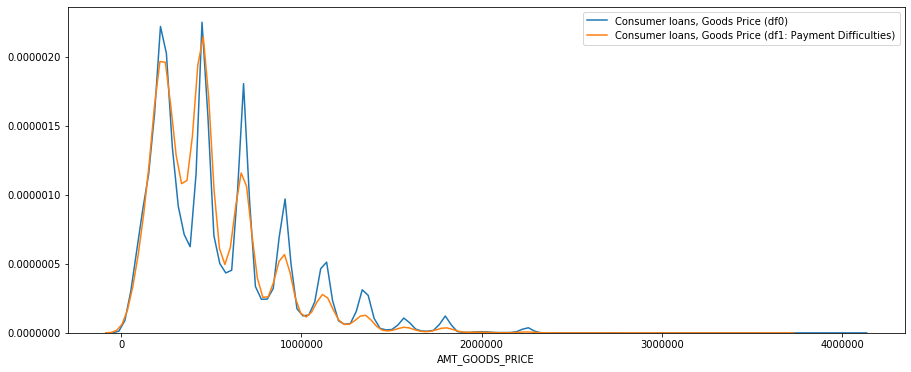

In [100]:
plt.figure(figsize=(15,6))
sns.distplot(df0['AMT_GOODS_PRICE'], hist=False, label= 'Consumer loans, Goods Price (df0)')
sns.distplot(df1['AMT_GOODS_PRICE'], hist=False, label= 'Consumer loans, Goods Price (df1: Payment Difficulties)')

C:\Users\bdhillo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bdhillo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


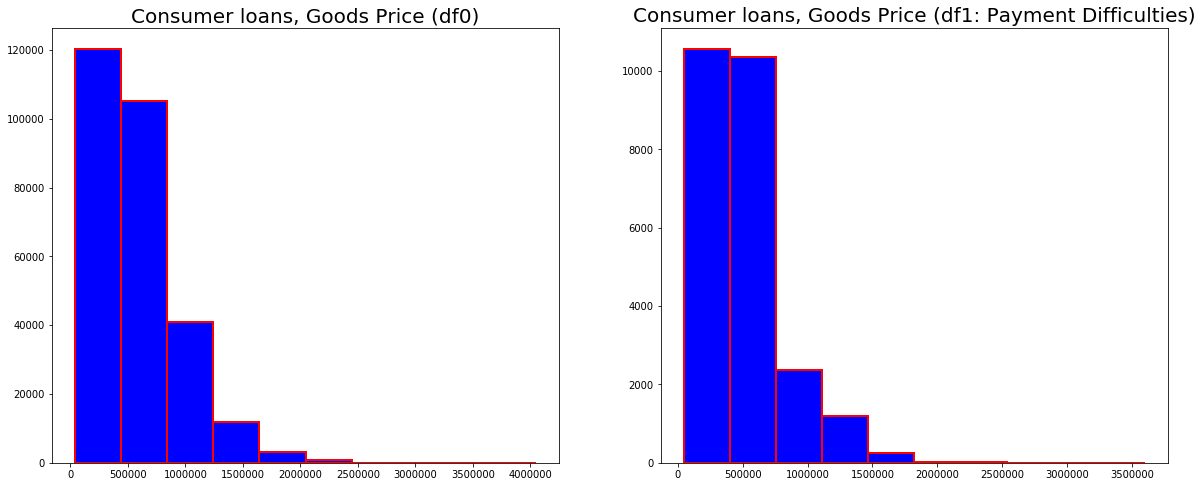

In [101]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(data=df0, x='AMT_GOODS_PRICE', color='blue', edgecolor='red',linewidth=2)
plt.title('Consumer loans, Goods Price (df0)', fontsize = 20) 


plt.subplot(1,2,2)
plt.hist(data=df1, x='AMT_GOODS_PRICE', color='blue', edgecolor='red',linewidth=2)
plt.title('Consumer loans, Goods Price (df1: Payment Difficulties)', fontsize = 20) 

plt.show()

#### DAYS_ID_PUBLISH (How many days before the application did client change the identity document with which he applied for the loan)

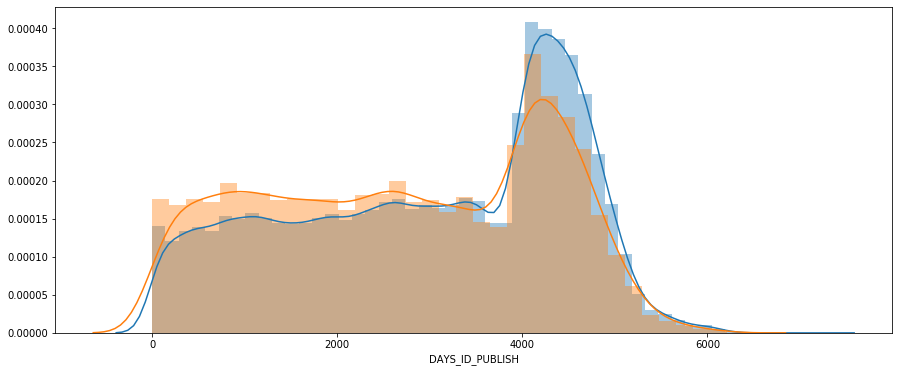

In [102]:
plt.figure(figsize=(15,6))
sns.distplot(df0['DAYS_ID_PUBLISH'], label= 'Days before ID was changed (df0)')
sns.distplot(df1['DAYS_ID_PUBLISH'], label= 'Days before ID was changed (df1: Payment Difficulties)')
plt.show()

### EXT_SOURCE_2 (Normalized score from external data source)

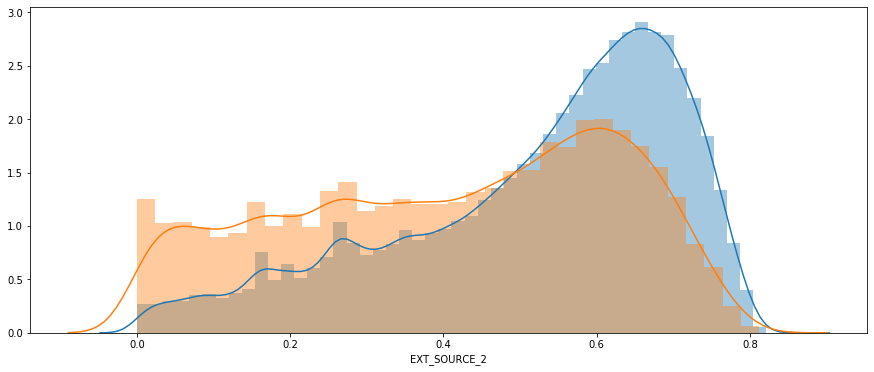

In [103]:
plt.figure(figsize=(15,6))
sns.distplot(df0['EXT_SOURCE_2'])
sns.distplot(df1['EXT_SOURCE_2'])
labels=['test_label1','test_label2']
plt.show()

## Bivariate Analysis

## <font color = blue>Continous - Continous Variable

#### AMT_CREDIT  vs AMT_INCOME_TOTAL

#### <font color = blue> Observation: 
* There is not much of correlation between client income and loan created. ideally, more income more should be loan amount but it is opposite here, lot of high value has been created with low client income and this is not positive move.


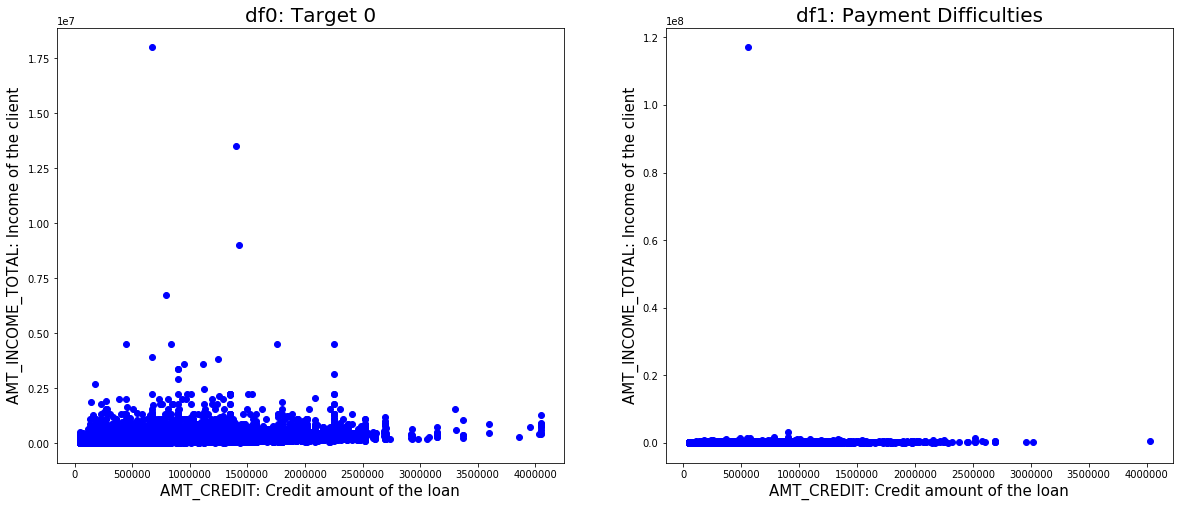

In [314]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df0['AMT_CREDIT'], df0['AMT_INCOME_TOTAL'], color='blue')
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
plt.ylabel("AMT_INCOME_TOTAL: Income of the client", fontsize=15)

plt.subplot(1,2,2)
plt.scatter(df1['AMT_CREDIT'], df1['AMT_INCOME_TOTAL'], color='blue')
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
plt.ylabel("AMT_INCOME_TOTAL: Income of the client", fontsize=15)
plt.show()

#### AMT_CREDIT  vs AMT_GOODS_PRICE

#### <font color = blue> Observation: 
* There is a linear patern and data has high correlation.

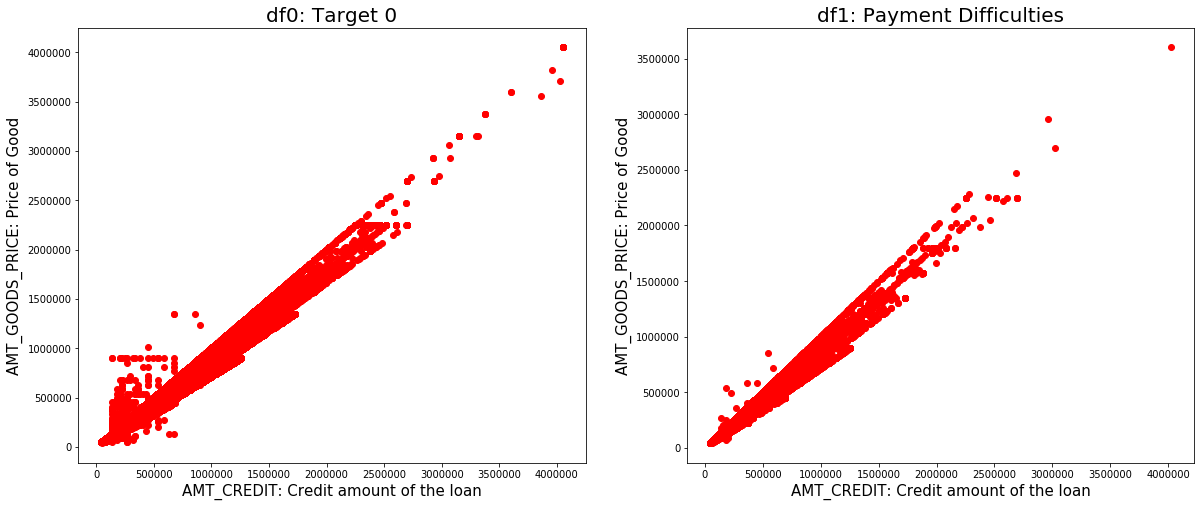

In [105]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df0['AMT_CREDIT'], df0['AMT_GOODS_PRICE'], color='red')
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
plt.ylabel("AMT_GOODS_PRICE: Price of Good", fontsize=15)

plt.subplot(1,2,2)
plt.scatter(df1['AMT_CREDIT'], df1['AMT_GOODS_PRICE'], color='red')
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
plt.ylabel("AMT_GOODS_PRICE: Price of Good", fontsize=15)
plt.show()

#### AMT_CREDIT vs AMT_ANNUITY


#### <font color = blue> Observation: 
* There is a linear patern and data has high correlation but the annuity for the clients having difficulties with payment is high vs amount credited.
* Is this because of tenure period for is low making annuity period high and leading to difficulties in payment.

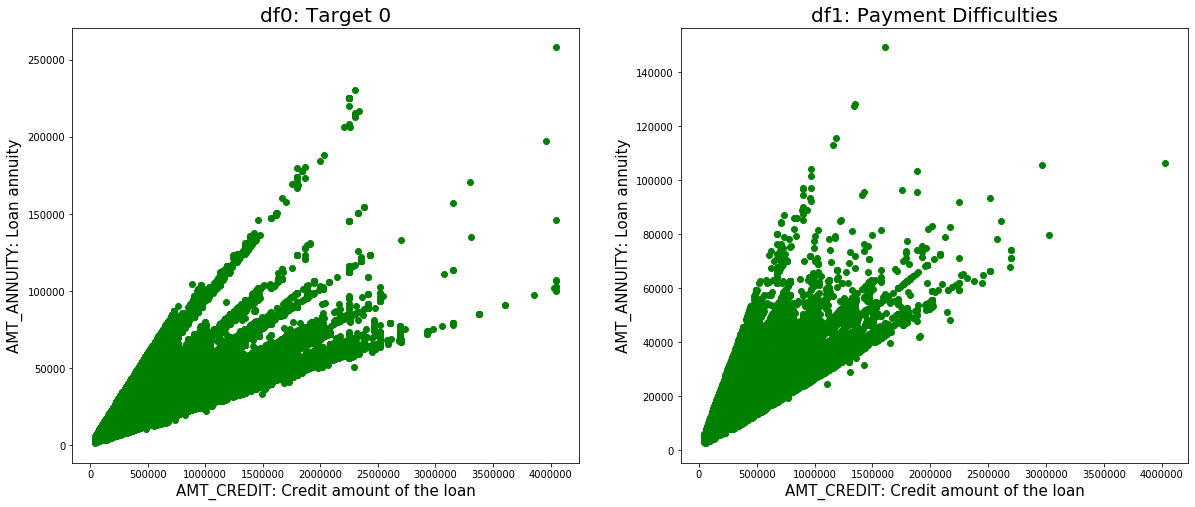

In [106]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df0['AMT_CREDIT'], df0['AMT_ANNUITY'], color='green')
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
plt.ylabel("AMT_ANNUITY: Loan annuity", fontsize=15)

plt.subplot(1,2,2)
plt.scatter(df1['AMT_CREDIT'], df1['AMT_ANNUITY'], color='green')
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
plt.ylabel("AMT_ANNUITY: Loan annuity", fontsize=15)
plt.show()

#### AMT_INCOME_TOTAL vs AMT_ANNUITY

#### <font color = blue> Observation: 
* There is no major correlation between Income and annuity. Ideally, there should be positive linear correlation with increase in income should lead to increase in annuity.
* In most of the cases, annuity proportion is high vs client income 


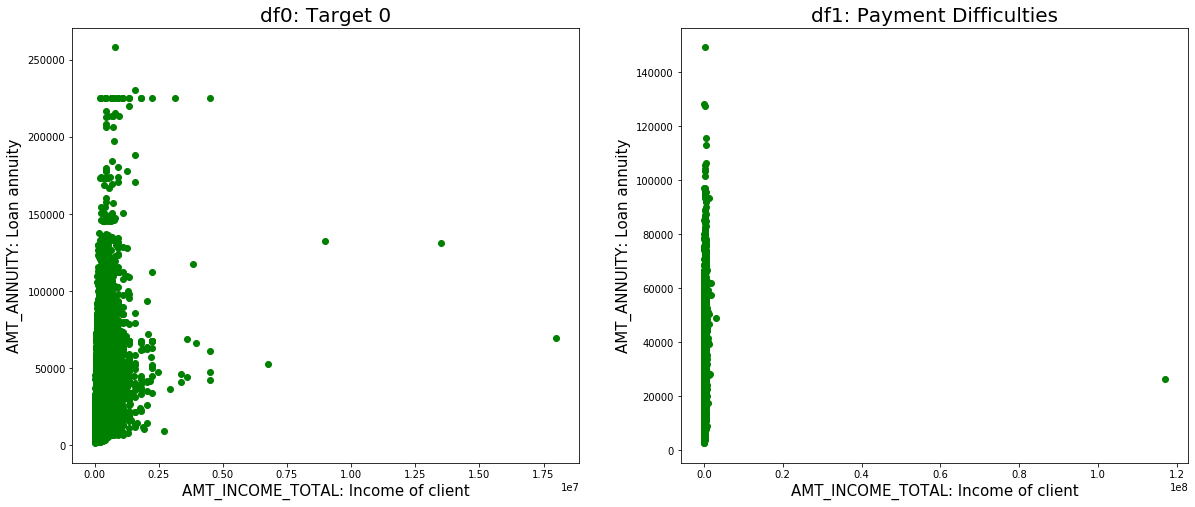

In [107]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df0['AMT_INCOME_TOTAL'], df0['AMT_ANNUITY'], color='green')
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("AMT_INCOME_TOTAL: Income of client", fontsize=15)
plt.ylabel("AMT_ANNUITY: Loan annuity", fontsize=15)

plt.subplot(1,2,2)
plt.scatter(df1['AMT_INCOME_TOTAL'], df1['AMT_ANNUITY'], color='green')
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("AMT_INCOME_TOTAL: Income of client", fontsize=15)
plt.ylabel("AMT_ANNUITY: Loan annuity", fontsize=15)
plt.show()

#### AMT_GOODS_PRICE vs AMT_ANNUITY

#### <font color = blue> Observation: 
* There is a strong positive linear pattern and correlation between Annuity and loan good price.

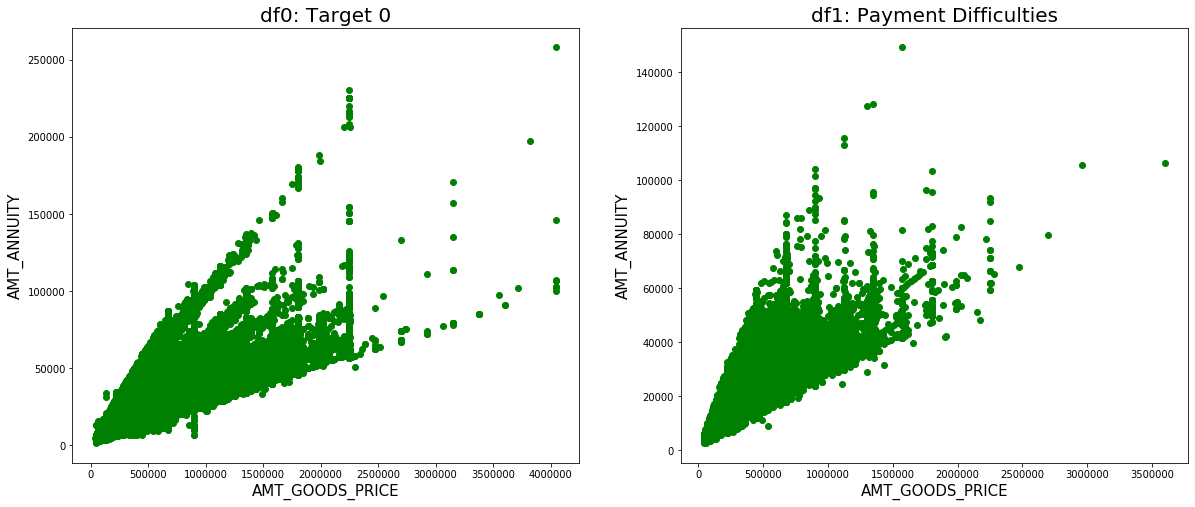

In [315]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df0['AMT_GOODS_PRICE'], df0['AMT_ANNUITY'], color='green')
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("AMT_GOODS_PRICE", fontsize=15)
plt.ylabel("AMT_ANNUITY", fontsize=15)

plt.subplot(1,2,2)
plt.scatter(df1['AMT_GOODS_PRICE'], df1['AMT_ANNUITY'], color='green')
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("AMT_GOODS_PRICE", fontsize=15)
plt.ylabel("AMT_ANNUITY", fontsize=15)
plt.show()

#### AMT_INCOME_TOTAL vs AMT_GOODS_PRICE

#### <font color = blue> Observation: 
* There is no major correlation between Income and loan for good price. Ideally, there should be positive linear correlation with increase in income should lead to increase in loan for goods prices.
* In most of the cases, loan for good price is increasing without increase in client income .

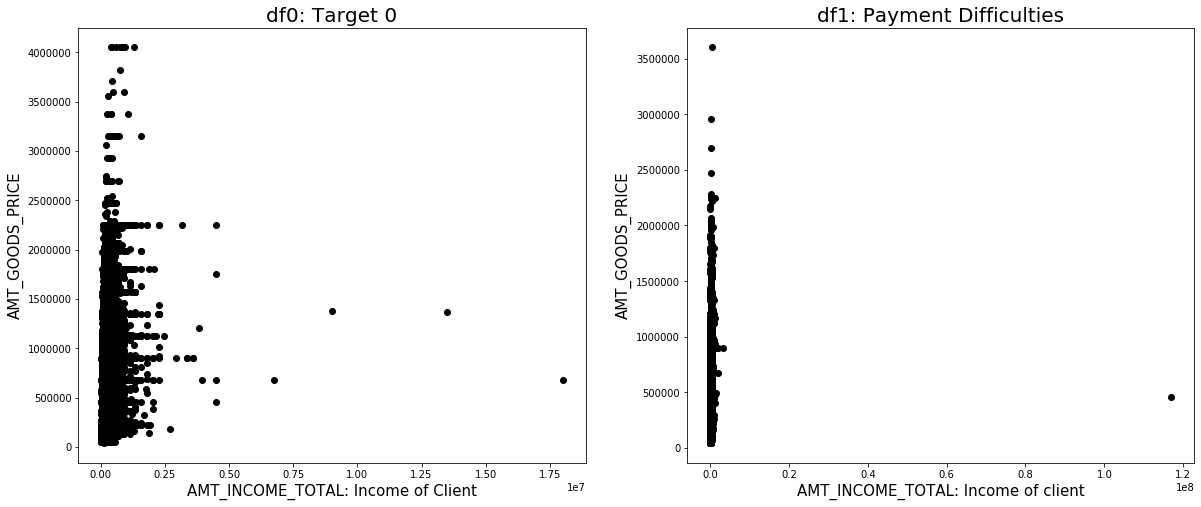

In [317]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df0['AMT_INCOME_TOTAL'], df0['AMT_GOODS_PRICE'], color='black')
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("AMT_INCOME_TOTAL: Income of Client", fontsize=15)
plt.ylabel("AMT_GOODS_PRICE", fontsize=15)

plt.subplot(1,2,2)
plt.scatter(df1['AMT_INCOME_TOTAL'], df1['AMT_GOODS_PRICE'], color='black')
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("AMT_INCOME_TOTAL: Income of client", fontsize=15)
plt.ylabel("AMT_GOODS_PRICE", fontsize=15)
plt.show()

## <font color = blue> Continous - Catagorical

### CODE_GENDER vs AMT_CREDIT

#### <font color = blue> Observation: 
* No major observation but looks like, female clients with payment diffcilties has more outliers in loan amount credited against male clients.

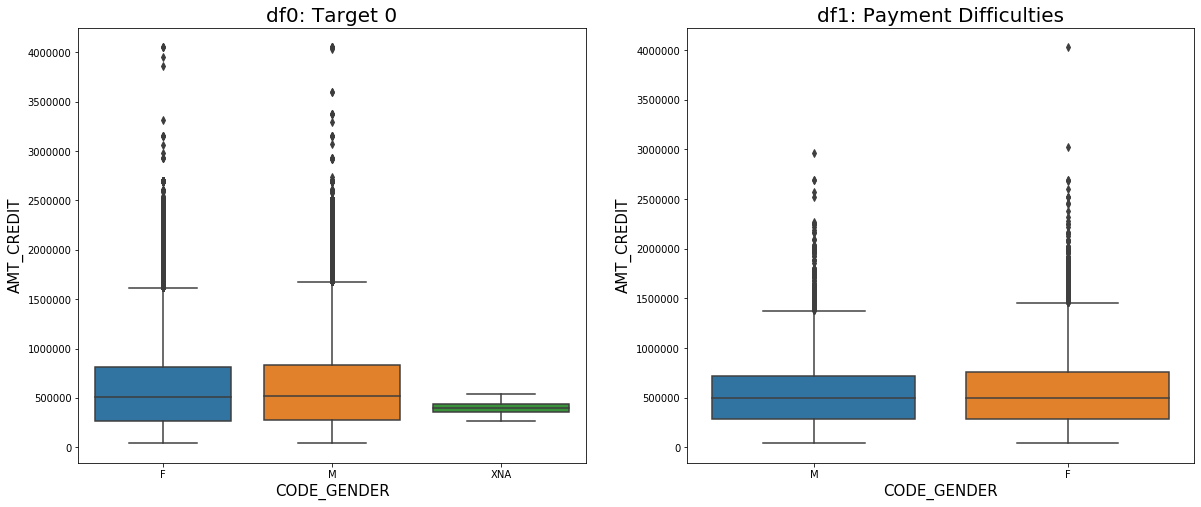

In [110]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(df0['CODE_GENDER'], df0['AMT_CREDIT'])
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("CODE_GENDER", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(df1['CODE_GENDER'], df1['AMT_CREDIT'])
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("CODE_GENDER", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.show()

### NAME_INCOME_TYPE vs AMT_CREDIT
### NAME_INCOME_TYPE vs AMT_INCOME_TOTAL

#### <font color = blue> Observation: 
* Income Type- Businessman has no payment difficulties. They should be promoted more for loans. Client income are also high for Businessman income type
* Income Type: Maternity Leave- The mean is high for clients with payment difficulties. Seems like, high value loan are created.
* Income Type: commercial Associates- The loan amount credit has high outliers. 

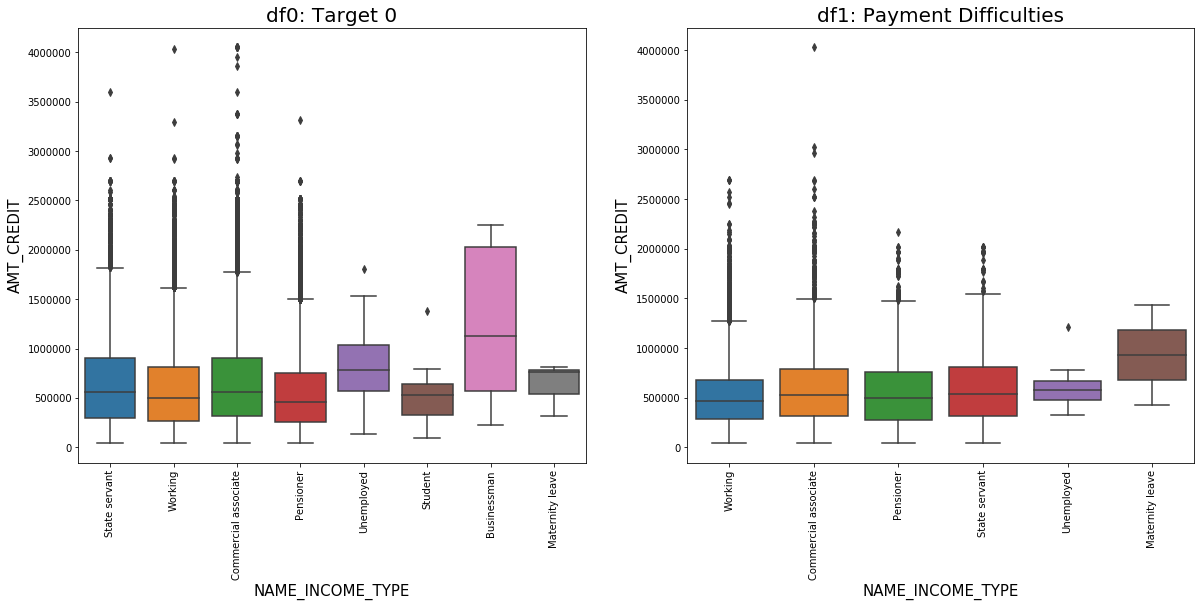

In [321]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(df0['NAME_INCOME_TYPE'], df0['AMT_CREDIT'])
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("NAME_INCOME_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(df1['NAME_INCOME_TYPE'], df1['AMT_CREDIT'])
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("NAME_INCOME_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)

plt.show()

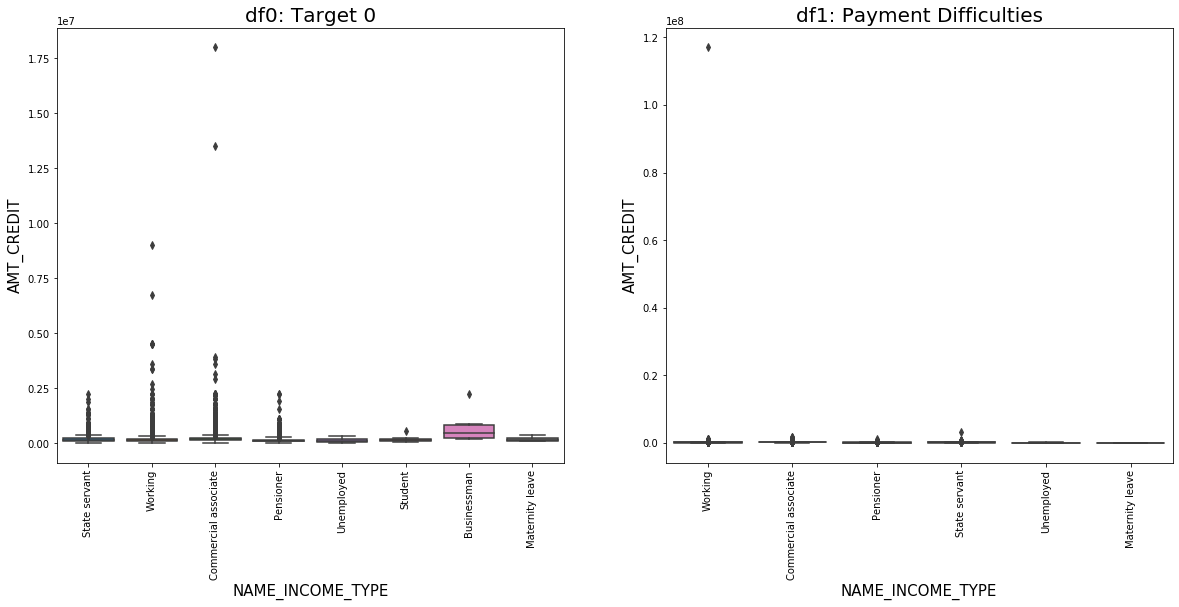

In [322]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(df0['NAME_INCOME_TYPE'], df0['AMT_INCOME_TOTAL'])
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("NAME_INCOME_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(df1['NAME_INCOME_TYPE'], df1['AMT_INCOME_TOTAL'])
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("NAME_INCOME_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)

plt.show()

### NAME_EDUCATION_TYPE vs AMT_CREDIT

#### <font color = blue> Observation: 
* Clients with Academic Degree having difficulties in payment has higher mean.
* Outliers for clients with Higher education is more then other education type.

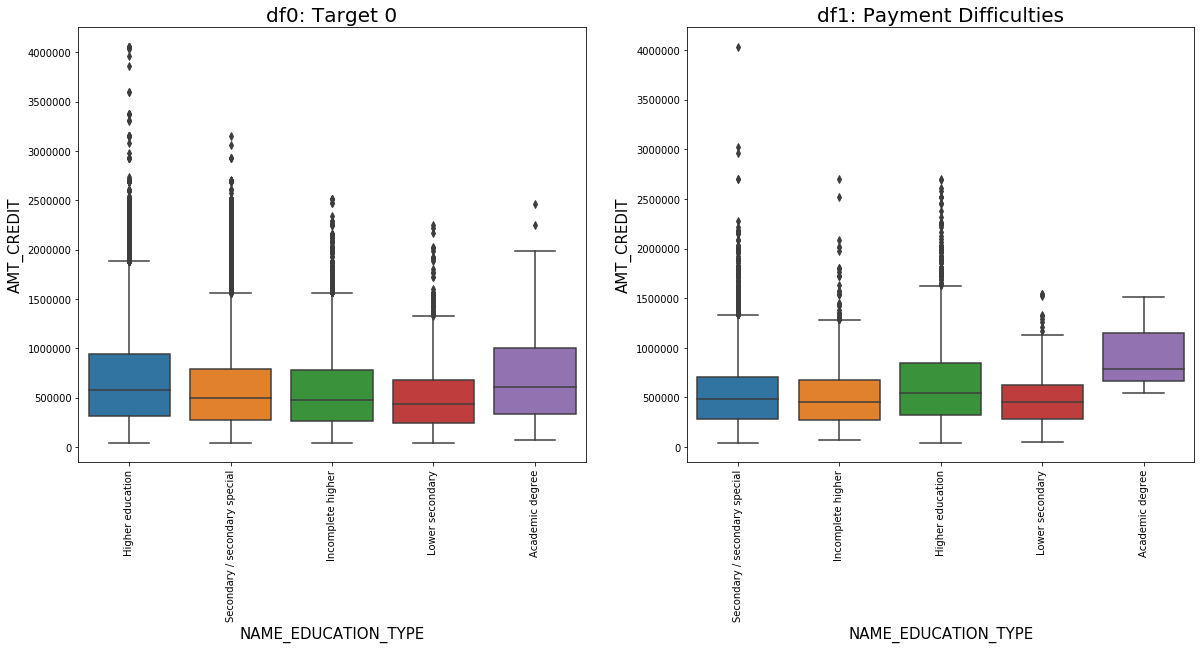

In [326]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(df0['NAME_EDUCATION_TYPE'], df0['AMT_CREDIT'])
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("NAME_EDUCATION_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(df1['NAME_EDUCATION_TYPE'], df1['AMT_CREDIT'])
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("NAME_EDUCATION_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)
plt.show()

### NAME_FAMILY_STATUS vs AMT_CREDIT
### NAME_HOUSING_TYPE vs AMT_CREDIT
### OCCUPATION_TYPE vs AMT_CREDIT

#### <font color = blue> Observation: 
* Married clients has higher mean, IQR and outliers.
* Clients with occupation like Managers and Accountants has high mean and IQR having difficulties with payment

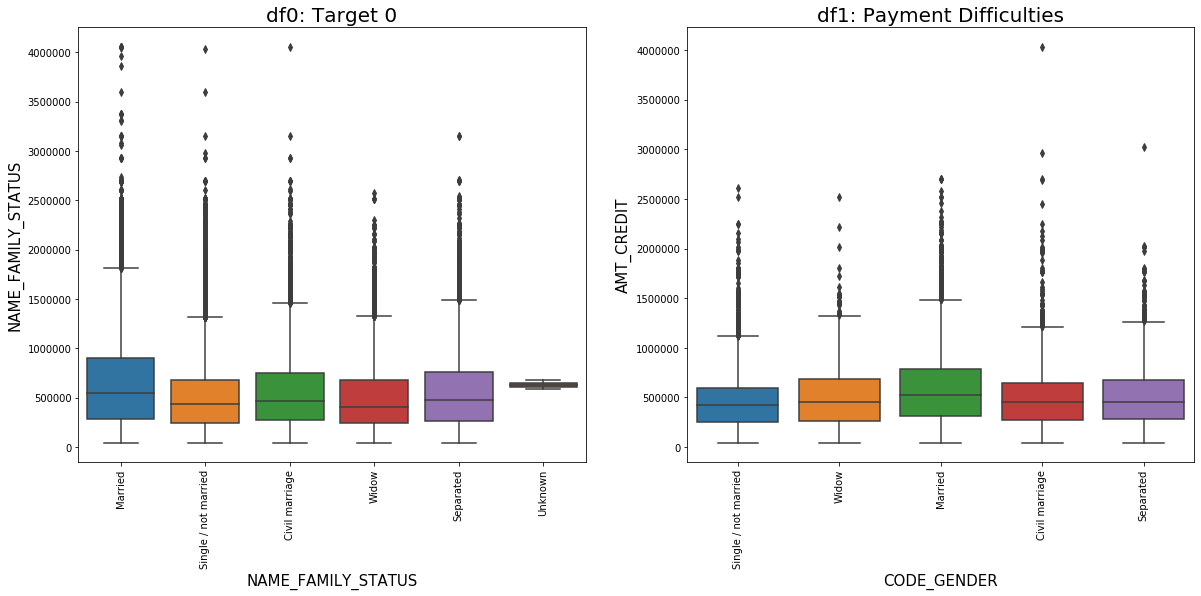

In [328]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(df0['NAME_FAMILY_STATUS'], df0['AMT_CREDIT'])
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("NAME_FAMILY_STATUS", fontsize=15)
plt.ylabel("NAME_FAMILY_STATUS", fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(df1['NAME_FAMILY_STATUS'], df1['AMT_CREDIT'])
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("CODE_GENDER", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)

plt.show()

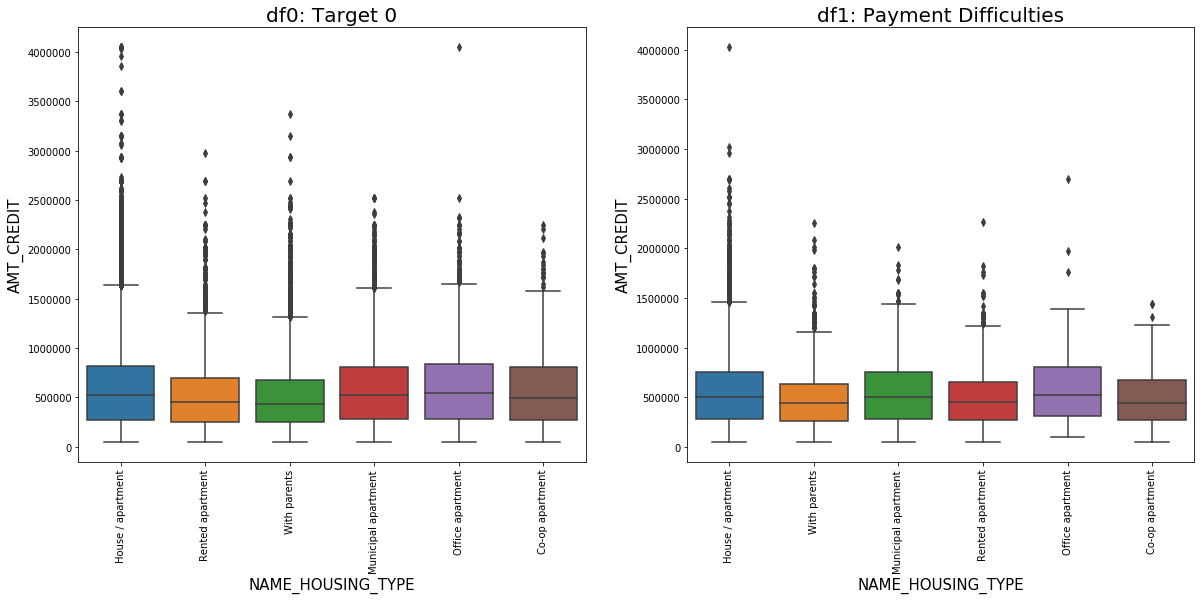

In [329]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(df0['NAME_HOUSING_TYPE'], df0['AMT_CREDIT'])
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("NAME_HOUSING_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(df1['NAME_HOUSING_TYPE'], df1['AMT_CREDIT'])
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("NAME_HOUSING_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)
plt.show()

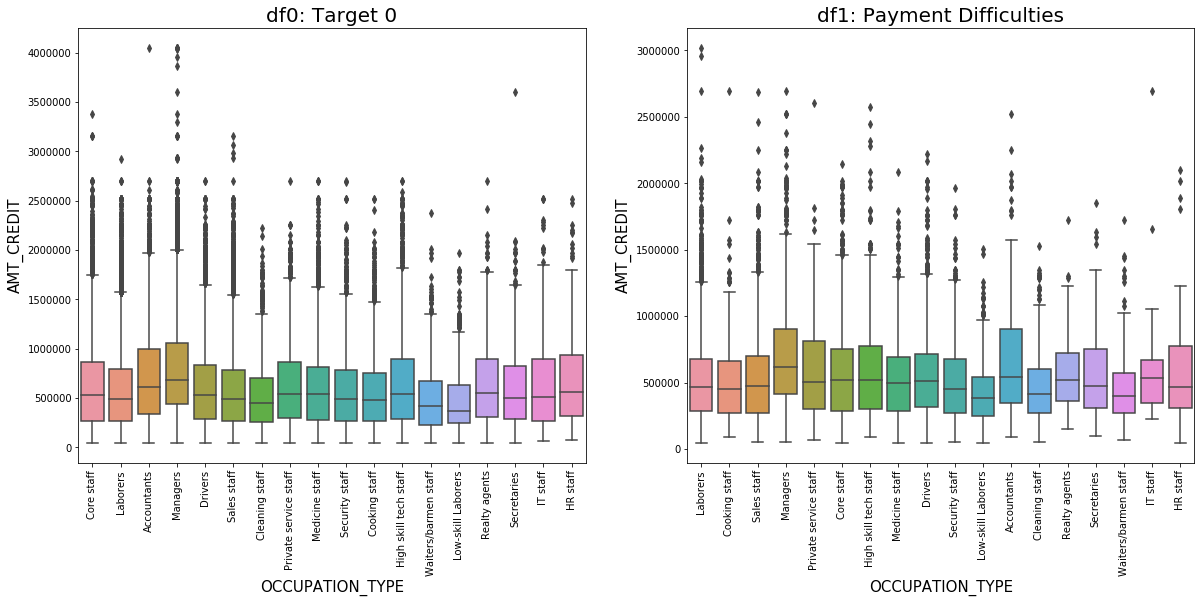

In [330]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(df0['OCCUPATION_TYPE'], df0['AMT_CREDIT'])
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("OCCUPATION_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(df1['OCCUPATION_TYPE'], df1['AMT_CREDIT'])
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("OCCUPATION_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.xticks(rotation=90)

plt.show()

### NAME_EDUCATION_TYPE vs DAYS_EMPLOYED

#### <font color = blue> Observation: 
* Incorrect data for Day Employed for clients. This can be ssen below during boxplot (Education: Lower Secondary). This will impact any analysis on days Employed. It required imputation.

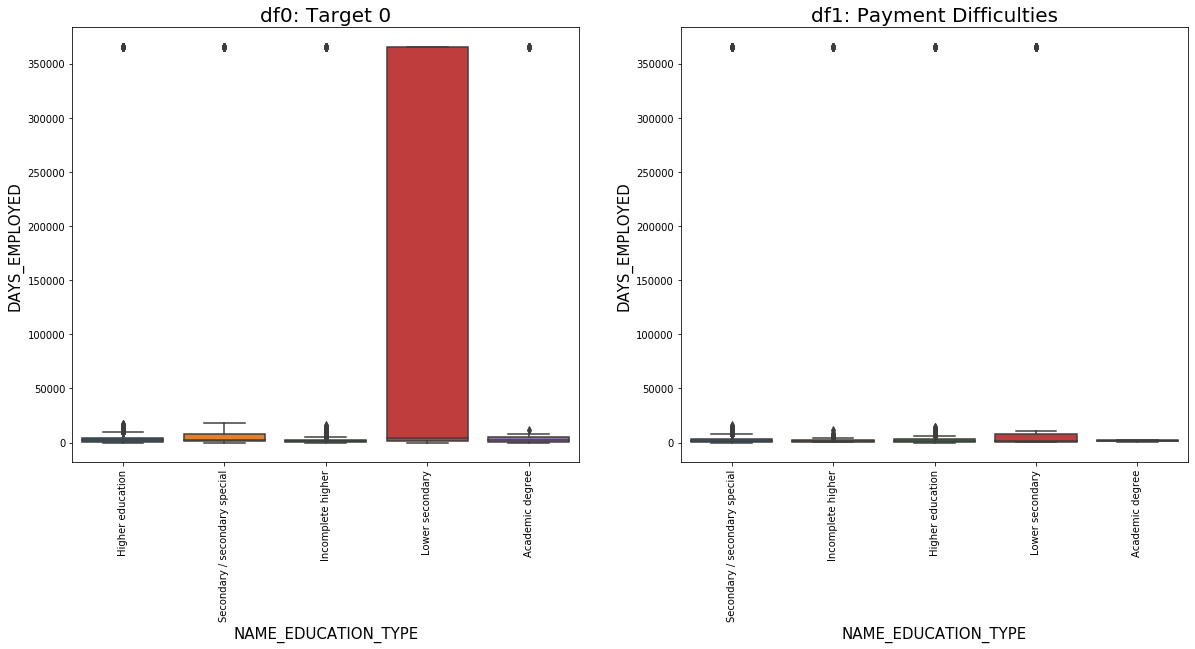

In [337]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(df0['NAME_EDUCATION_TYPE'], df0['DAYS_EMPLOYED'])
plt.title("df0: Target 0", fontsize=20)
plt.xlabel("NAME_EDUCATION_TYPE", fontsize=15)
plt.ylabel("DAYS_EMPLOYED", fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(df1['NAME_EDUCATION_TYPE'], df1['DAYS_EMPLOYED'])
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xlabel("NAME_EDUCATION_TYPE", fontsize=15)
plt.ylabel("DAYS_EMPLOYED", fontsize=15)
plt.xticks(rotation=90)

plt.show()

## <font color = blue> Catagorical - Catagorical

### NAME_EDUCATION_TYPE vs CODE_GENDER

#### <font color = blue> Observation: 
* Count of Female clients with difficulties in payment is high then Male Client.
* Female clients with Higher Education & Secondary Education has high difficulties in payment

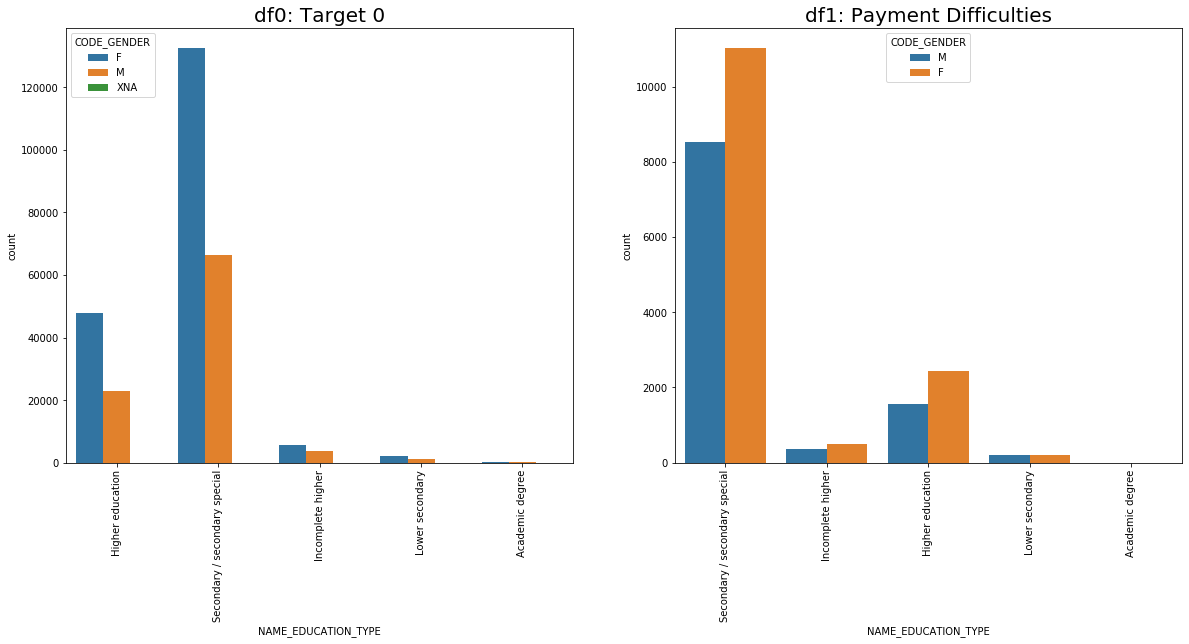

In [338]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x= 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data= df0 )
plt.title("df0: Target 0", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x= 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data= df1 )
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xticks(rotation=90)
plt.show()

### NAME_INCOME_TYPE vs FLAG_OWN_CAR'

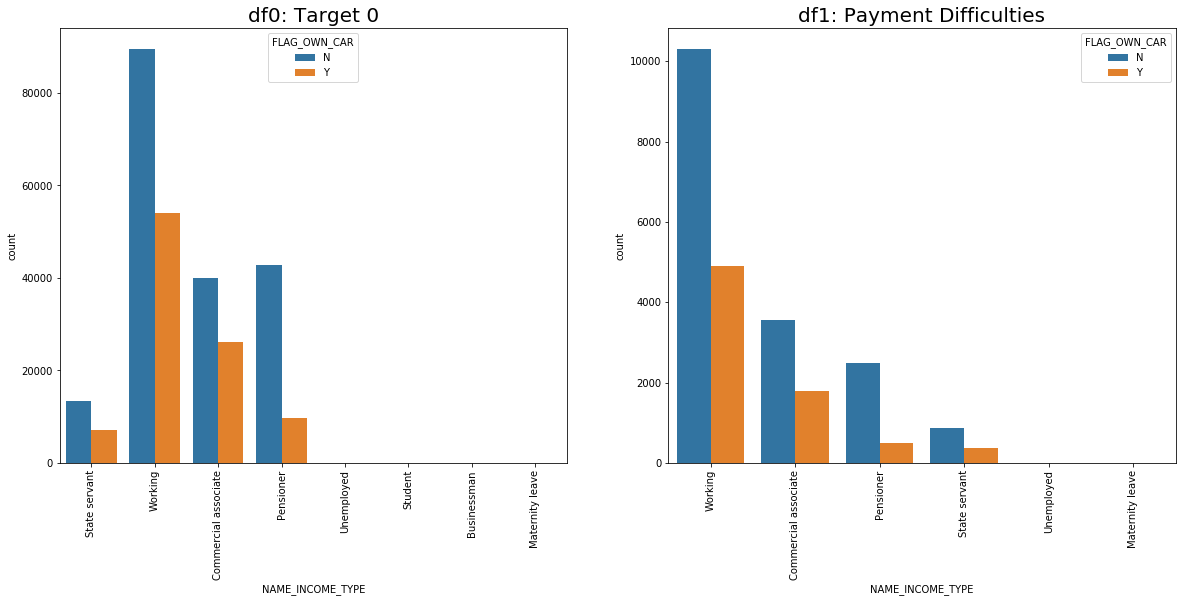

In [342]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x= 'NAME_INCOME_TYPE', hue = 'FLAG_OWN_CAR', data= df0 )
plt.title("df0: Target 0", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x= 'NAME_INCOME_TYPE', hue = 'FLAG_OWN_CAR', data= df1 )
plt.title("df1: Payment Difficulties", fontsize=20)

plt.xticks(rotation=90)
plt.show()

### NAME_INCOME_TYPE vs FLAG_OWN_REALTY
### NAME_FAMILY_STATUS vs FLAG_OWN_REALTY

#### <font color = blue> Observation: 
* Working cleints with own realty (House or Flat) has high possibility with difficulties in payment.
* Clients with own realty (House or Flat) should be preffered.

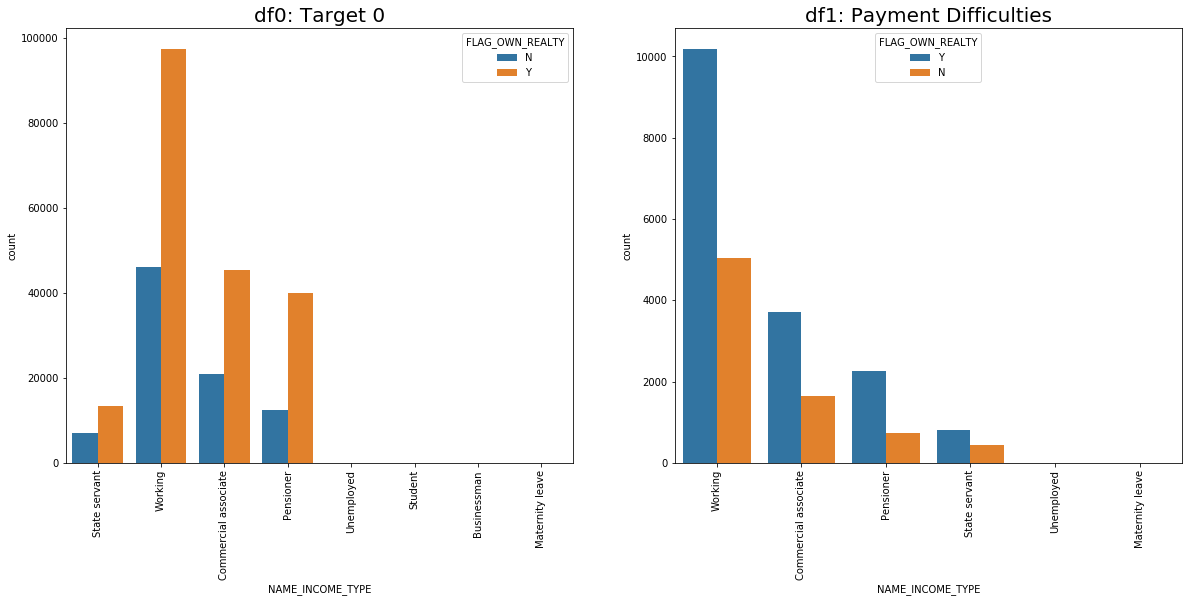

In [343]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x= 'NAME_INCOME_TYPE', hue = 'FLAG_OWN_REALTY', data= df0 )
plt.title("df0: Target 0", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x= 'NAME_INCOME_TYPE', hue = 'FLAG_OWN_REALTY', data= df1 )
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xticks(rotation=90)
plt.show()

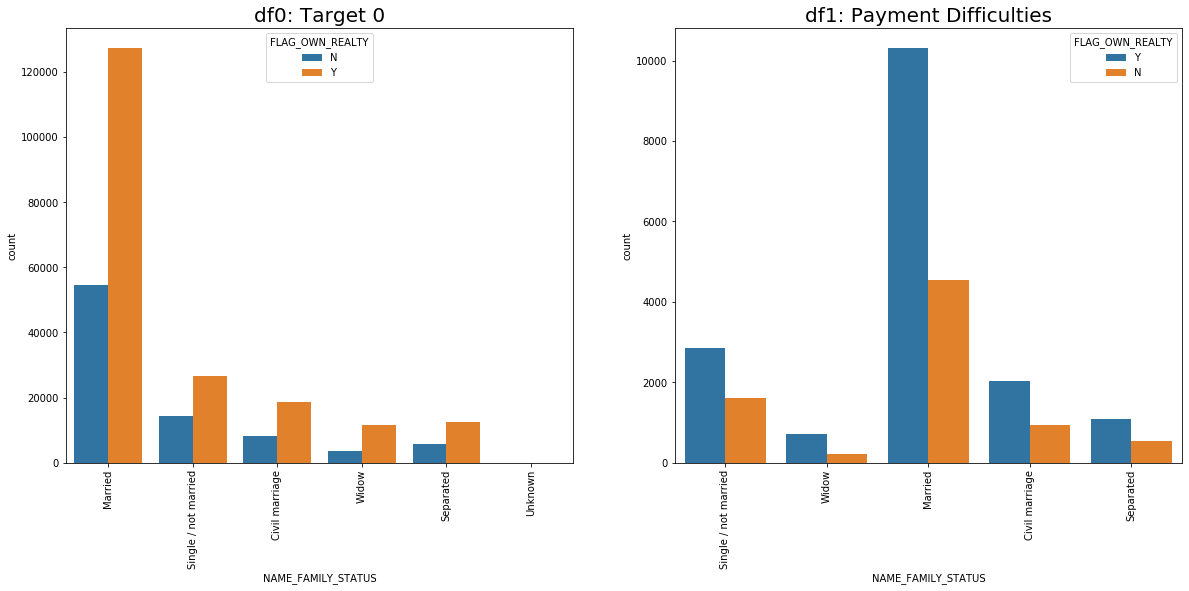

In [344]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x= 'NAME_FAMILY_STATUS', hue = 'FLAG_OWN_REALTY', data= df0 )
plt.title("df0: Target 0", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x= 'NAME_FAMILY_STATUS', hue = 'FLAG_OWN_REALTY', data= df1 )
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xticks(rotation=90)
plt.show()

### NAME_INCOME_TYPE vs NAME_HOUSING_TYPE

#### <font color = blue> Observation: 
* Client living with parents has higher difficulties in payment as compare to other Housing type.



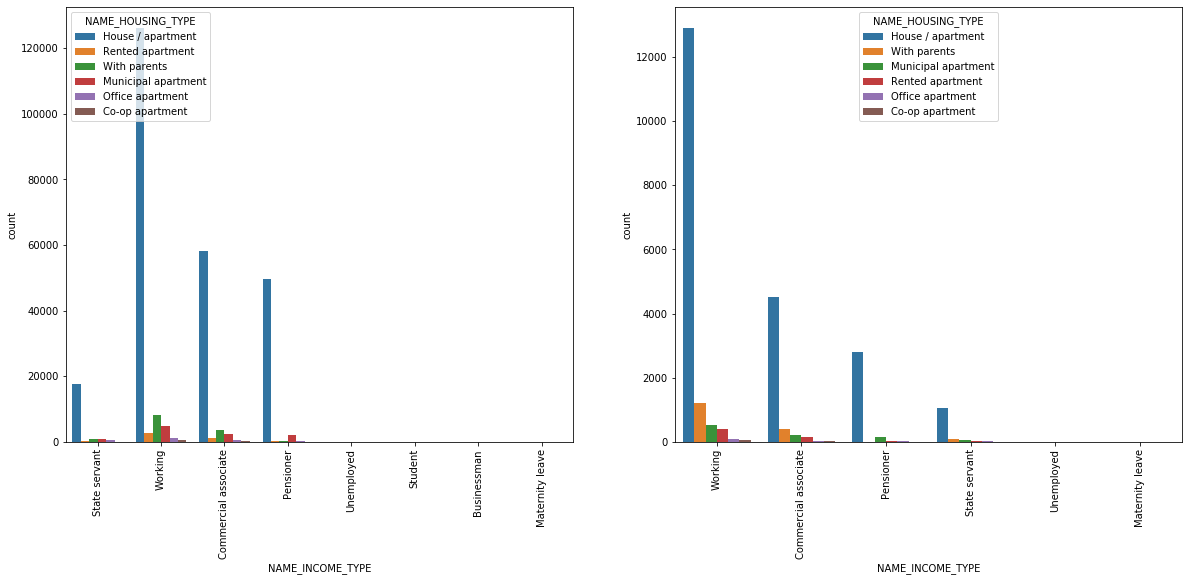

In [345]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x= 'NAME_INCOME_TYPE', hue = 'NAME_HOUSING_TYPE', data= df0 )
plt.title("df0: Target 0", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x= 'NAME_INCOME_TYPE', hue = 'NAME_HOUSING_TYPE', data= df1 )
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xticks(rotation=90)
plt.show()

### OCCUPATION_TYPE vs CODE_GENDER

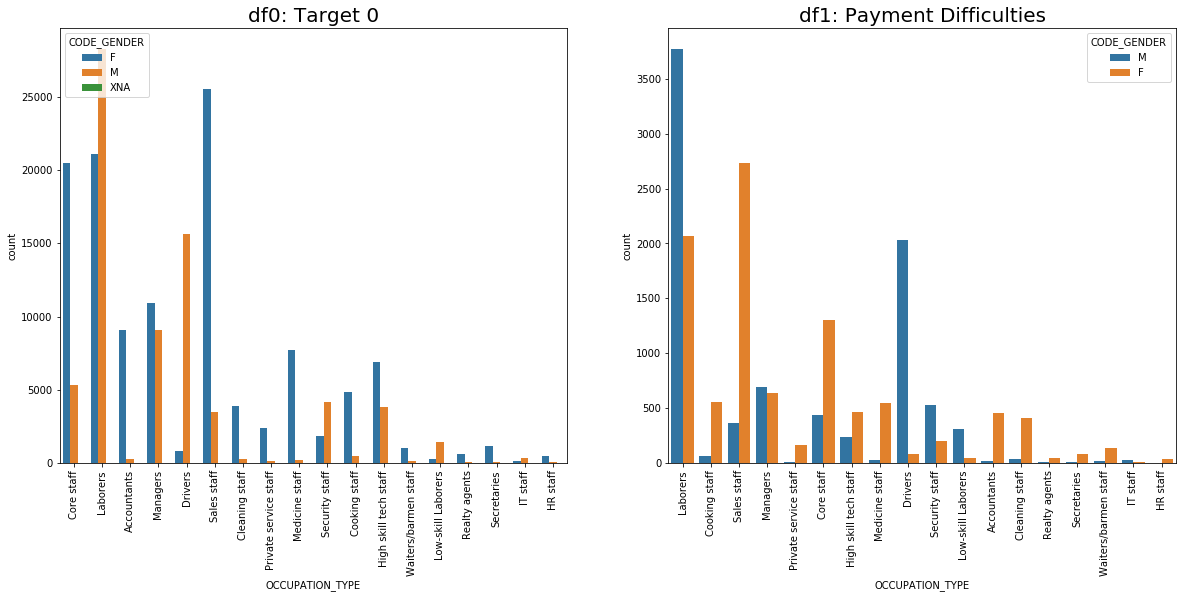

In [352]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x= 'OCCUPATION_TYPE', hue = 'CODE_GENDER', data= df0 )
plt.title("df0: Target 0", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x= 'OCCUPATION_TYPE', hue = 'CODE_GENDER', data= df1 )
plt.title("df1: Payment Difficulties", fontsize=20)
plt.xticks(rotation=90)
plt.show()

## Read Previous Application Data set & Structure check of Data set

In [355]:
# Loaging of file
df_pre = pd.read_csv('previous_application.csv')

In [356]:
df_pre.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [354]:
# Checking Shape
df_pre.shape

(1670214, 37)

In [357]:
# Checking Columns and Dtype
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [358]:
# Checking Null Values
df_pre.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## <font color = blue> Correlation Ananlysis on Previous Application Data

In [359]:
# Top 10 correlation for df0 (target:0)
corr0 = df_pre.corr()
df_pre_corr0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool)).unstack().reset_index()
df_pre_corr0.columns = ['Variable 1', 'variable 2', 'Correlation']
df_pre_corr0.dropna(subset=['Correlation'], inplace=True)
df_pre_corr0['Abs_Correlation'] = df_pre_corr0['Correlation'].abs()
df_pre_corr0.sort_values(by='Abs_Correlation', ascending=False, inplace=True)
df_pre_corr0.head(10)

,Variable 1,variable 2,Correlation,Abs_Correlation
129,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
130,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
87,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
417,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
128,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
86,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
65,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
372,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
297,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
298,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


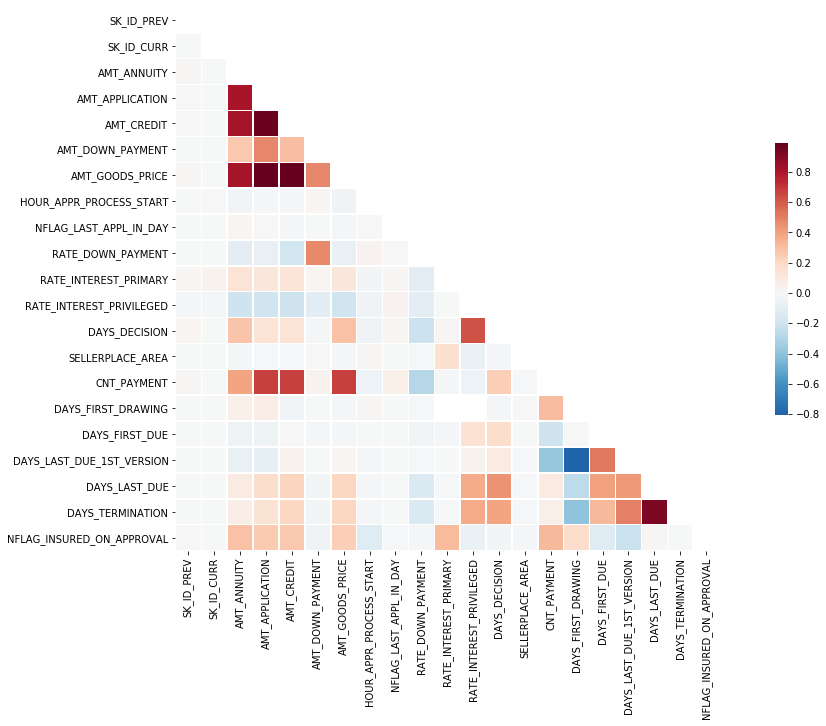

In [361]:
plt.figure(figsize=(20, 10))
corr0_HeatMap = df_pre.corr()
df_pre_corr0_HeatMap = np.triu(np.ones_like(corr0_HeatMap, dtype=np.bool))
sns.heatmap(corr0_HeatMap, mask=df0_corr0_HeatMap, cmap='RdBu_r', vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### <font color = blue> Optional Activity: Merging of both DF: Previous Application & Application Data

#### <font color = blue> We plan to do Outer Join as Previous Application Datafile has more & previous Loan ID (SK_ID_CURR) and we should include them in further analysis.
This might be wrong but we plan to use this technique for first analysis

In [362]:
# Merge of both Datafile
df_merge = pd.merge(df_pre, df, on='SK_ID_CURR', how='outer', indicator=True )

In [363]:
df_merge.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Bin_AMT_INCOME,Bin_AMT_CREDIT,_merge
0,2030495.0,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.000000,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,14443.0,7392.0,8447.0,4120.0,NaN,3.0,1.0,0.0,0.0,Military,0.683797,0.0,0.0,548.0,0.0,0.0,Above Average,Average Credit,both
1,1696966.0,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18.0,Y,1.0,0.101325,NaN,NaN,XAP,Refused,-472.0,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55.0,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,14443.0,7392.0,8447.0,4120.0,NaN,3.0,1.0,0.0,0.0,Military,0.683797,0.0,0.0,548.0,0.0,0.0,Above Average,Average Credit,both
2,2154916.0,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-548.0,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196.0,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,14443.0,7392.0,8447.0,4120.0,NaN,3.0,1.0,0.0,0.0,Military,0.683797,0.0,0.0,548.0,0.0,0.0,Above Average,Average Credit,both
3,2802425.0,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0.0,Revolving loans,F,N,N,0.0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,21335.0,1255.0,5455.0,4263.0,Private service staff,2.0,2.0,0.0,0.0,Self-employed,0.663524,0.0,0.0,517.0,NaN,NaN,Below Average,Low Credit,both
4,1536272.0,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-515.0,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,0.0,Revolving loans,F,N,N,0.0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,21335.0,1255.0,5455.0,4263.0,Private service staff,2.0,2.0,0.0,0.0,Self-employed,0.6635

In [364]:
# Checking Shape post merging
df_merge.shape

(1686668, 71)

In [365]:
# Checking unique customer ID
df_merge['SK_ID_CURR'].nunique()

355311

In [136]:
df_inner = pd.merge(df_pre, df, on='SK_ID_CURR', )

In [138]:
df_merge['SK_ID_CURR'].nunique()

355311

In [139]:
df_inner.shape

(1413701, 70)

In [140]:
df_inner['SK_ID_CURR'].nunique()

291057

In [141]:
df['SK_ID_CURR'].nunique()

307511

In [142]:
df_pre.shape

(1670214, 37)

In [143]:
# df_merge.to_csv('file1.csv') 

In [144]:
# df_inner.to_csv('file2.csv') 

## <font color = blue> Correlation Ananlysis on Merged Datafile

In [366]:
# Top 10 correlation for df0 (target:0)
corr0 = df_merge.corr()
df_merge_corr0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool)).unstack().reset_index()
df_merge_corr0.columns = ['Variable 1', 'variable 2', 'Correlation']
df_merge_corr0.dropna(subset=['Correlation'], inplace=True)
df_merge_corr0['Abs_Correlation'] = df_merge_corr0['Correlation'].abs()
df_merge_corr0.sort_values(by='Abs_Correlation', ascending=False, inplace=True)
df_merge_corr0.head(10)

,Variable 1,variable 2,Correlation,Abs_Correlation
249,AMT_GOODS_PRICE_x,AMT_APPLICATION,0.999884,0.999884
250,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.993087,0.993087
1090,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.986401,0.986401
167,AMT_CREDIT_x,AMT_APPLICATION,0.975824,0.975824
797,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
1293,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878916,0.878916
1553,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.862539,0.862539
248,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,0.820895,0.820895
166,AMT_CREDIT_x,AMT_ANNUITY_x,0.816429,0.816429
125,AMT_APPLICATION,AMT_ANNUITY_x,0.808872,0.808872


## <font color = blue> Analysis: Univariate & Bivariate
    

### Creating datafiles based on Name_Contract_Status 

In [367]:
df_m_a = df_merge[df_merge['NAME_CONTRACT_STATUS'] =='Approved']
df_m_c = df_merge[df_merge['NAME_CONTRACT_STATUS'] =='Canceled']
df_m_r = df_merge[df_merge['NAME_CONTRACT_STATUS'] =='Refused']
df_m_u = df_merge[df_merge['NAME_CONTRACT_STATUS'] =='Unused offer']

####<font color = blue> Observation- NAME_CONTRACT_TYPE:
* Consumer Loan has highed number of Unused offer.
* Cash loan has majority of Refusal & Canceled.
* Consumer loan are majority of approved loan.   

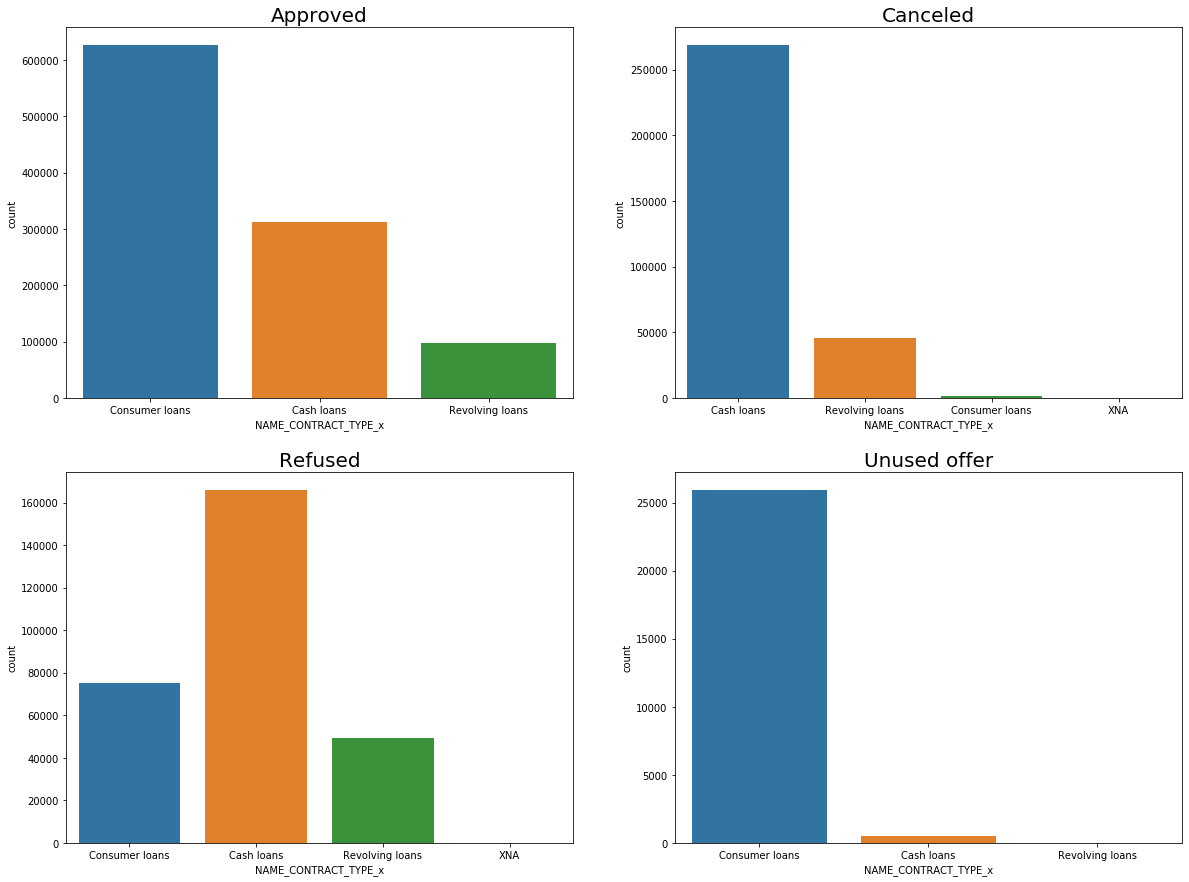

In [368]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(df_m_a['NAME_CONTRACT_TYPE_x'])
plt.title("Approved", fontsize=20)


plt.subplot(2,2,2)
sns.countplot(df_m_c['NAME_CONTRACT_TYPE_x'])
plt.title("Canceled", fontsize=20)


plt.subplot(2,2,3)
sns.countplot(df_m_r['NAME_CONTRACT_TYPE_x'])
plt.title("Refused", fontsize=20)


plt.subplot(2,2,4)
sns.countplot(df_m_u['NAME_CONTRACT_TYPE_x'])
plt.title("Unused offer", fontsize=20)



plt.show()

#### <font color = blue> Observation- AMT_ANNUITY:
* High probability of unused Offer for small amount loan (Less then 250000)


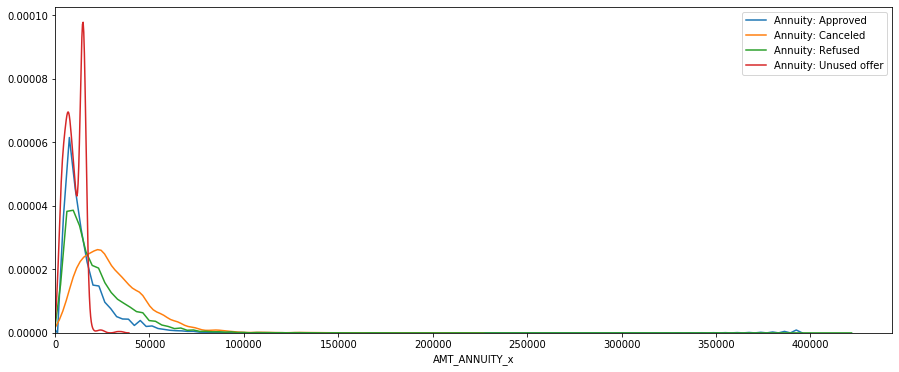

In [372]:
plt.figure(figsize=(15,6))
sns.distplot(df_m_a['AMT_ANNUITY_x'], hist=False, label= 'Annuity: Approved ')
sns.distplot(df_m_c['AMT_ANNUITY_x'], hist=False, label= 'Annuity: Canceled')
sns.distplot(df_m_r['AMT_ANNUITY_x'], hist=False, label= 'Annuity: Refused')
sns.distplot(df_m_u['AMT_ANNUITY_x'], hist=False, label= 'Annuity: Unused offer')
plt.xlim(0, None)
plt.show()

#### <font color = blue> Observation- AMT_ANNUITY:
* High probability of unused Offer for small amount loan (Less then 250000)


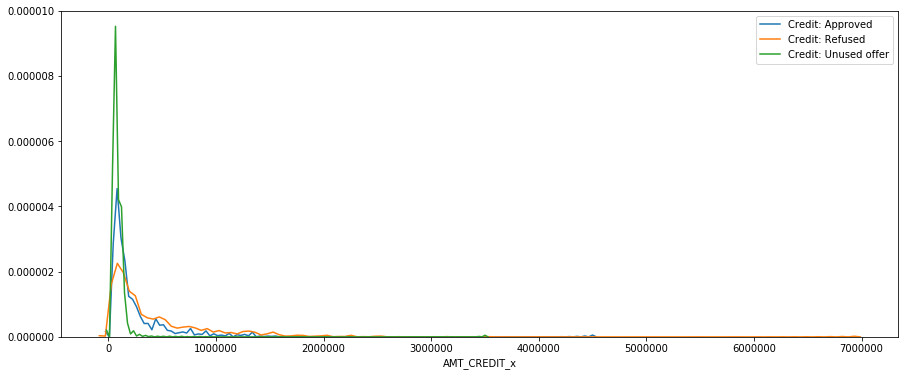

In [377]:
plt.figure(figsize=(15,6))
sns.distplot(df_m_a['AMT_CREDIT_x'], hist=False, label= 'Credit: Approved ')
# sns.distplot(df_m_c['AMT_CREDIT_x'], hist=False, label= 'Credit: Canceled')
sns.distplot(df_m_r['AMT_CREDIT_x'], hist=False, label= 'Credit: Refused')
sns.distplot(df_m_u['AMT_CREDIT_x'], hist=False, label= 'Credit: Unused offer')
plt.show()

#### <font color = blue> Observation- AMT_ANNUITY:
* High probability of unused Offer for small amount loan (Less then 500000)

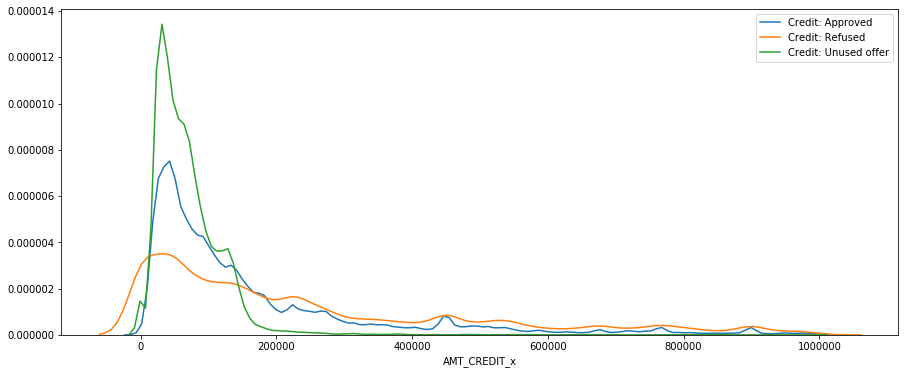

In [379]:
plt.figure(figsize=(15,6))
df_m_a1= df_m_a[df_m_a['AMT_CREDIT_x']<1000000]
df_m_r1= df_m_r[df_m_r['AMT_CREDIT_x']<1000000]
df_m_u1= df_m_u[df_m_u['AMT_CREDIT_x']<1000000]

sns.distplot(df_m_a1['AMT_CREDIT_x'], hist=False, label= 'Credit: Approved')
# sns.distplot(df_m_c['AMT_CREDIT_x'], hist=False, label= 'Credit: Canceled')
sns.distplot(df_m_r1['AMT_CREDIT_x'], hist=False, label= 'Credit: Refused')
sns.distplot(df_m_u1['AMT_CREDIT_x'], hist=False, label= 'Credit: Unused offer')
plt.show()

#### <font color = blue> Observation- NAME_PAYMENT_TYPE:
* Cash Through Bank is a preffered option for client.
* There are payment history for Canceled and Refused loan. This need further investigation.

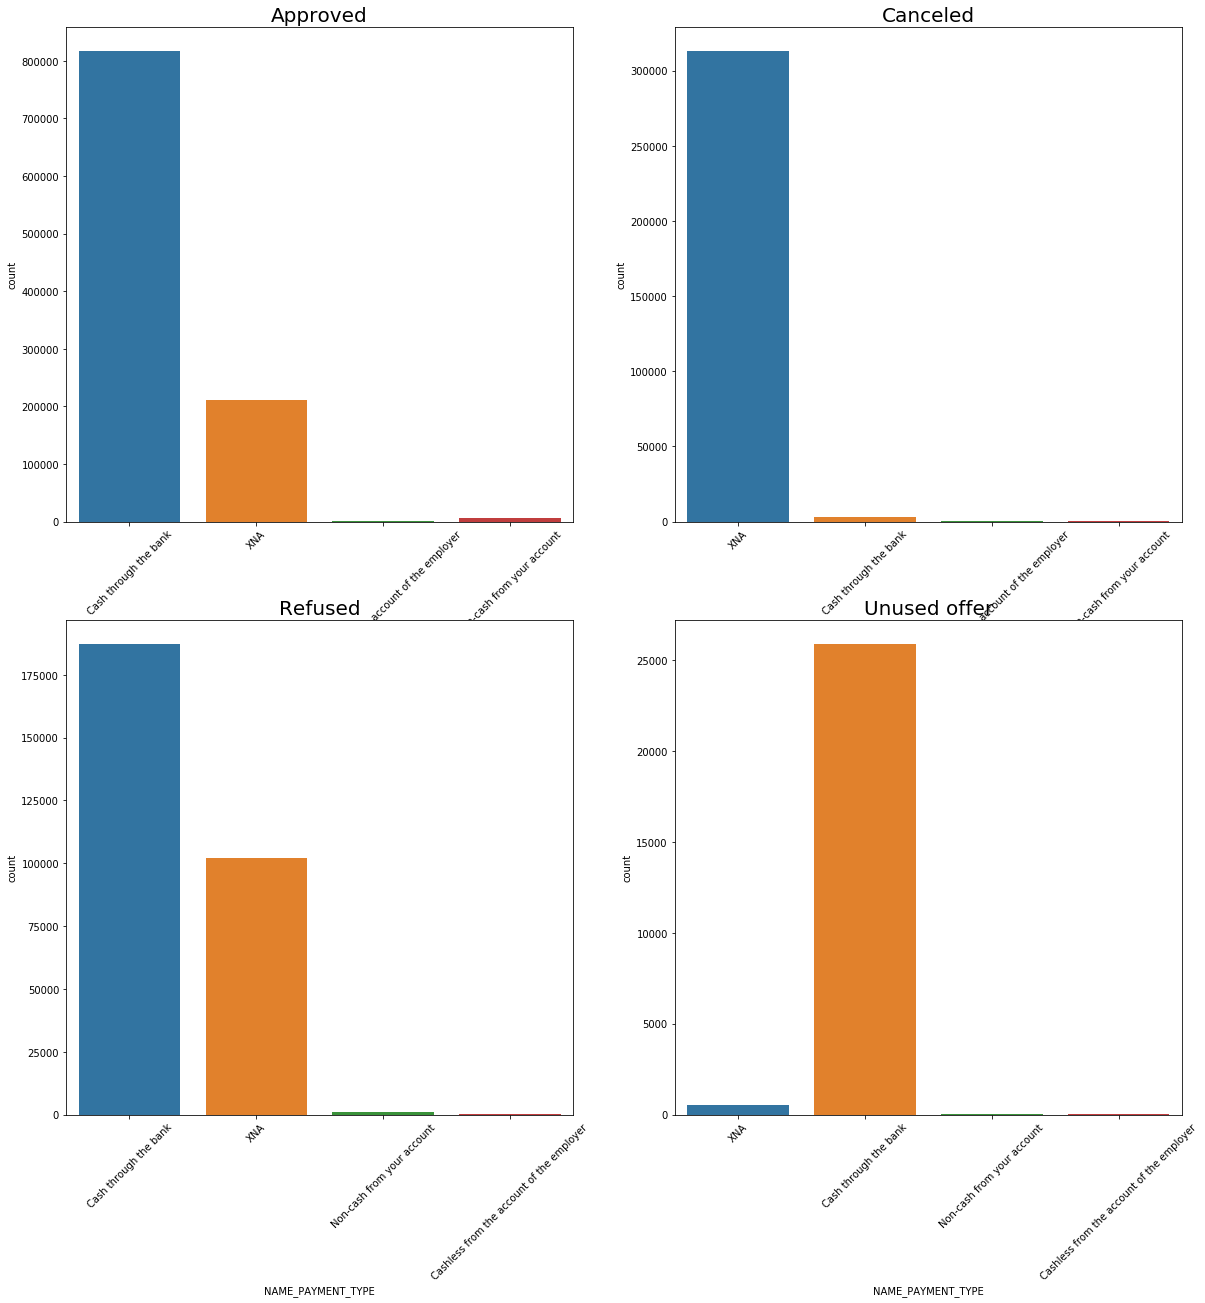

In [380]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.countplot(df_m_a['NAME_PAYMENT_TYPE'])
plt.title("Approved", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.countplot(df_m_c['NAME_PAYMENT_TYPE'])
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.countplot(df_m_r['NAME_PAYMENT_TYPE'])
plt.title("Refused", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.countplot(df_m_u['NAME_PAYMENT_TYPE'])
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=45)


plt.show()

#### <font color = blue> Observation- CODE_REJECT_REASON
* Unused offer: All of these loan are reject by clients. bank should further investigate and follow-ups.
    

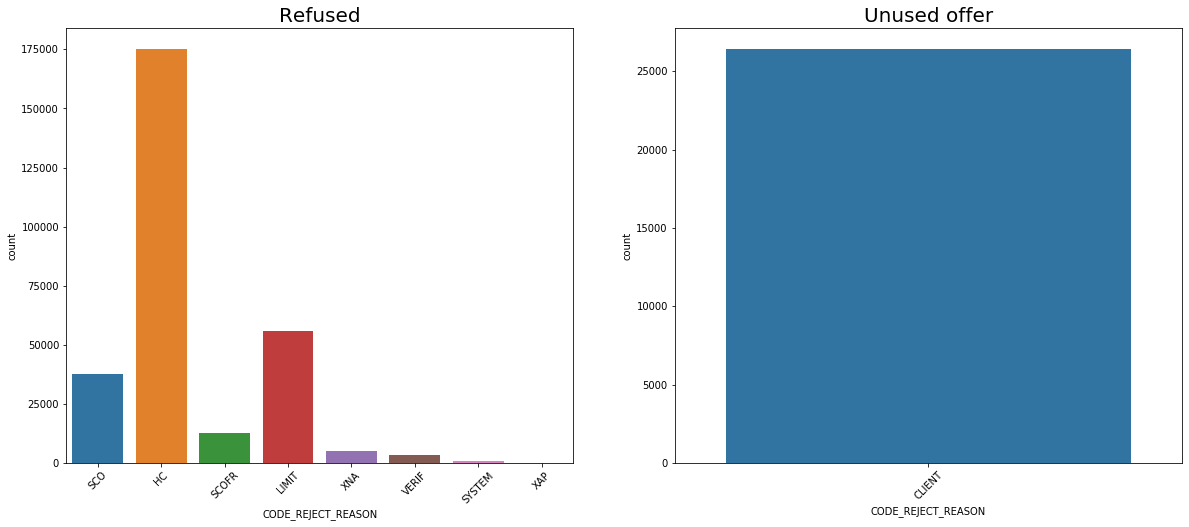

In [381]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(df_m_r['CODE_REJECT_REASON'])
plt.title("Refused", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(df_m_u['CODE_REJECT_REASON'])
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=45)


plt.show()

#### <font color = blue> Observation- NAME_GOODS_CATEGORY
* majority of Unused offer are for Mobile (Goods)

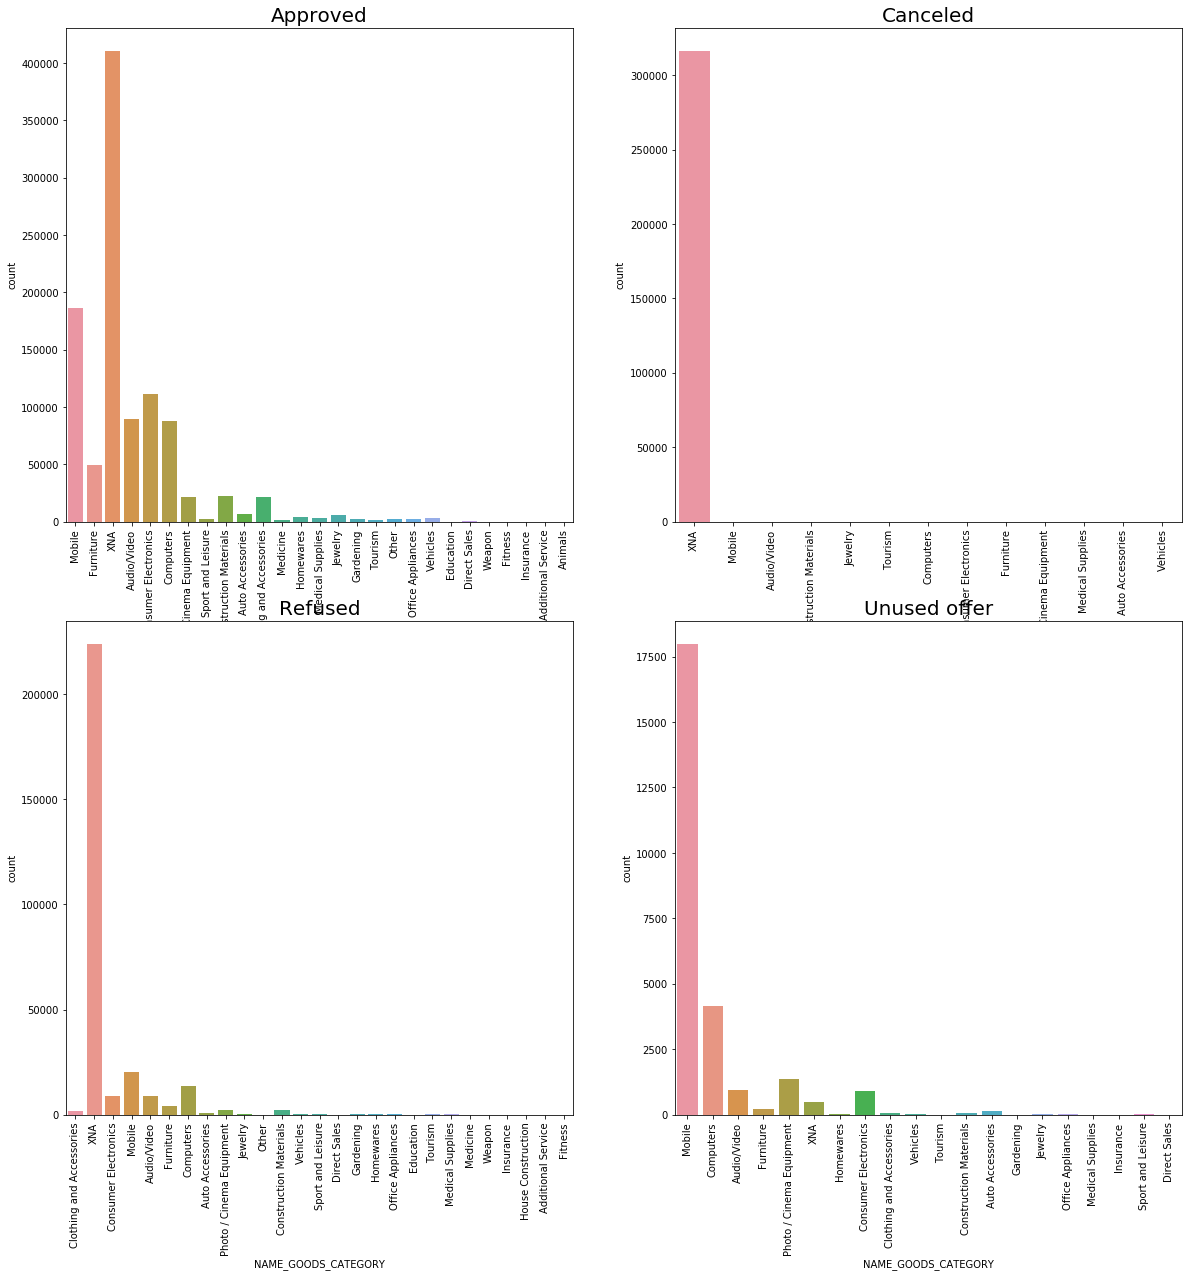

In [383]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.countplot(df_m_a['NAME_GOODS_CATEGORY'])
plt.title("Approved", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.countplot(df_m_c['NAME_GOODS_CATEGORY'])
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.countplot(df_m_r['NAME_GOODS_CATEGORY'])
plt.title("Refused", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.countplot(df_m_u['NAME_GOODS_CATEGORY'])
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=90)


plt.show()

#### <font color = blue> Observation- CHANNEL_TYPE
* Country Wide Channel is most popular.
* In Canceled & Refused status, Credit & Cash Office is highest in number and percentage.

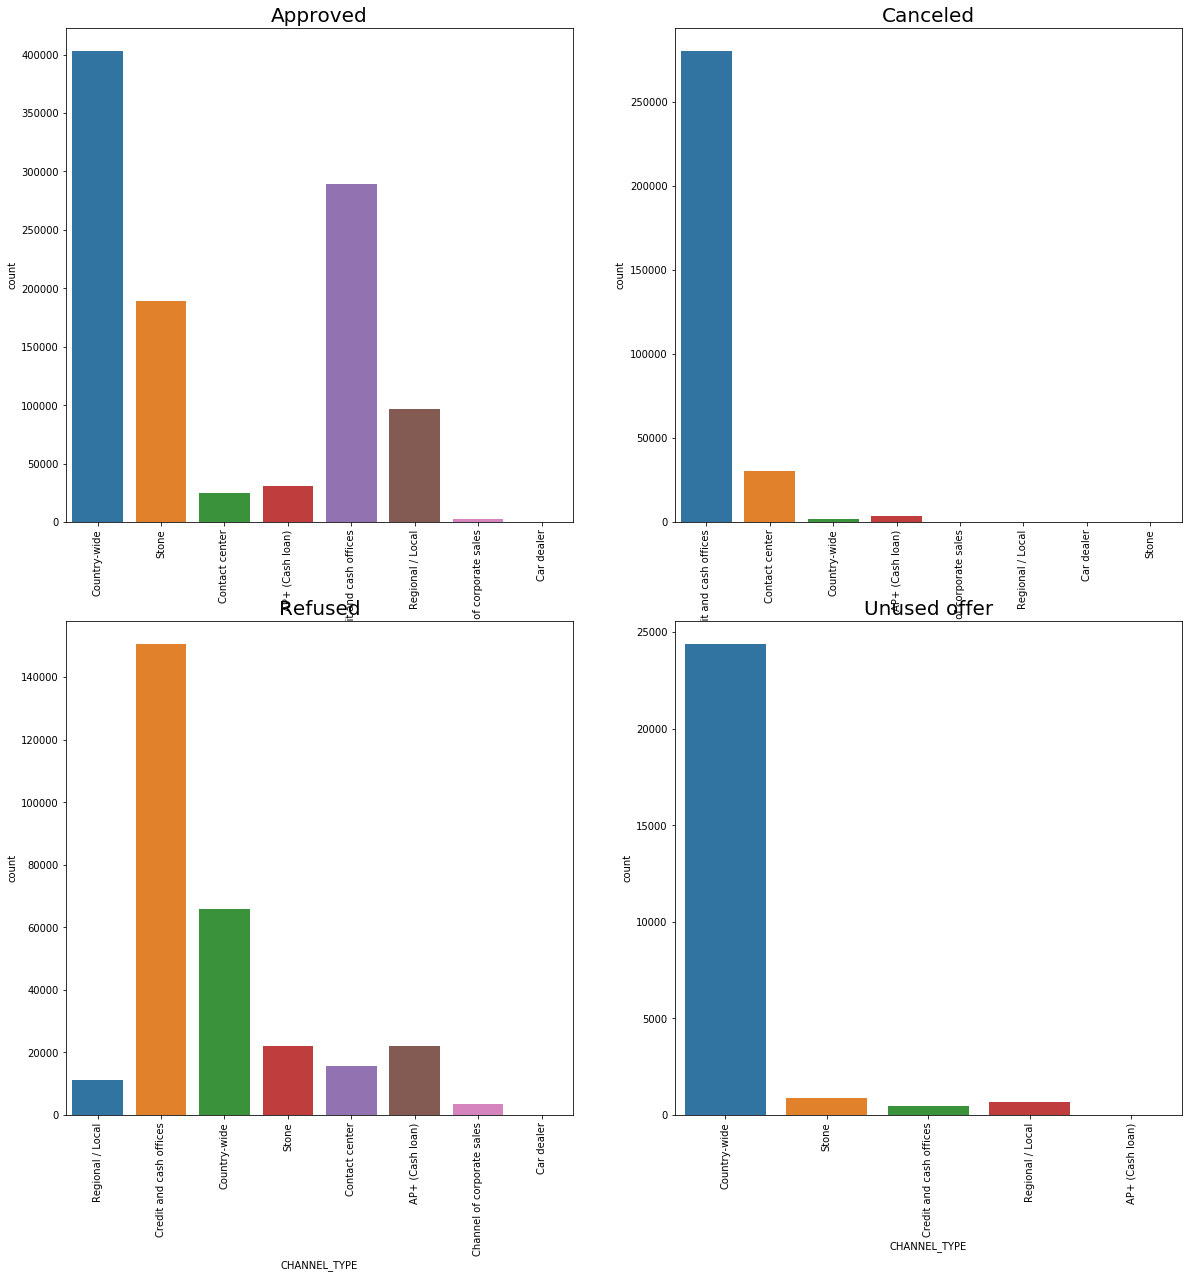

In [385]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.countplot(df_m_a['CHANNEL_TYPE'])
plt.title("Approved", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.countplot(df_m_c['CHANNEL_TYPE'])
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.countplot(df_m_r['CHANNEL_TYPE'])
plt.title("Refused", fontsize=20)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.countplot(df_m_u['CHANNEL_TYPE'])
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=90)


plt.show()

#### <font color = blue> Observation- NAME_YIELD_GROUP:
* In approved status, Medium and High yield hold the maximum count.
* In refused status, Low & Medium yield hold the maximum count.

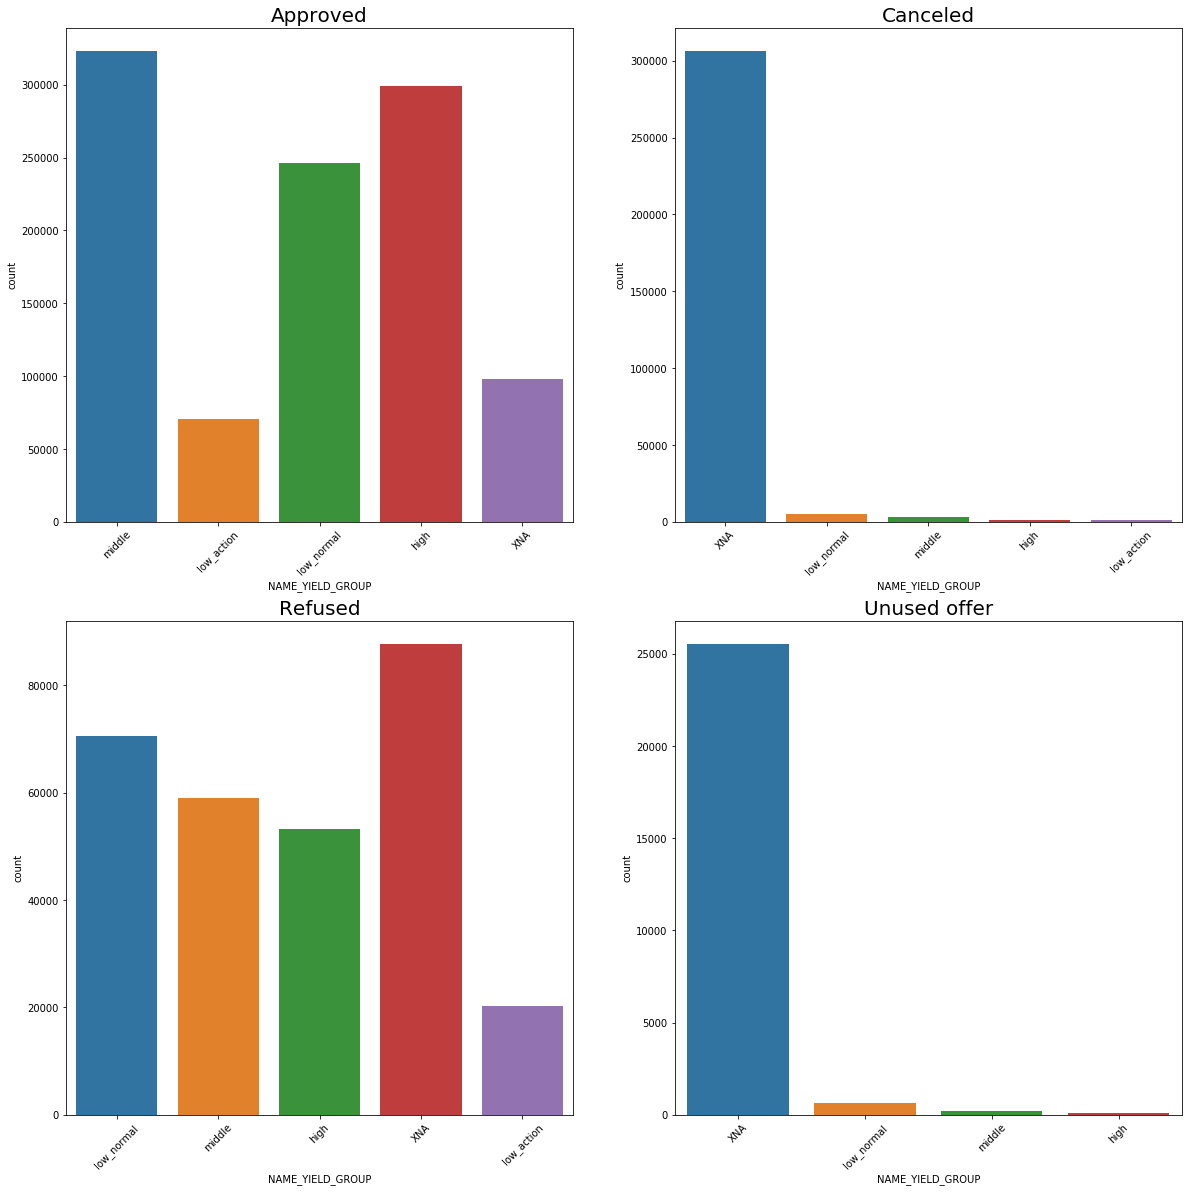

In [386]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.countplot(df_m_a['NAME_YIELD_GROUP'])
plt.title("Approved", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.countplot(df_m_c['NAME_YIELD_GROUP'])
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.countplot(df_m_r['NAME_YIELD_GROUP'])
plt.title("Refused", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.countplot(df_m_u['NAME_YIELD_GROUP'])
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=45)


plt.show()

#### <font color = blue> Observation- NFLAG_INSURED_ON_APPROVAL:
* Majority of clients didn't requested for Insurance during previous approved applications.

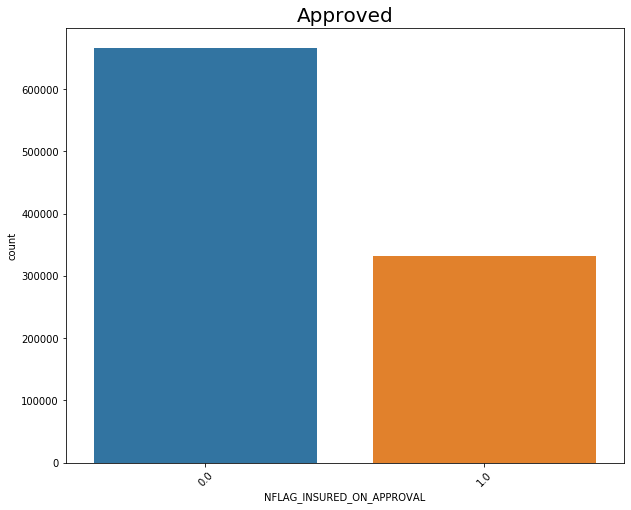

In [163]:
plt.figure(figsize=(10,8))
sns.countplot(df_m_a['NFLAG_INSURED_ON_APPROVAL'])
plt.title("Approved", fontsize=20)
plt.xticks(rotation=45)


plt.show()

#### <font color = blue> Observation- NAME_CLIENT_TYPE:
* Repeater client type is maximum in count for all status.
* Refreshed client type is 2nd maximum in Unused and Canceled status.

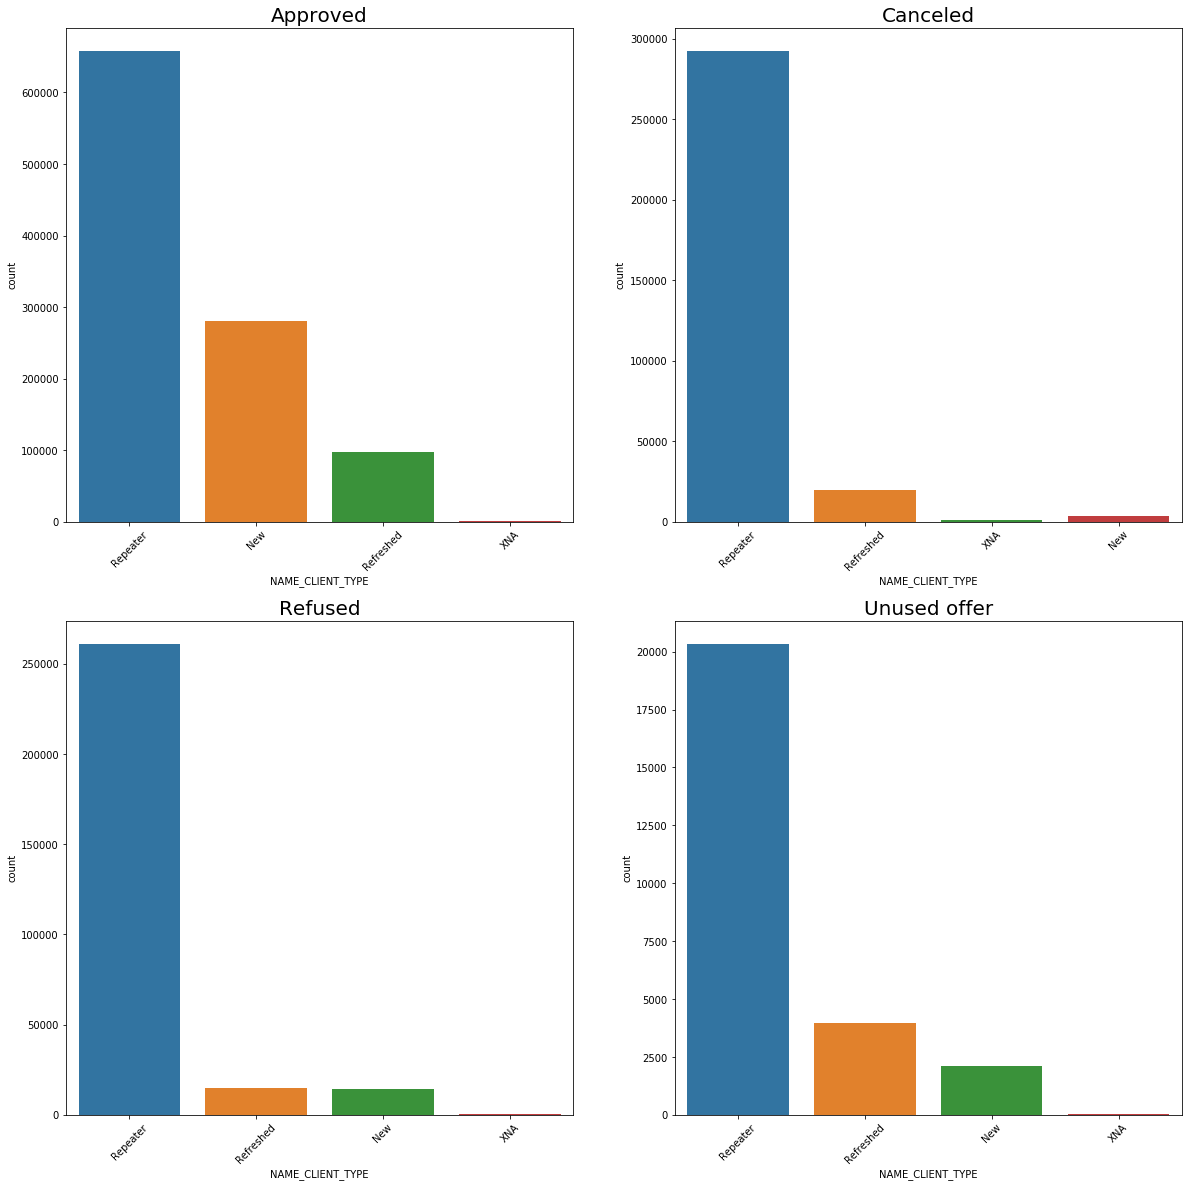

In [387]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.countplot(df_m_a['NAME_CLIENT_TYPE'])
plt.title("Approved", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.countplot(df_m_c['NAME_CLIENT_TYPE'])
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.countplot(df_m_r['NAME_CLIENT_TYPE'])
plt.title("Refused", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.countplot(df_m_u['NAME_CLIENT_TYPE'])
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=45)


plt.show()

## Continous - Continous

#### <font color = blue> Observation- AMT_APPLICATION vs AMT_ANNUITY_x:
* There is a linear patern and data has high correlation between Application and Annuity.
* There seems to be some outlier in Approved status with High Application amount vs low Annuity and viceversa.
    

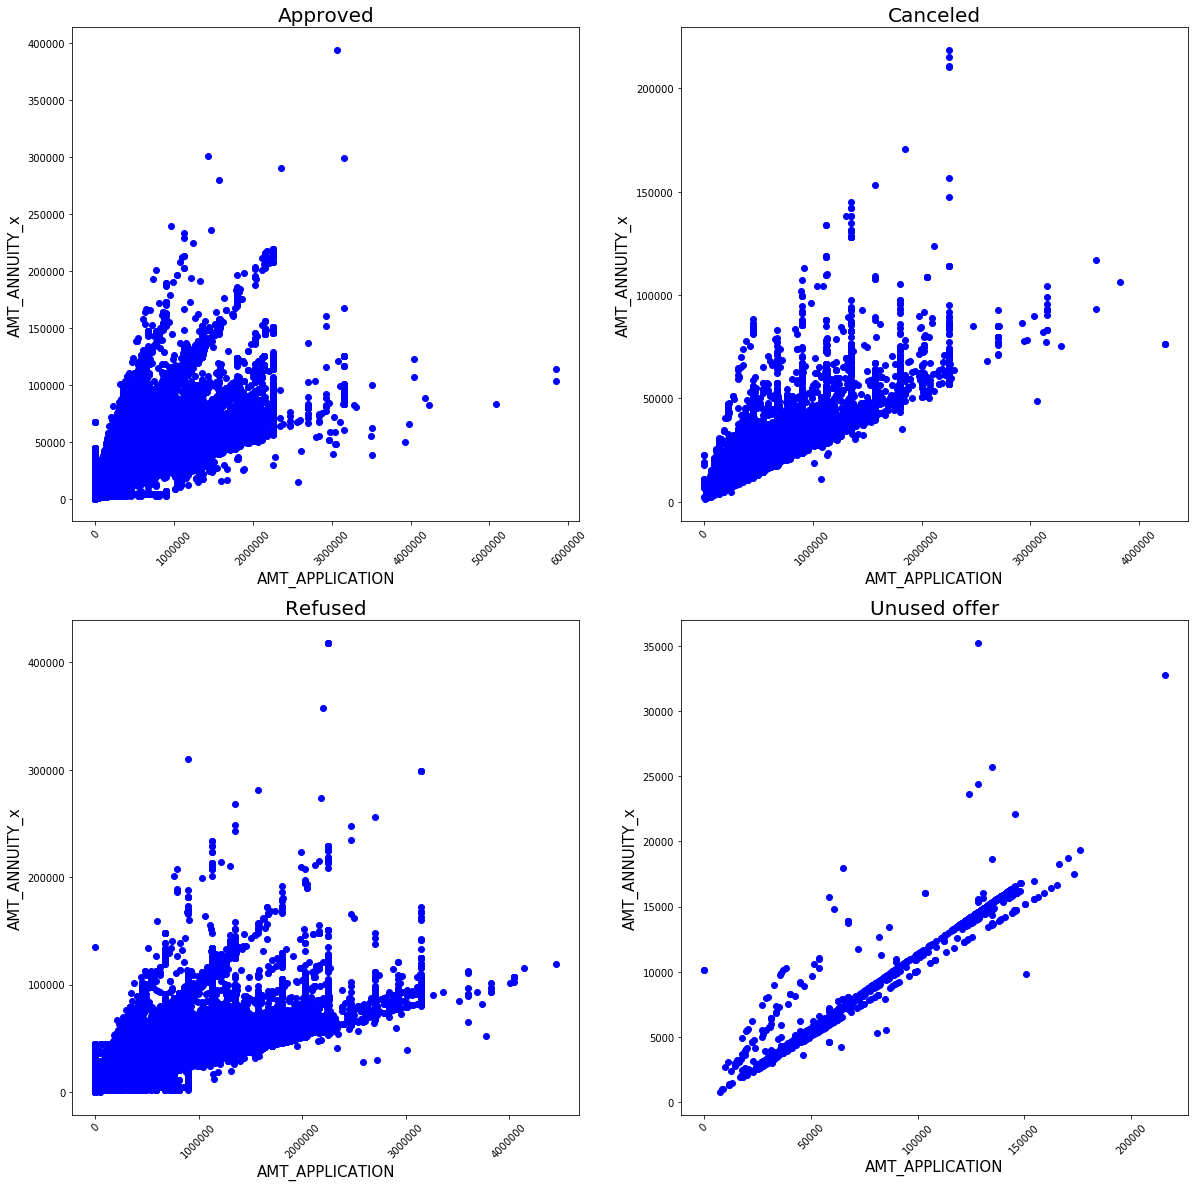

In [389]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.scatter(df_m_a['AMT_APPLICATION'], df_m_a['AMT_ANNUITY_x'], color='blue')
plt.title("Approved", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("AMT_APPLICATION", fontsize=15)
plt.ylabel("AMT_ANNUITY_x", fontsize=15)

plt.subplot(2,2,2)
plt.scatter(df_m_c['AMT_APPLICATION'], df_m_c['AMT_ANNUITY_x'], color='blue')
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("AMT_APPLICATION", fontsize=15)
plt.ylabel("AMT_ANNUITY_x", fontsize=15)


plt.subplot(2,2,3)
plt.scatter(df_m_r['AMT_APPLICATION'], df_m_r['AMT_ANNUITY_x'], color='blue')
plt.title("Refused", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("AMT_APPLICATION", fontsize=15)
plt.ylabel("AMT_ANNUITY_x", fontsize=15)

plt.subplot(2,2,4)
plt.scatter(df_m_u['AMT_APPLICATION'], df_m_u['AMT_ANNUITY_x'], color='blue')
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("AMT_APPLICATION", fontsize=15)
plt.ylabel("AMT_ANNUITY_x", fontsize=15)
plt.show()



#### <font color = blue> Observation- AMT_CREDIT vs AMT_ANNUITY:
* There is a linear patern and data has high correlation between Loan credit and Annuity.
* There seems to be some outlier in Approved status with High loan credit amount vs low Annuity and viceversa.

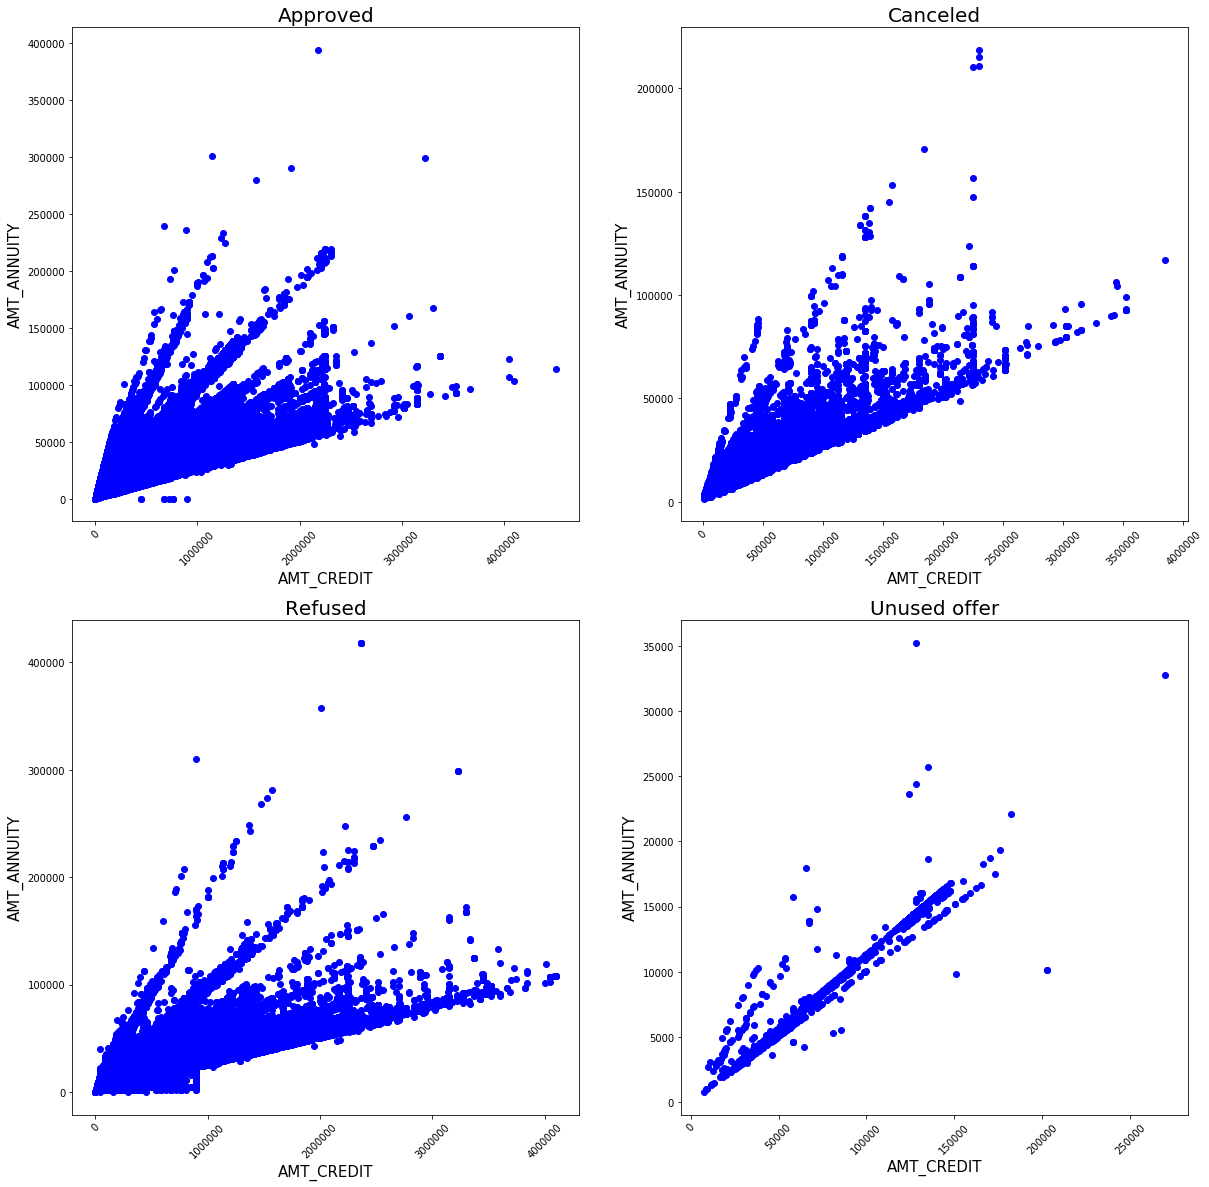

In [390]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.scatter(df_m_a['AMT_CREDIT_x'], df_m_a['AMT_ANNUITY_x'], color='blue')
plt.title("Approved", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("AMT_CREDIT", fontsize=15)
plt.ylabel("AMT_ANNUITY", fontsize=15)

plt.subplot(2,2,2)
plt.scatter(df_m_c['AMT_CREDIT_x'], df_m_c['AMT_ANNUITY_x'], color='blue')
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("AMT_CREDIT", fontsize=15)
plt.ylabel("AMT_ANNUITY", fontsize=15)


plt.subplot(2,2,3)
plt.scatter(df_m_r['AMT_CREDIT_x'], df_m_r['AMT_ANNUITY_x'], color='blue')
plt.title("Refused", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("AMT_CREDIT", fontsize=15)
plt.ylabel("AMT_ANNUITY", fontsize=15)

plt.subplot(2,2,4)
plt.scatter(df_m_u['AMT_CREDIT_x'], df_m_u['AMT_ANNUITY_x'], color='blue')
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("AMT_CREDIT", fontsize=15)
plt.ylabel("AMT_ANNUITY", fontsize=15)
plt.show()


## Continous - Catagorical 

#### <font color = blue> Observation- NAME_CONTRACT_TYPE vs AMT_CREDIT & NAME_CONTRACT_TYPE vs AMT_APPLICATION
* In approved status, cash loans has maximum mean, IQR.
* There are multiple outlier in approved status and couple of very high loan credit outlier in Consumer loan.
* Cash loan are maximum count of loan refused.
    

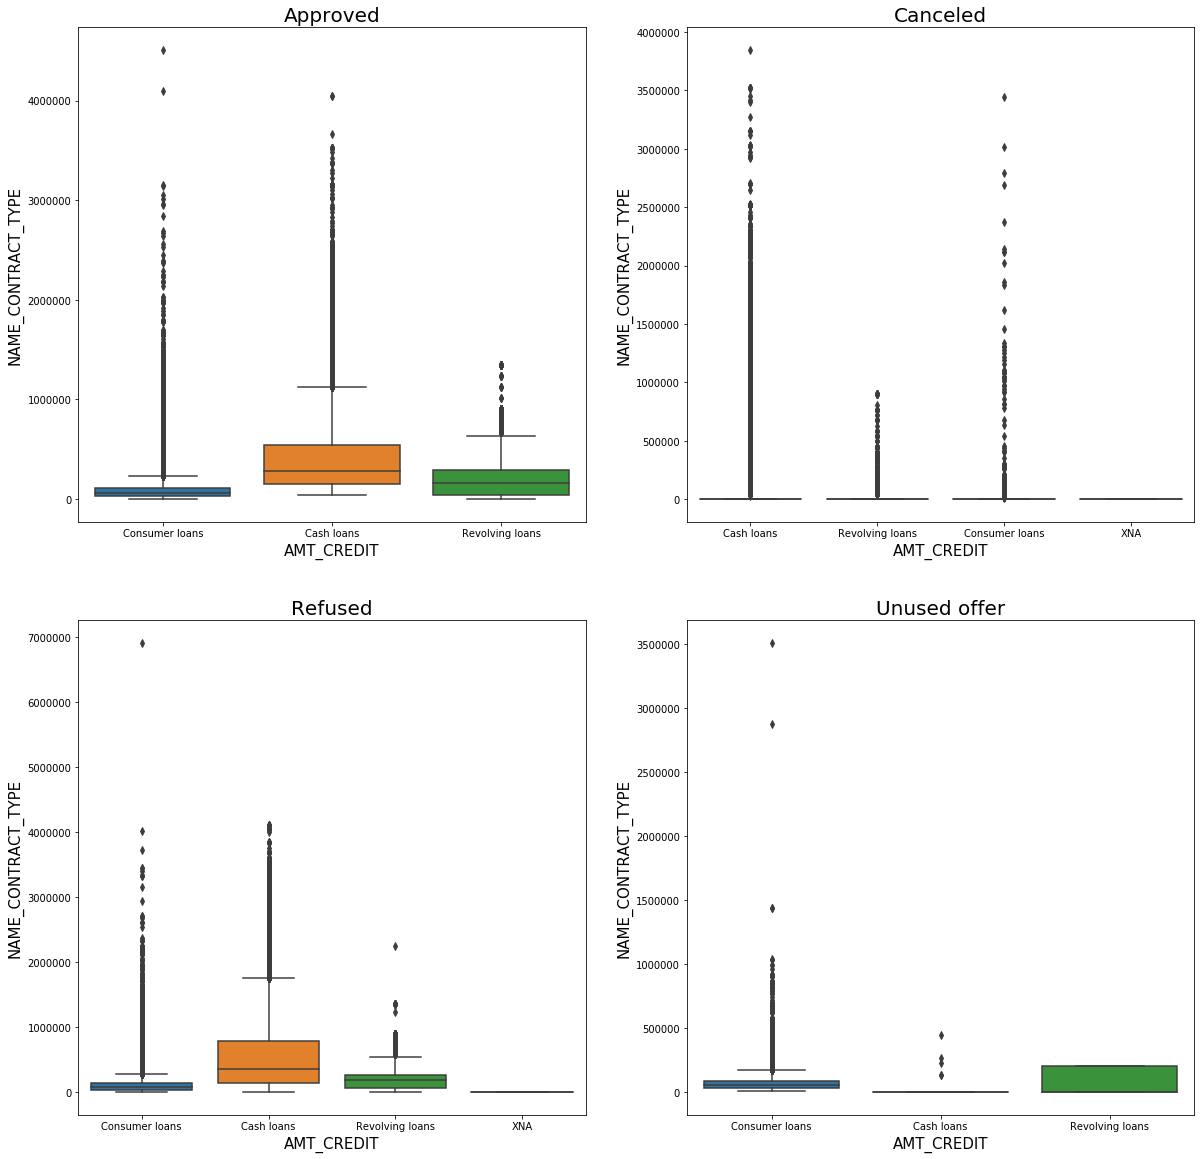

In [395]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(df_m_a['NAME_CONTRACT_TYPE_x'], df_m_a['AMT_CREDIT_x'])
plt.title("Approved", fontsize=20)
plt.xlabel("AMT_CREDIT", fontsize=15)
plt.ylabel("NAME_CONTRACT_TYPE", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(df_m_c['NAME_CONTRACT_TYPE_x'], df_m_c['AMT_CREDIT_x'])
plt.title("Canceled", fontsize=20)
plt.xlabel("AMT_CREDIT", fontsize=15)
plt.ylabel("NAME_CONTRACT_TYPE", fontsize=15)


plt.subplot(2,2,3)
sns.boxplot(df_m_r['NAME_CONTRACT_TYPE_x'], df_m_r['AMT_CREDIT_x'])
plt.title("Refused", fontsize=20)
plt.xlabel("AMT_CREDIT", fontsize=15)
plt.ylabel("NAME_CONTRACT_TYPE", fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(df_m_u['NAME_CONTRACT_TYPE_x'], df_m_u['AMT_CREDIT_x'])
plt.title("Unused offer", fontsize=20)
plt.xlabel("AMT_CREDIT", fontsize=15)
plt.ylabel("NAME_CONTRACT_TYPE", fontsize=15)

plt.show()

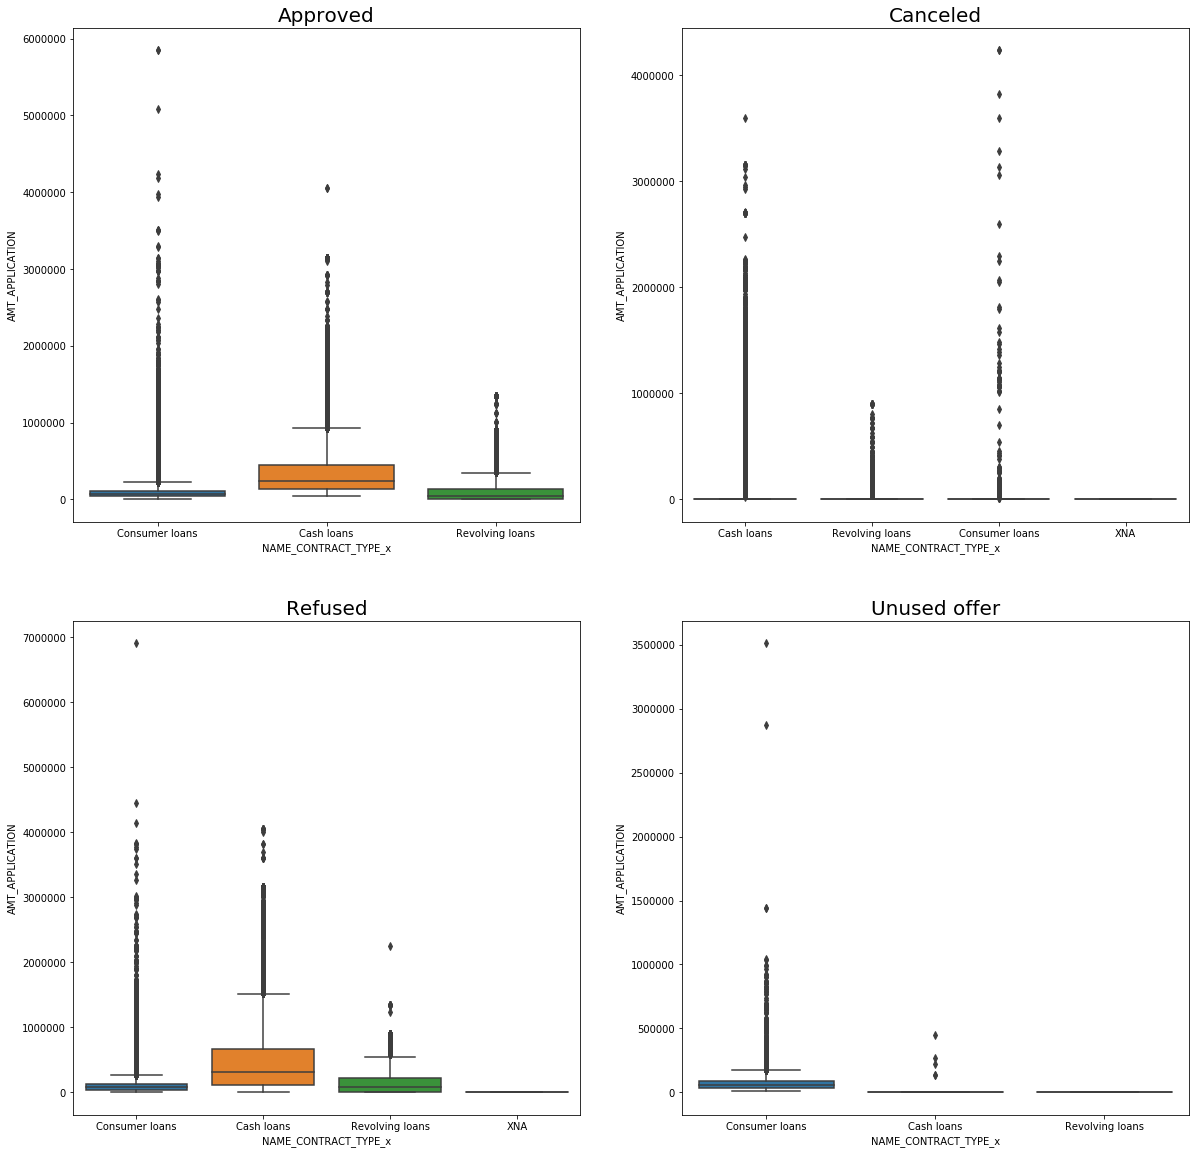

In [177]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(df_m_a['NAME_CONTRACT_TYPE_x'], df_m_a['AMT_APPLICATION'])
plt.title("Approved", fontsize=20)
# plt.xticks(rotation=45)
# plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
# plt.ylabel("AMT_INCOME_TOTAL: Income of the client", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(df_m_c['NAME_CONTRACT_TYPE_x'], df_m_c['AMT_APPLICATION'])
plt.title("Canceled", fontsize=20)
# plt.xticks(rotation=45)
# plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
# plt.ylabel("AMT_INCOME_TOTAL: Income of the client", fontsize=15)


plt.subplot(2,2,3)
sns.boxplot(df_m_r['NAME_CONTRACT_TYPE_x'], df_m_r['AMT_APPLICATION'])
plt.title("Refused", fontsize=20)
# plt.xticks(rotation=45)
# plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
# plt.ylabel("AMT_INCOME_TOTAL: Income of the client", fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(df_m_u['NAME_CONTRACT_TYPE_x'], df_m_u['AMT_APPLICATION'])
plt.title("Unused offer", fontsize=20)
# plt.xticks(rotation=45)
# plt.xlabel("AMT_CREDIT: Credit amount of the loan", fontsize=15)
# plt.ylabel("AMT_INCOME_TOTAL: Income of the client", fontsize=15)
plt.show()

#### <font color = blue> Observation- NAME_YIELD_GROUP vs AMT_CREDIT
* Low Action & Low Normal yield has maximum mean and IQR under Canceled & Refused status.
    

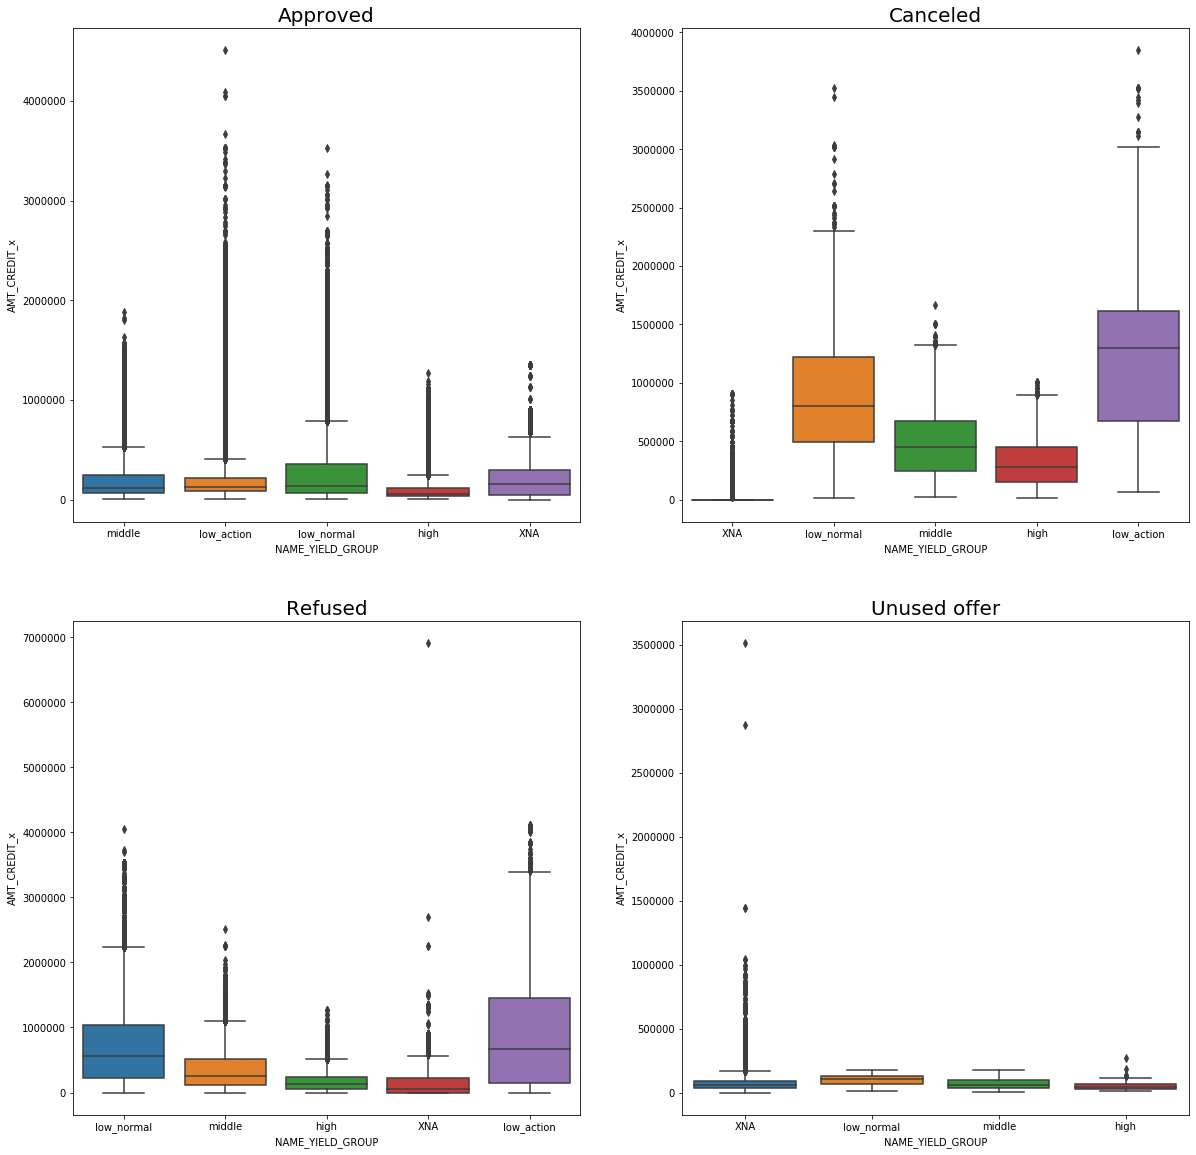

In [396]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(df_m_a['NAME_YIELD_GROUP'], df_m_a['AMT_CREDIT_x'])
plt.title("Approved", fontsize=20)


plt.subplot(2,2,2)
sns.boxplot(df_m_c['NAME_YIELD_GROUP'], df_m_c['AMT_CREDIT_x'])
plt.title("Canceled", fontsize=20)



plt.subplot(2,2,3)
sns.boxplot(df_m_r['NAME_YIELD_GROUP'], df_m_r['AMT_CREDIT_x'])
plt.title("Refused", fontsize=20)


plt.subplot(2,2,4)
sns.boxplot(df_m_u['NAME_YIELD_GROUP'], df_m_u['AMT_CREDIT_x'])
plt.title("Unused offer", fontsize=20)

plt.show()

#### <font color = blue> Observation- CHANNEL_TYPE vs AMT_CREDIT
* Car dealer Channel type has maximum mean, IQR & outlier accross all Approved, Canceled and refused status.


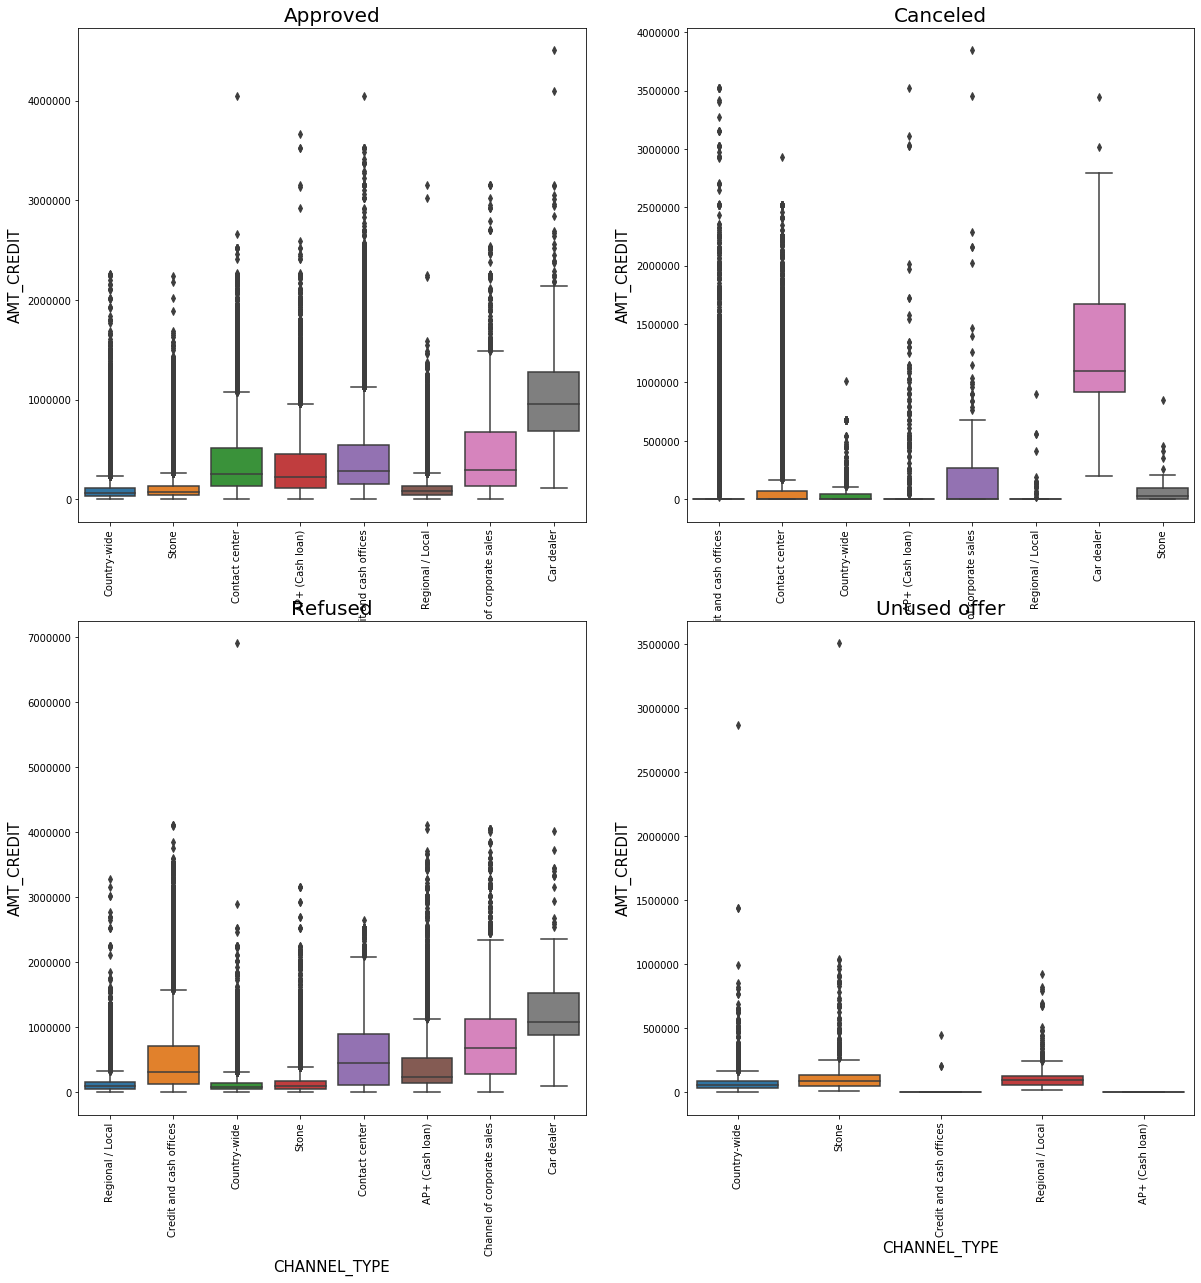

In [398]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(df_m_a['CHANNEL_TYPE'], df_m_a['AMT_CREDIT_x'])
plt.title("Approved", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("CHANNEL_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(df_m_c['CHANNEL_TYPE'], df_m_c['AMT_CREDIT_x'])
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("CHANNEL_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)


plt.subplot(2,2,3)
sns.boxplot(df_m_r['CHANNEL_TYPE'], df_m_r['AMT_CREDIT_x'])
plt.title("Refused", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("CHANNEL_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(df_m_u['CHANNEL_TYPE'], df_m_u['AMT_CREDIT_x'])
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("CHANNEL_TYPE", fontsize=15)
plt.ylabel("AMT_CREDIT", fontsize=15)
plt.show()

#### <font color = blue> Observation- NAME_PORTFOLIO vs AMT_CREDIT
* Car portfolio has maximum mean, IQR & outlier accross all Approved, Canceled, refused status status.
* Cash portfolio has 2nd maximum mean, IQR and outlier in Canceled & Refused status.


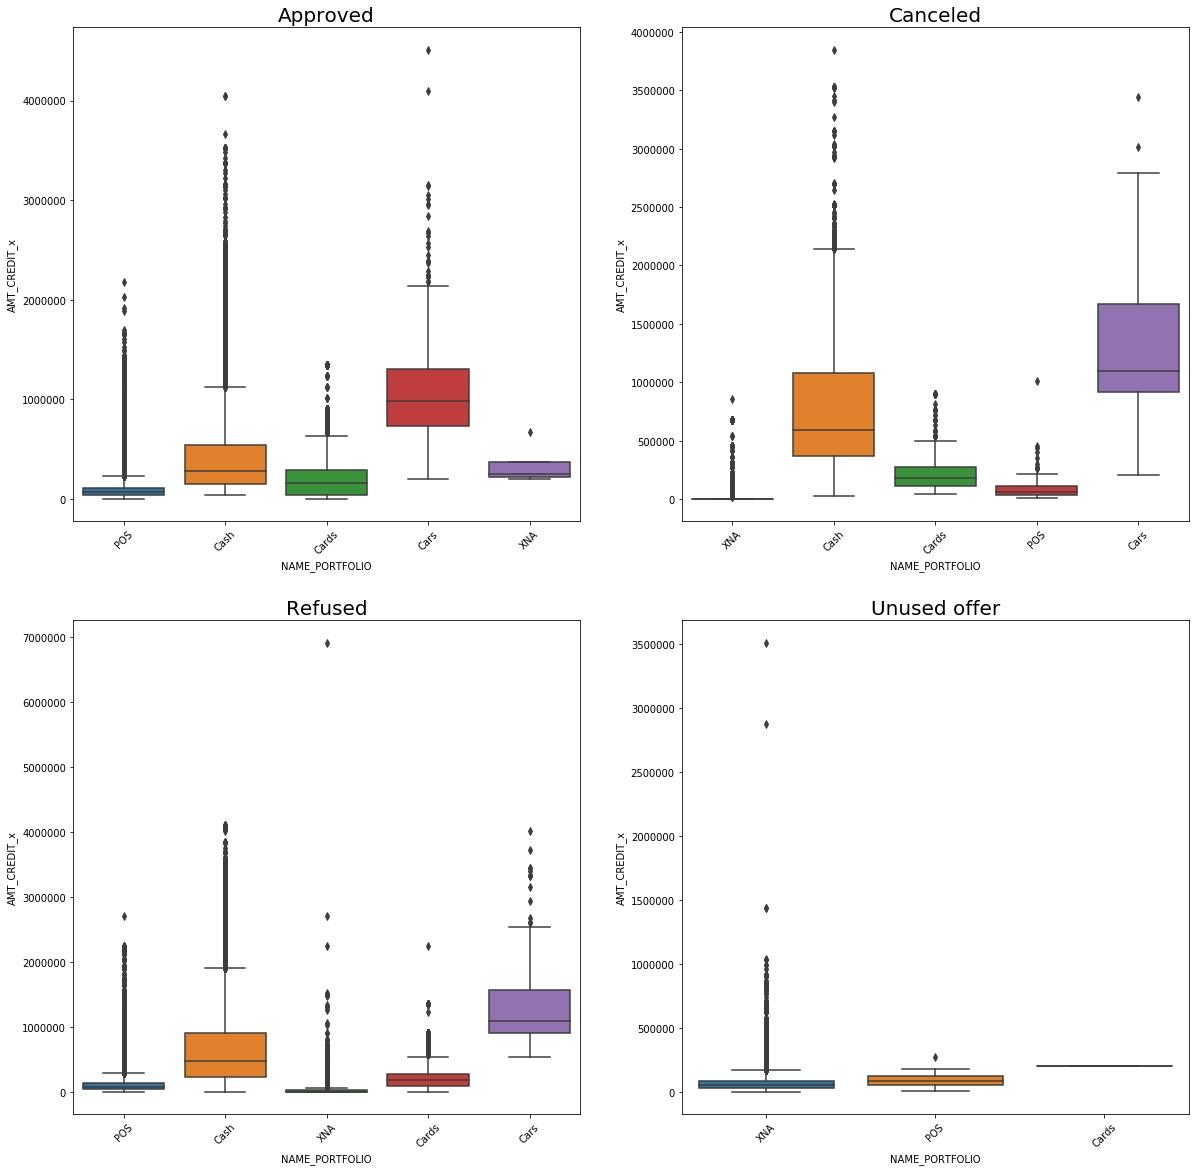

In [399]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(df_m_a['NAME_PORTFOLIO'], df_m_a['AMT_CREDIT_x'])
plt.title("Approved", fontsize=20)
plt.xticks(rotation=45)


plt.subplot(2,2,2)
sns.boxplot(df_m_c['NAME_PORTFOLIO'], df_m_c['AMT_CREDIT_x'])
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=45)


plt.subplot(2,2,3)
sns.boxplot(df_m_r['NAME_PORTFOLIO'], df_m_r['AMT_CREDIT_x'])
plt.title("Refused", fontsize=20)
plt.xticks(rotation=45)


plt.subplot(2,2,4)
sns.boxplot(df_m_u['NAME_PORTFOLIO'], df_m_u['AMT_CREDIT_x'])
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=45)

plt.show()

## Catagorical - Catagorical

#### <font color = blue> Observation- NAME_CONTRACT_TYPE vs TARGET-
* Majority of previous loan were canceled, refused and Unused offer by clients with Target 0 (No difficulty to payment). 
This is not positive for bank.
* Majority of Repeater client type with Target=0 has canceled or unused offer.

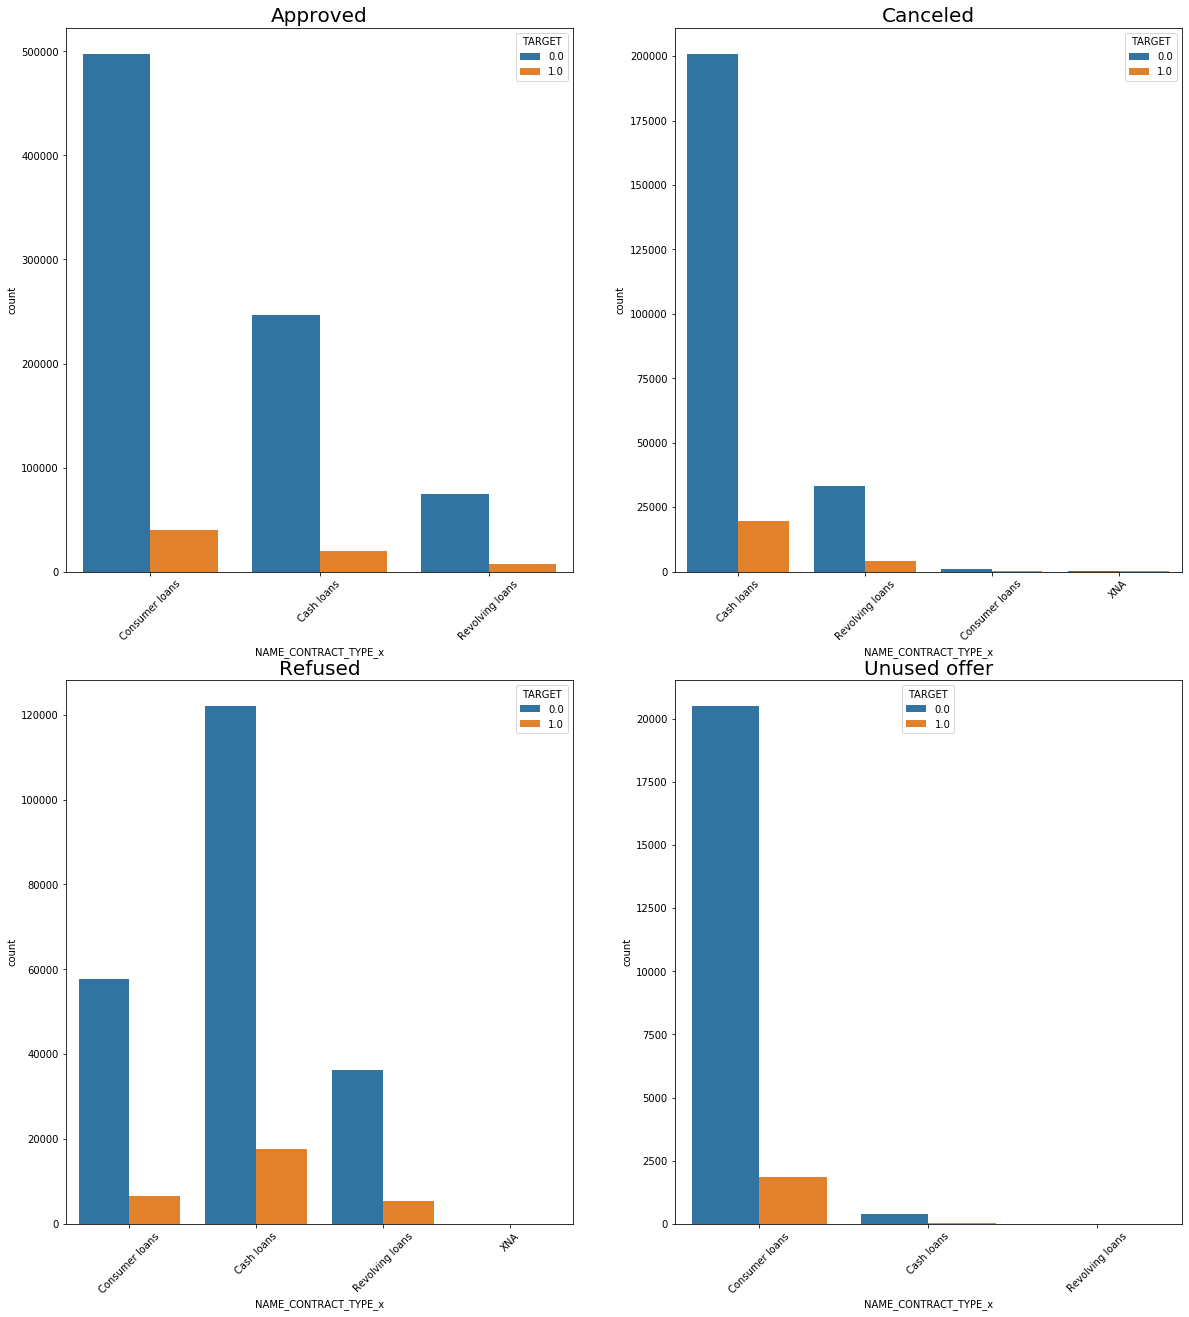

In [401]:
plt.figure(figsize=(20,22))
plt.subplot(2,2,1)
sns.countplot(x= 'NAME_CONTRACT_TYPE_x', hue = 'TARGET', data= df_m_a )
plt.title("Approved", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.countplot(x= 'NAME_CONTRACT_TYPE_x', hue = 'TARGET', data= df_m_c )
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=45)


plt.subplot(2,2,3)
sns.countplot(x= 'NAME_CONTRACT_TYPE_x', hue = 'TARGET', data= df_m_r )
plt.title("Refused", fontsize=20)
plt.xticks(rotation=45)


plt.subplot(2,2,4)
sns.countplot(x= 'NAME_CONTRACT_TYPE_x', hue = 'TARGET', data= df_m_u )
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=45)

plt.show()

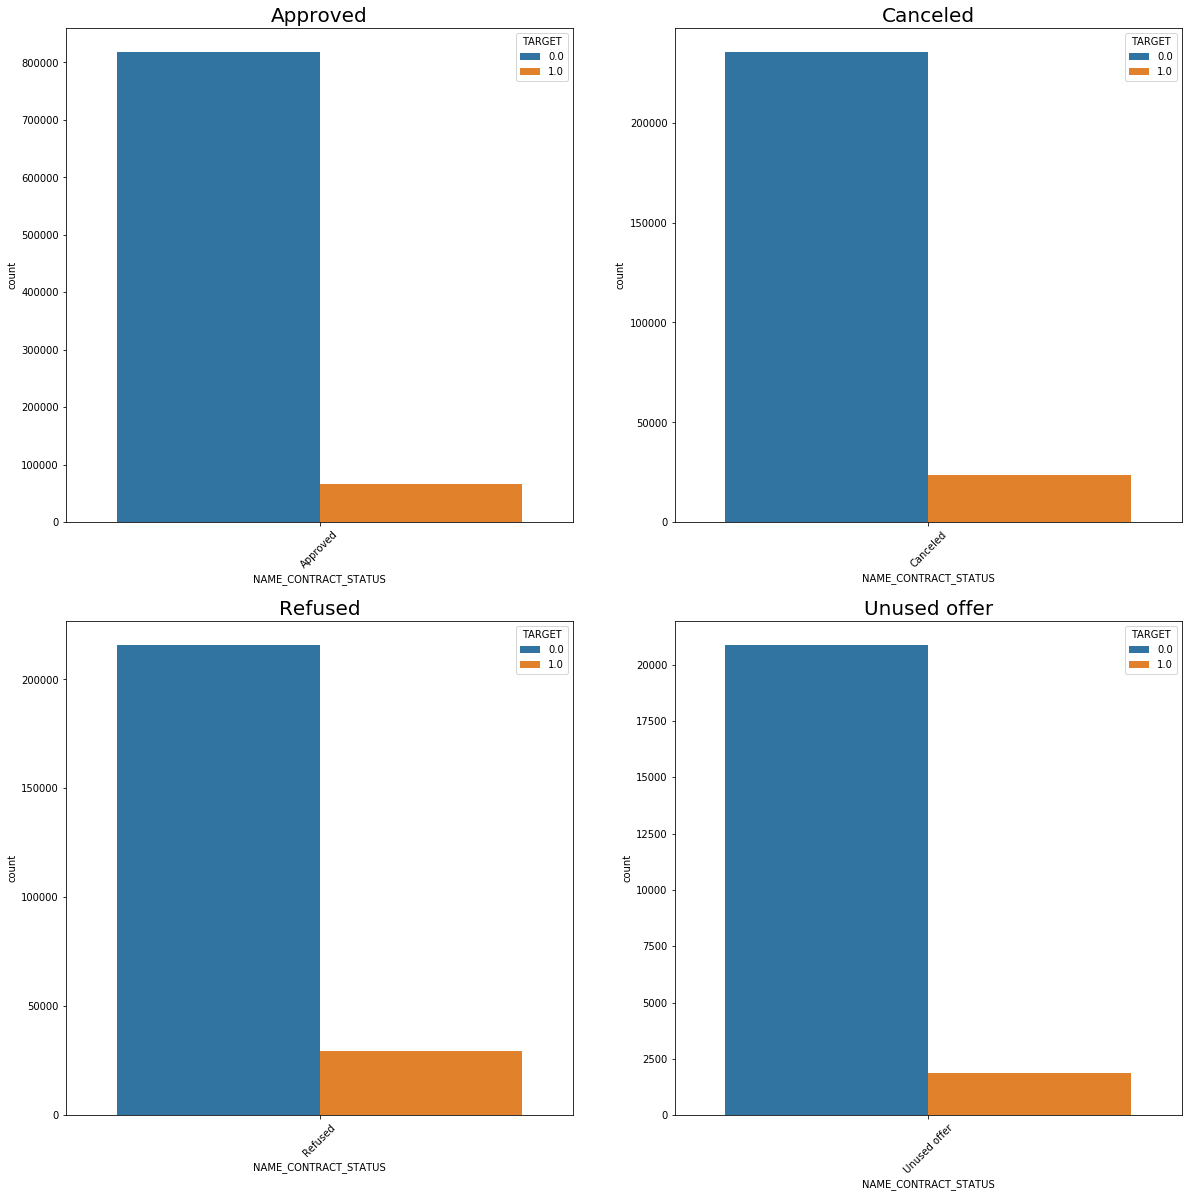

In [402]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.countplot(x= 'NAME_CONTRACT_STATUS', hue = 'TARGET', data= df_m_a )
plt.title("Approved", fontsize=20)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.countplot(x= 'NAME_CONTRACT_STATUS', hue = 'TARGET', data= df_m_c )
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=45)


plt.subplot(2,2,3)
sns.countplot(x= 'NAME_CONTRACT_STATUS', hue = 'TARGET', data= df_m_r )
plt.title("Refused", fontsize=20)
plt.xticks(rotation=45)


plt.subplot(2,2,4)
sns.countplot(x= 'NAME_CONTRACT_STATUS', hue = 'TARGET', data= df_m_u )
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=45)

plt.show()

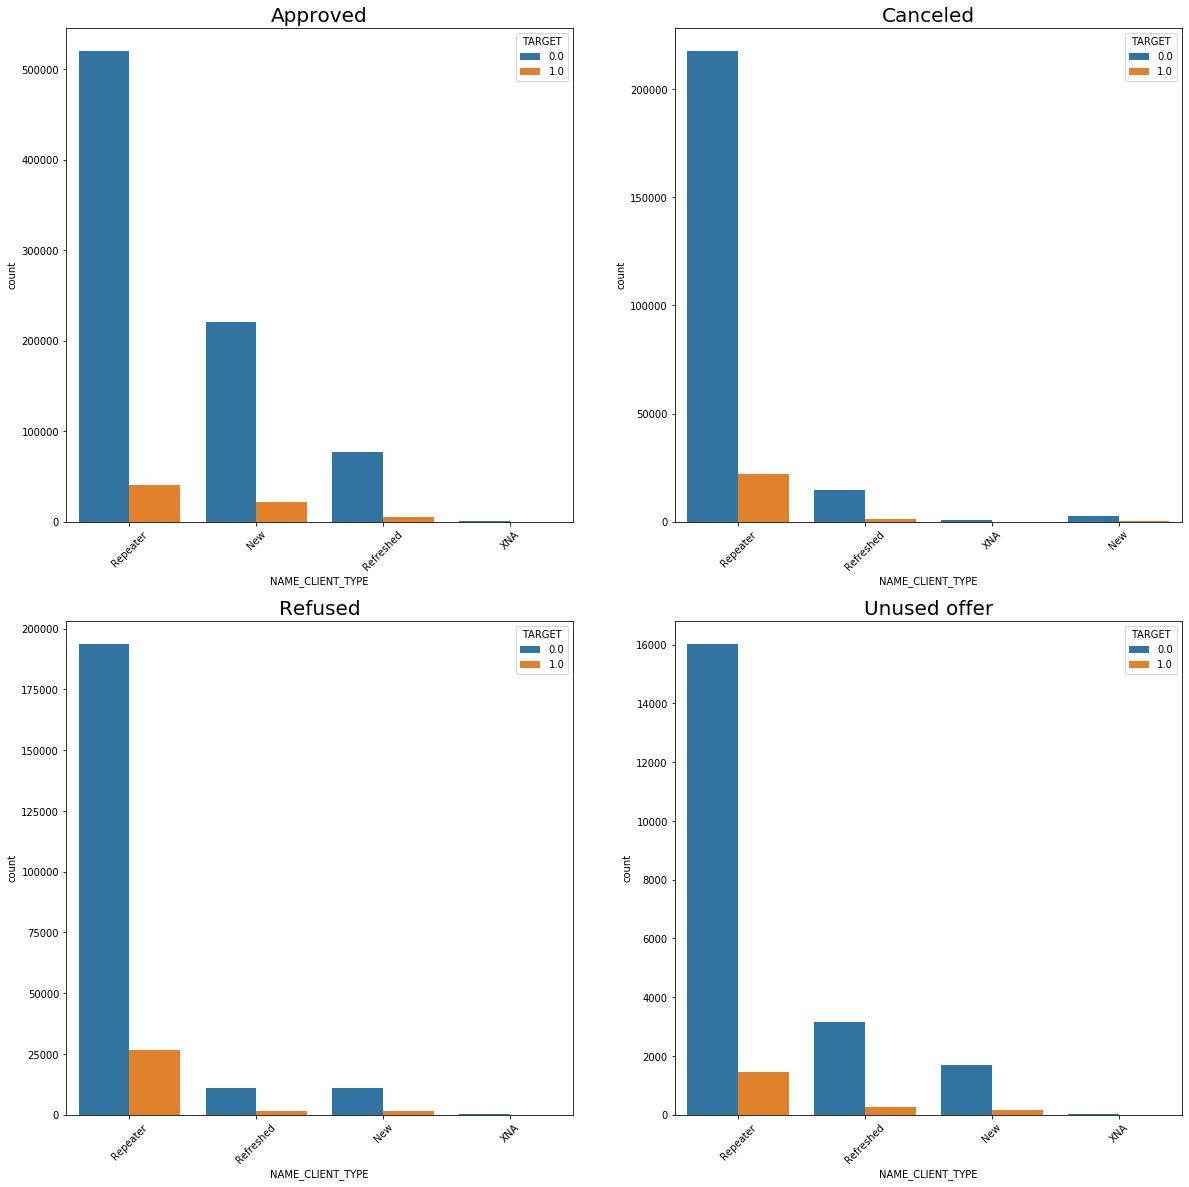

In [403]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.countplot(x= 'NAME_CLIENT_TYPE', hue = 'TARGET', data= df_m_a )
plt.title("Approved", fontsize=20)
plt.xticks(rotation=45)


plt.subplot(2,2,2)
sns.countplot(x= 'NAME_CLIENT_TYPE', hue = 'TARGET', data= df_m_c )
plt.title("Canceled", fontsize=20)
plt.xticks(rotation=45)


plt.subplot(2,2,3)
sns.countplot(x= 'NAME_CLIENT_TYPE', hue = 'TARGET', data= df_m_r )
plt.title("Refused", fontsize=20)
plt.xticks(rotation=45)


plt.subplot(2,2,4)
sns.countplot(x= 'NAME_CLIENT_TYPE', hue = 'TARGET', data= df_m_u )
plt.title("Unused offer", fontsize=20)
plt.xticks(rotation=45)

plt.show()